# Introduction

The task of this assignment is to apply the full data science project lifecycle to compare the performance of a decision tree and a random forest. 

The dataset is sourced from the NY State Education Department (NYSED): https://data.nysed.gov/downloads.php

The goal is to classify a response that is a categorical indicator variable derived from the dataset’s reg_pct attribute.

This new indicator variable will be comprised of three possible values:

- A: “low”: indicates that the percentage of regents diplomas awarded for a given school district /student subgrouping is less than ½ of the median percentage of all regent diplomas awarded (i.e.,across all school district / student subgroupings);

- B: “medium”: indicates that the percentage of regents diplomas awarded for a given school district /student subgrouping is between 0.5 * the median percentage of all regent diplomas awarded (i.e.,across all school district / student subgroupings) and 1.5 * the median percentage of all regent diplomas awarded (i.e., across all school district / student subgroupings), i.e., (0.5 * median percentage) < percentage of regents diplomas awarded for a given school district <= (1.5 * median percentage)

- C: “high”: indicates that the percentage of regents diplomas awarded for a given school district / student subgrouping exceeds 1.5 * the median percentage of all regent diplomas awarded (i.e., across all school district / student subgroupings)


- 1. About Dataset
- 2. Data Summary
- 3. Exploratory Data Analysis
- 4. Data Preparation
  - Create the new response
  - Analyze the distribution of the newly created “reg_pct_level” indicator value
  - Process Missing values
  - Drop outliers (Decision tree and Random forest are not affected by outliers)

- 5. Prepped Data Review (Re-run Exploratory Data Analysis)

- 6. Feature selecting
  - Split data set
  
  - normalization & standardization

  - select features for Decision Tree
    - Lasso
    - Random Forest

  - select features for Random Forest
    - AdaBoostClassifier

  - select features for Random Forest
    - based on EDA

- 7. Classfication Modeling
  - 2 Decision Tress models
  - 2 Random Forest models

- 8. Select Models 
  
- 9. Conclusion

- 10. Reference

# 1. About Dataset

The response variable: dropout_cnt

Attribute's Name and their Description

0. report_school_year: Indicates school year for which high school graduation info is being reported
1. aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated
2. aggregation_type: Text description of how high school graduation data has been aggregated
3. aggregation_name: 
4. nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district
5. nrc_desc: Text description of the type of school district
6. county_code: Numeric code for county name
7. county_name: Full name of applicable NY State county
8. nyc_ind: Indicates whether or not the school district resides within the borders of NYC
9. membership_desc: Indicates school year in which students first enrolled in High School
10. subgroup_code: Numeric code identifying student subgrouping
11. subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)
12. enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year
13. grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year
14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
15. local_cnt: How many enrolled students of the indicated subgrouping were awarded a "Local" diploma
16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
17. reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma
18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
19. reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
21. non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a nondiploma credential
22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential
23. still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled
24. still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled
25. ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma
26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
27. dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year
28. dropout_pct(Response Variable): What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year



# 2. Data Summary

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

import missingno as msno
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load data

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/Project1_Data.csv')

# Use head function to make sure the data loaded properly
df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   

   subgroup_code                  subgroup_name enroll_cnt grad_cnt grad_pct  \
0              1                   All Students        658      464      71%   
1              2                         Female        324      246      76%   
2              3                           Male        334      218      65%   
3              4  American Indian/Alaska Native          -        -        -   
4              5                          Black        367      248      68%   

  local_cnt local_pct reg_cnt reg_pct reg_adv_cnt reg_adv_pct  \
0        63       10%     310     47%          91         14%   
1        30        9%     169     52%          47         15%   
2        33       10%     141     42%          44         13%   
3         -         -       -       -           -           -   
4        42       11%     183     50%          23          6%   

  non_diploma_credential_cnt non_diploma_credential_pct still_enr_cnt  \
0                         16                         2%            30   
1                          2                         1%            11   
2                         14                         4%            19   
3                          -                          -             -   
4                         10                         3%            18   

  still_enr_pct ged_cnt ged_pct dropout_cnt dropout_pct  
0            5%       0      0%         148         22%  
1            3%       0      0%          65         20%  
2            6%       0      0%          83         25%  
3             -       -       -           -           -  
4            5%       0      0%          91         25%

In [3]:
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

In [4]:
# check data size
df.shape

(73152, 29)

### The "-" marks are in the data. I will replace "-" into np.nan

In [5]:
# replace "-" into np.nan
df.replace({'-': np.nan}, inplace = True)

### The "%" marks are in the all percentage columns. I will remove the "%"

In [6]:
pct_cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct']
for col in pct_cols:
    df[col] = df[col].str.strip("%").astype(float)

### Convert all count variables to int64

In [7]:
cnt_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 
       'still_enr_cnt', 'ged_cnt',  'dropout_cnt']
for col in cnt_cols:
    df[col] = df[col].str.strip().astype(float).astype(pd.Int64Dtype())

In [8]:
# check the data set
df.head(5)

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   

   subgroup_code                  subgroup_name  enroll_cnt  grad_cnt  \
0              1                   All Students         658       464   
1              2                         Female         324       246   
2              3                           Male         334       218   
3              4  American Indian/Alaska Native        <NA>      <NA>   
4              5                          Black         367       248   

   grad_pct  local_cnt  local_pct  reg_cnt  reg_pct  reg_adv_cnt  reg_adv_pct  \
0      71.0         63       10.0      310     47.0           91         14.0   
1      76.0         30        9.0      169     52.0           47         15.0   
2      65.0         33       10.0      141     42.0           44         13.0   
3       NaN       <NA>        NaN     <NA>      NaN         <NA>          NaN   
4      68.0         42       11.0      183     50.0           23          6.0   

   non_diploma_credential_cnt  non_diploma_credential_pct  still_enr_cnt  \
0                          16                         2.0             30   
1                           2                         1.0             11   
2                          14                         4.0             19   
3                        <NA>                         NaN           <NA>   
4                          10                         3.0             18   

   still_enr_pct  ged_cnt  ged_pct  dropout_cnt  dropout_pct  
0            5.0        0      0.0          148         22.0  
1            3.0        0      0.0           65         20.0  
2            6.0        0      0.0           83         25.0  
3            NaN     <NA>      NaN         <NA>          NaN  
4            5.0        0      0.0           91         25.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  Int64  
 13  grad_cnt                    396

**subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)**

To draw a bar chart that can see the value of subgroup_name

<AxesSubplot:>

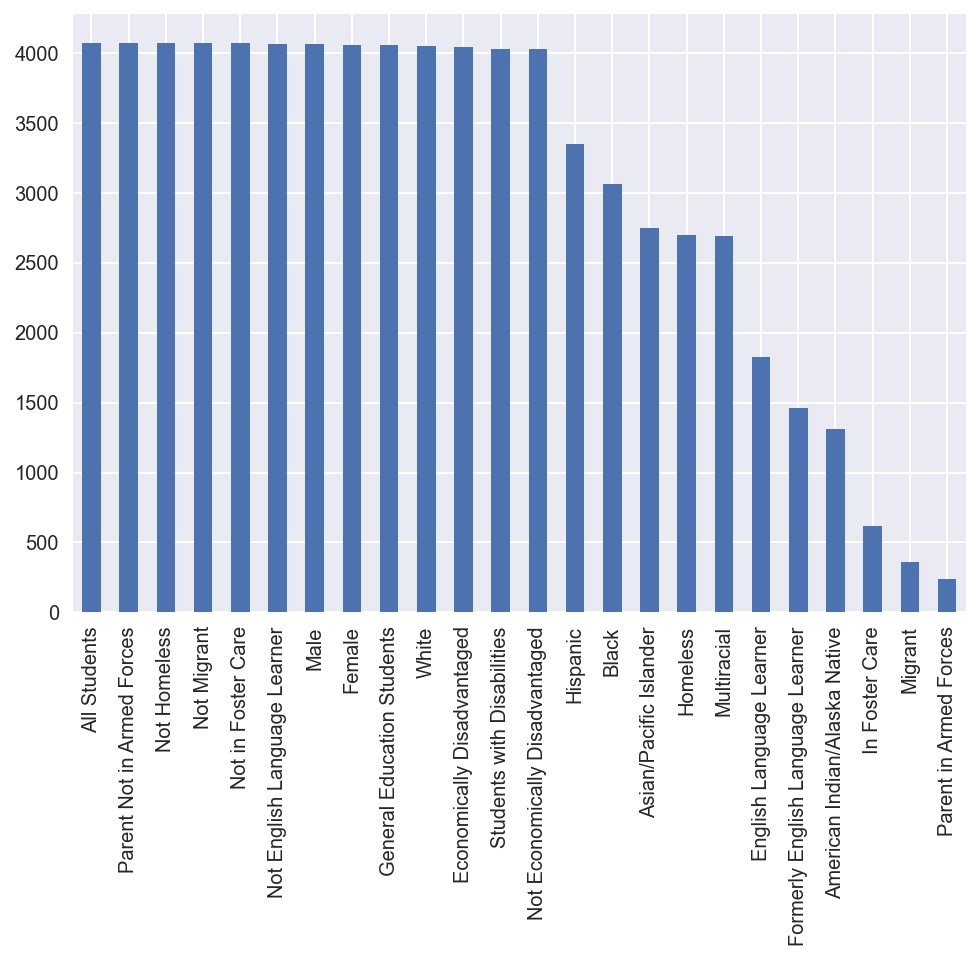

In [10]:
# draw bar chart
df['subgroup_name'].value_counts().plot.bar()

# 3. Exploratory Data Analysis

Now, We will perform exploratory data analysis to understand the nature of each of the variable

First, to copy a data sets.

In [11]:
students_df = df.copy()

In [12]:
students_df.describe()

aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code    enroll_cnt      grad_cnt      grad_pct     local_cnt  \
count   73152.000000  39674.000000  39674.000000  39674.000000  39674.000000   
mean       12.000930    192.120079    161.178354     84.406614     12.340903   
std         7.213138    439.972474    361.294773     15.679500     32.046302   
min         1.000000      5.000000      0.000000      0.000000      0.000000   
25%         6.000000     25.000000     20.000000     79.000000      1.000000   
50%        11.000000     66.000000     57.000000     89.000000      4.000000   
75%        18.000000    179.000000    156.000000     95.000000     10.000000   
max        25.000000   9176.000000   7540.000000    100.000000    557.000000   

          local_pct       reg_cnt       reg_pct   reg_adv_cnt   reg_adv_pct  \
count  39674.000000  39674.000000  39674.000000  39674.000000  39674.000000   
mean       8.479936     86.804708     43.371125     62.032742     32.577204   
std       10.398486    225.795826     17.124891    132.777866     23.001197   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000     10.000000     33.000000      4.000000     14.000000   
50%        6.000000     27.000000     43.000000     18.000000     31.000000   
75%       11.000000     69.000000     53.000000     62.000000     49.000000   
max      100.000000   4752.000000    100.000000   2231.000000    100.000000   

       non_diploma_credential_cnt  non_diploma_credential_pct  still_enr_cnt  \
count                39674.000000                39674.000000   39674.000000   
mean                     1.924485                    1.742627      11.299516   
std                      6.498913                    4.063987      40.766672   
min                      0.000000                    0.000000       0.000000   
25%                      0.000000                    0.000000       0.000000   
50%                      0.000000                    0.000000       2.000000   
75%                      2.000000                    2.000000       5.000000   
max                    279.000000                   67.000000    1381.000000   

       still_enr_pct       ged_cnt       ged_pct   dropout_cnt   dropout_pct  
count   39674.000000  39674.000000  39674.000000  39674.000000  39674.000000  
mean        5.190704      1.377577      0.612693     16.239225      7.963049  
std         8.832710      4.949389      1.985445     50.129834      9.658698  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.000000      1.000000      1.000000  
50%         2.000000      0.000000      0.000000      3.000000      5.000000  
75%         6.000000      1.000000      0.000000      9.000000     11.000000  
max       100.000000     97.000000     67.000000   1091.000000    100.000000

In [13]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  Int64  
 13  grad_cnt                    396

The count columns and percentage columns have missing value. They should be processed during Data Preparation.

In [14]:
# response column
# response_col = ['dropout_cnt']

# categorical columnes
cat_cols = ['report_school_year',  'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name']

# all count columns
cnt_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 
       'still_enr_cnt', 'ged_cnt',  'dropout_cnt']

# all percentage columns
pct_cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct']

To see the number of types of each category

In [15]:
from IPython.display import HTML, display
def display_html_ratio_table(data, cols):
    
    df_shape = data.shape
    
    for i in range(len(cols)):
        
        html = "<table>"
        html += "<tr><td>name</td><td>count</td><td>ratio</td></tr>"
        
        g = data.iloc[:,i].value_counts()

        print(cols[i])
        
        for index, value in g.items():
            html += "<tr><td>%s</td><td>%d</td><td>%.4f</td></tr>" %(index, value, value / df_shape[0])

        html += "</table>"
        display(HTML(html))

display_html_ratio_table(students_df[cat_cols + cnt_cols], cat_cols + cnt_cols)

report_school_year


aggregation_type


aggregation_name


nrc_code


nrc_desc


county_code


county_name


nyc_ind


membership_desc


subgroup_code


subgroup_name


enroll_cnt


grad_cnt


local_cnt


reg_cnt


reg_adv_cnt


non_diploma_credential_cnt


still_enr_cnt


ged_cnt


dropout_cnt


The report_school_year and aggregation_type has one value. They can be dropped.

The nrc_code is alias of nrc_desc. One of them can be dropped.

The county_code is alias of county_name. One of them can be dropped.

The subgroup_code is alias of subgroup_name. One of them can be dropped.

Next, using new category columns to draw bar charts.

In [16]:
# new cagetory columns
# new_cat_cols = ['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind', 'membership_desc',  'subgroup_name']

new_cat_cols = ['aggregation_name', 'nrc_code', 'county_code', 'nyc_ind', 'membership_desc',  'subgroup_code']

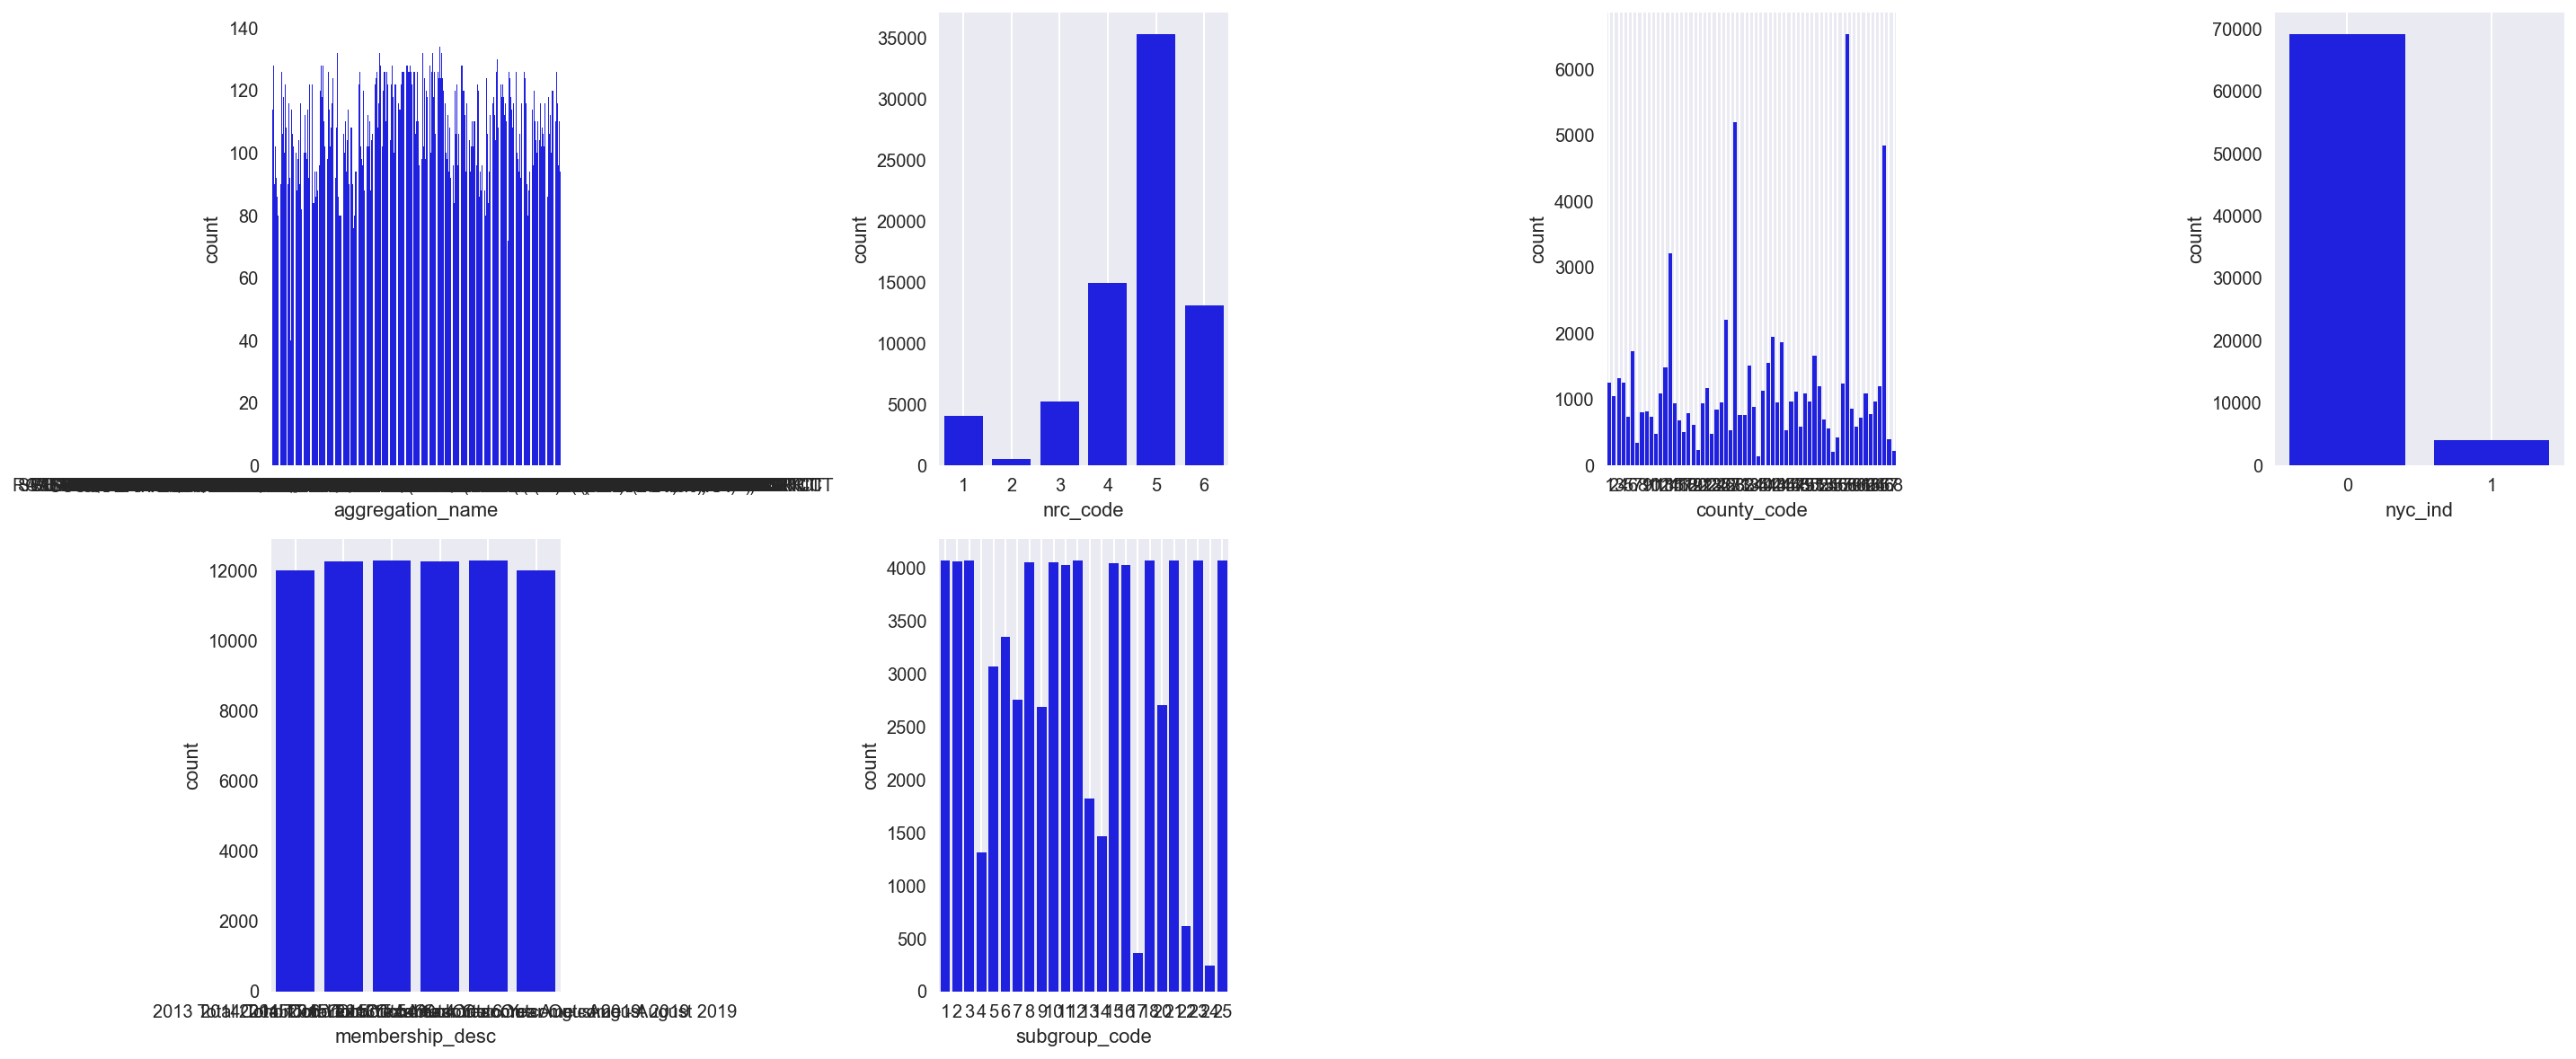

In [17]:
# use bar chart to analyze categories
# see the bar chart
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(new_cat_cols)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=students_df, color='blue')
    plt.grid()
    plt.tight_layout()

The aggregation_name and county_name have many values. They are not fit to be a category.

In [18]:
# TODO
# drop aggregation_name and county_name. then create a new cagetory columns
# new_cat_cols = ['nrc_desc', 'nyc_ind', 'membership_desc',  'subgroup_name']

Next, see the count varibales

Because the count columns have NA value, I will create a new data set to draw bar plots.

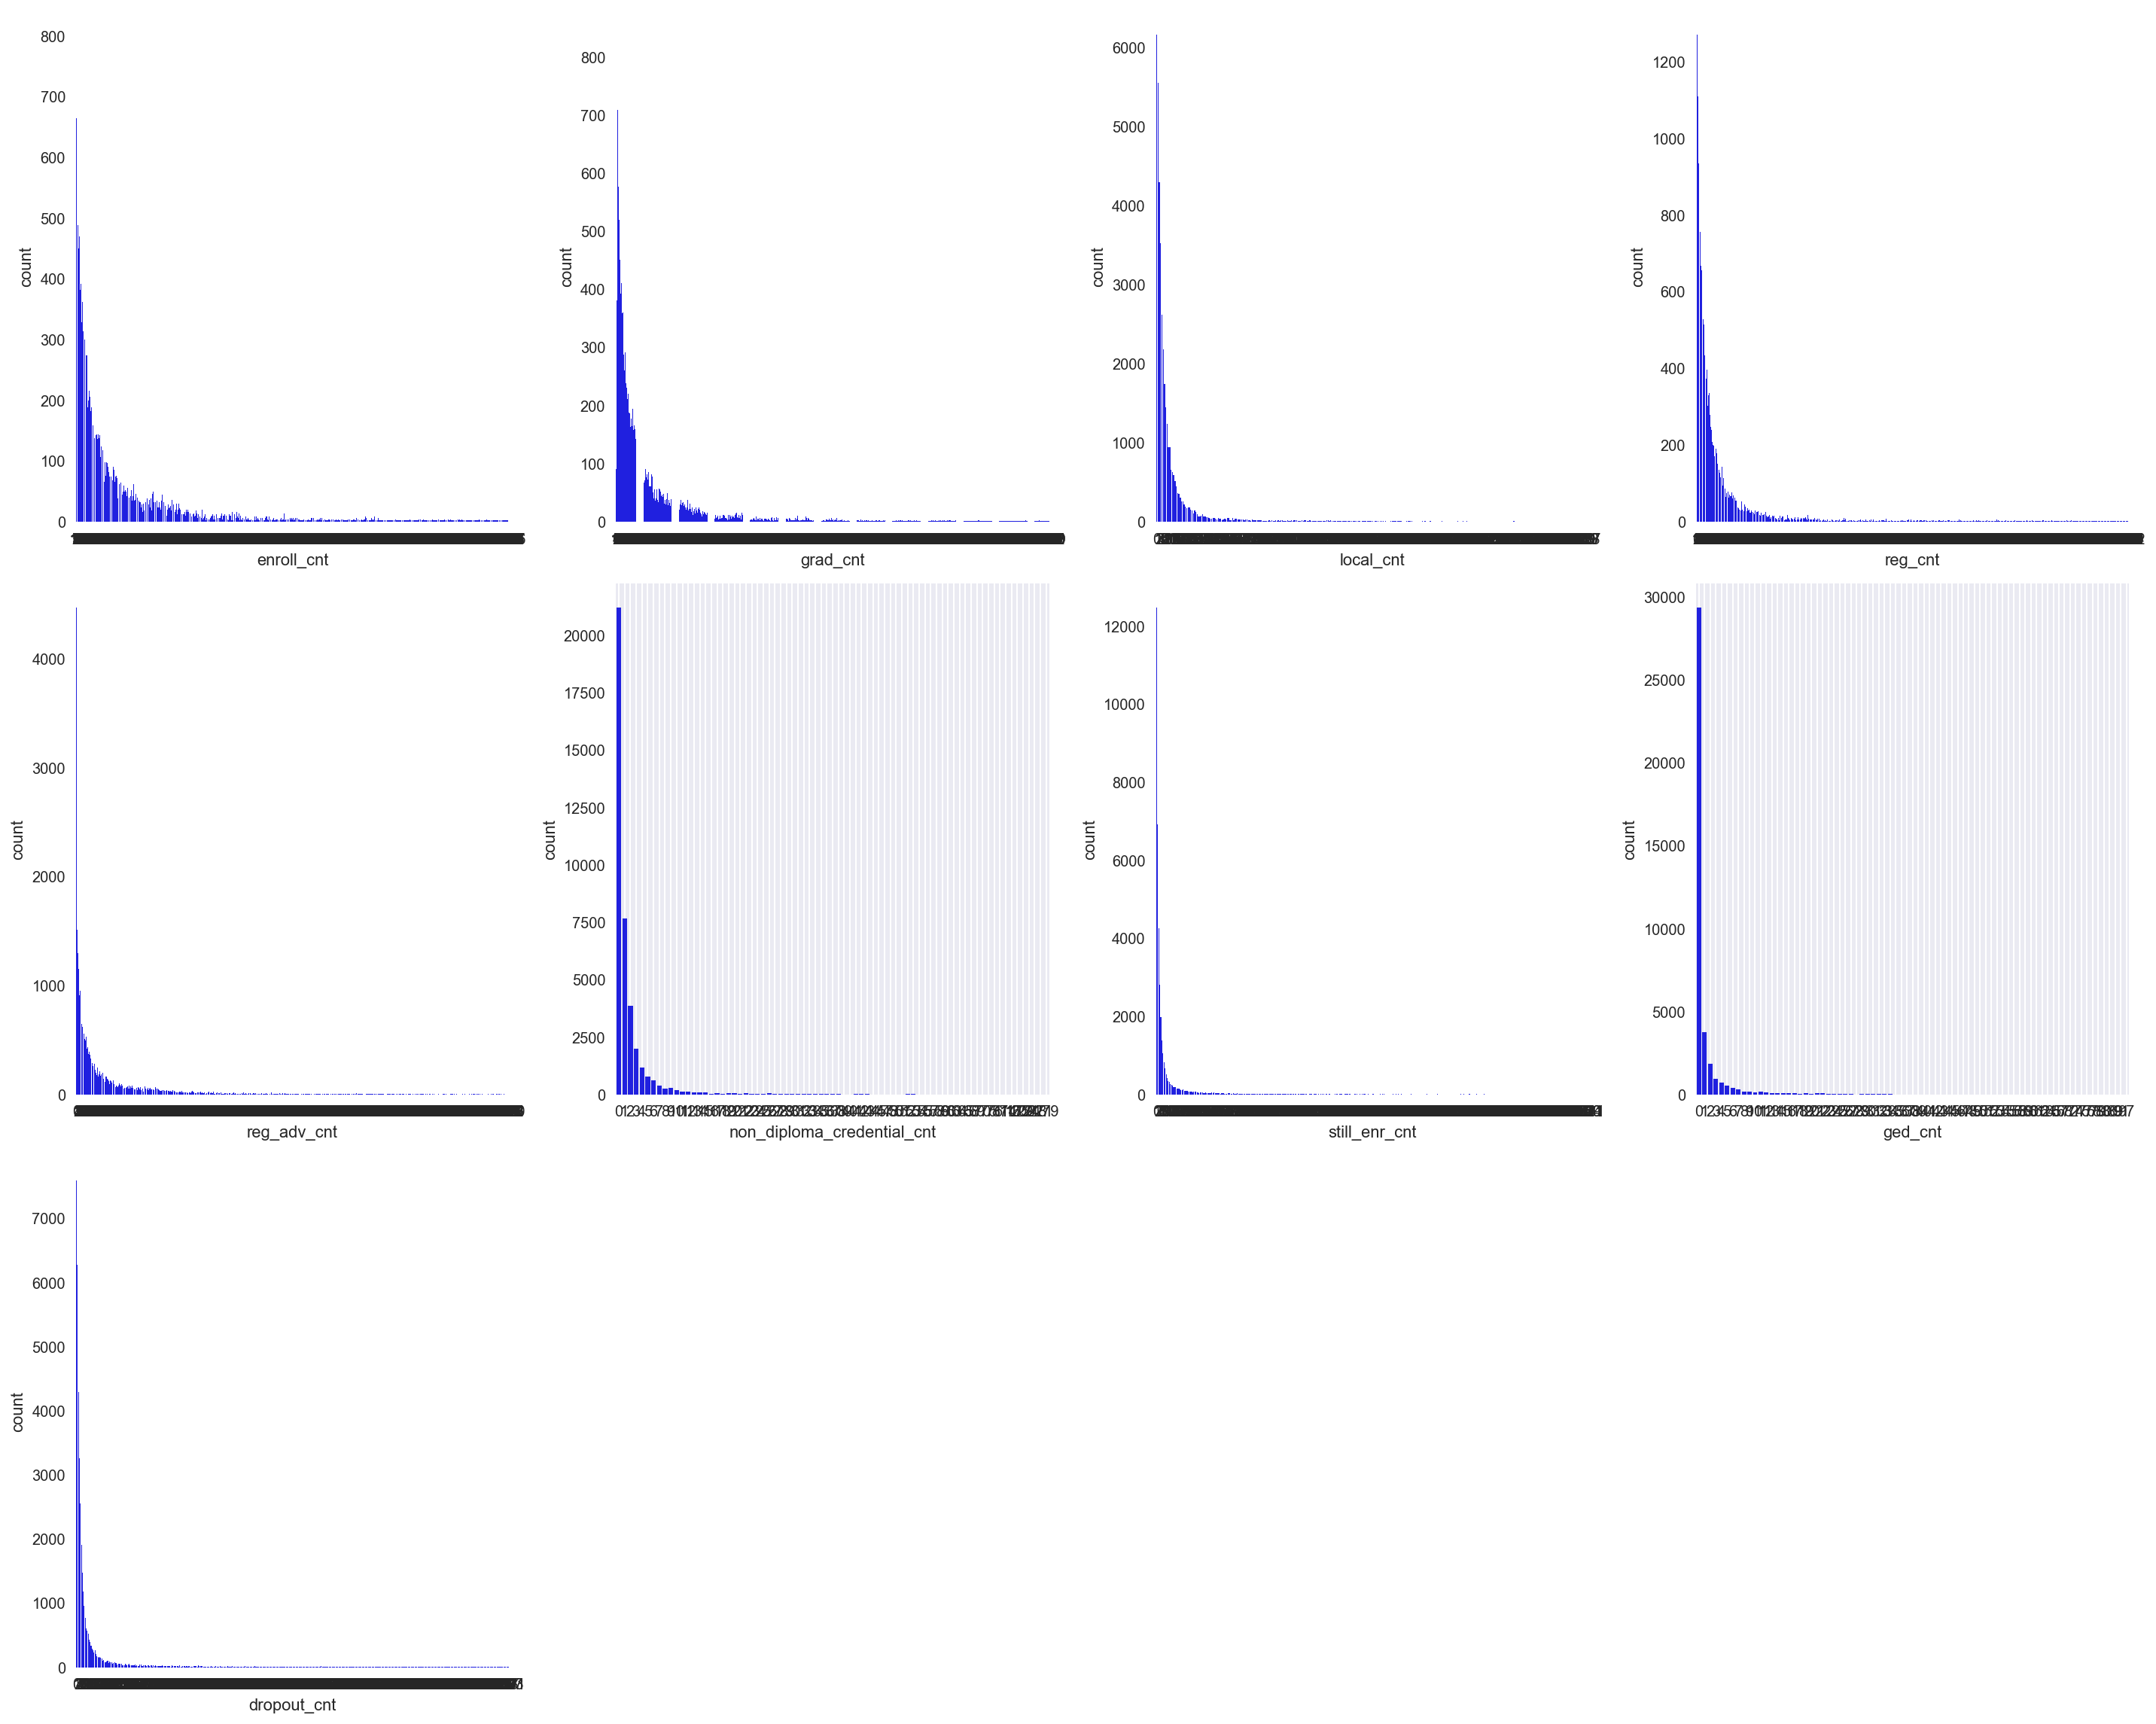

In [19]:
# create a new data set without NA value for all count columns

# see the count columns by bar chart
no_NA_df = students_df[cnt_cols].dropna()

plt.figure(figsize = (20, 16))
for i, col in enumerate(list(cnt_cols)):
    plt.subplot(3, 4, i + 1)
    sns.countplot(x=col, data=no_NA_df, color='blue')
    plt.grid()
    plt.tight_layout()

The above charts show that the values of all count variables concentrate near 0. After imputing missing values, we need review them.

Next, see the percentage variables

In [20]:
# using histogram and boxplot to see the percentage variables
def hist_box(data_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Histogram of " + col)
    sns.histplot(data_df[col], bins = 50, ax=axes[0])
    
    axes[1].set_title("Boxplot of " + col)
    sns.boxplot(y=data_df[col], orient="v",ax=axes[1])
    
def show_statistic(data_df, col):
    
    count = data_df[col].count()
    mean = data_df[col].mean()
    var = data_df[col].var()
    std = data_df[col].std()
    q1 = data_df[col].quantile(.25)
    q2 = data_df[col].quantile(.50)
    q3 = data_df[col].quantile(.75)
    d_min= data_df[col].min()
    d_max = data_df[col].max()
    sigema = 3.0
    
    del_outliers = data_df[np.abs(data_df[col] - mean ) > (sigema * std )]
    
    
    print("%s : count = %d, mean = %.4f, var = %.4f, std = %.4f, q1(25%%) = %.4f, q3(75%%) = %.4f, min = %.4f, max = %.4f" 
          %(col, count, mean, var, std, q1, q3, d_min, d_max))
    
    if del_outliers.shape[0] > 0:
        out_num = del_outliers.shape[0]
        out_pct = (out_num / data_df[col].shape[0]) * 100
        print("It has %d ourliers that larger than (mean + 3*std), account for %.4f %%" %(out_num, out_pct))

grad_pct : count = 39674, mean = 84.4066, var = 245.8467, std = 15.6795, q1(25%) = 79.0000, q3(75%) = 95.0000, min = 0.0000, max = 100.0000
It has 801 ourliers that larger than (mean + 3*std), account for 1.0950 %


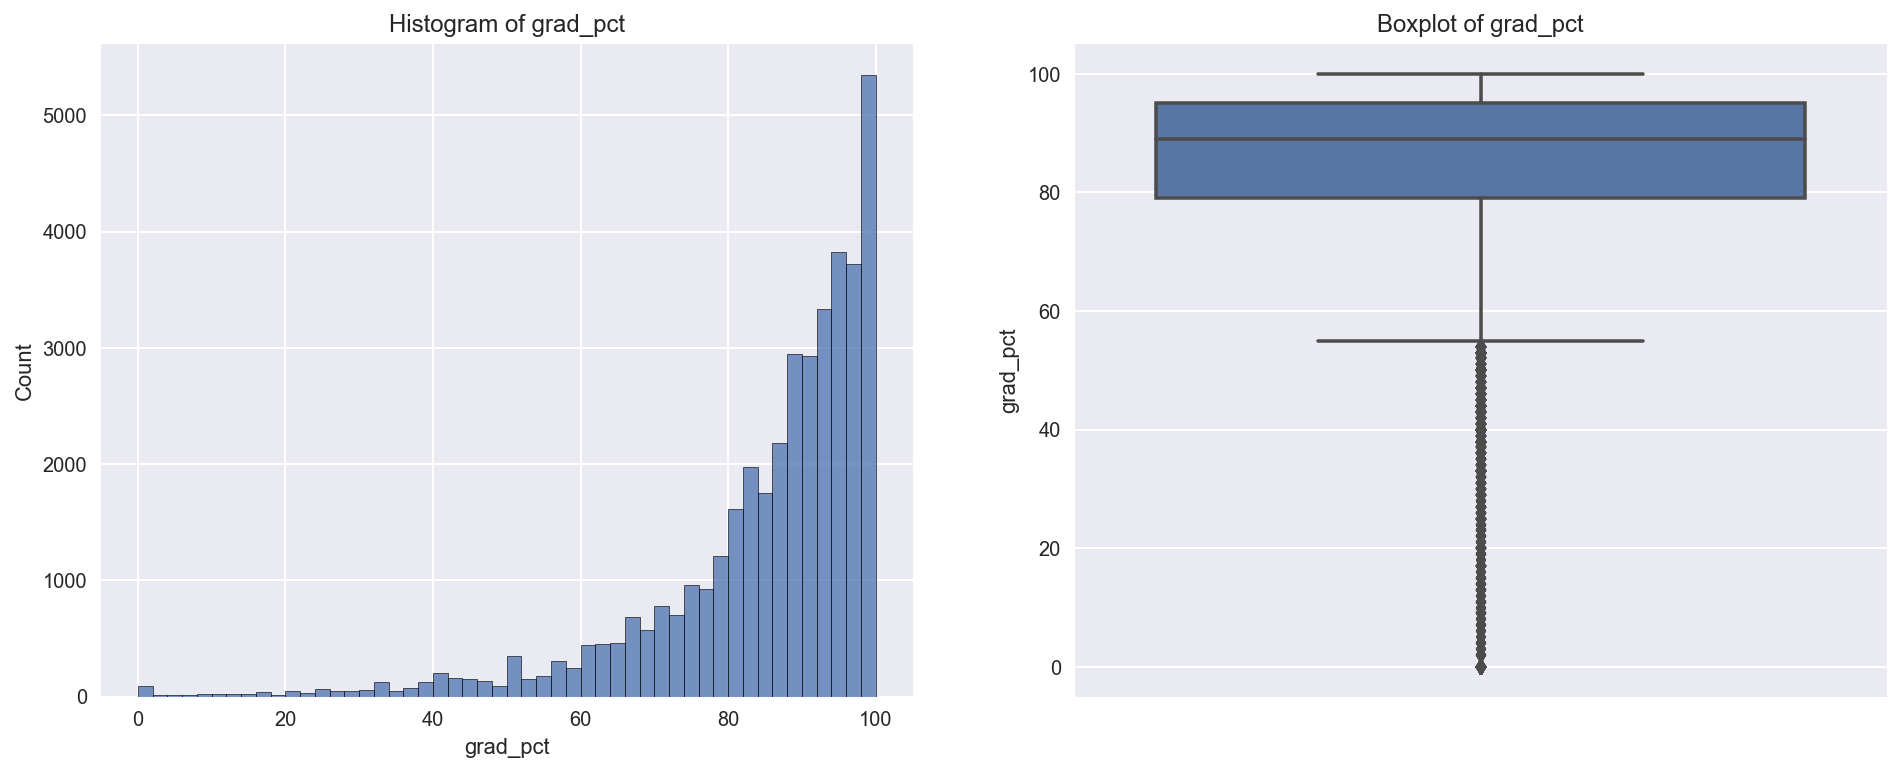

In [21]:
# 14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
hist_box(students_df, 'grad_pct')
show_statistic(students_df, 'grad_pct')

grad_pct shows left skewed distribution and has outliers.

local_pct : count = 39674, mean = 8.4799, var = 108.1285, std = 10.3985, q1(25%) = 2.0000, q3(75%) = 11.0000, min = 0.0000, max = 100.0000
It has 1056 ourliers that larger than (mean + 3*std), account for 1.4436 %


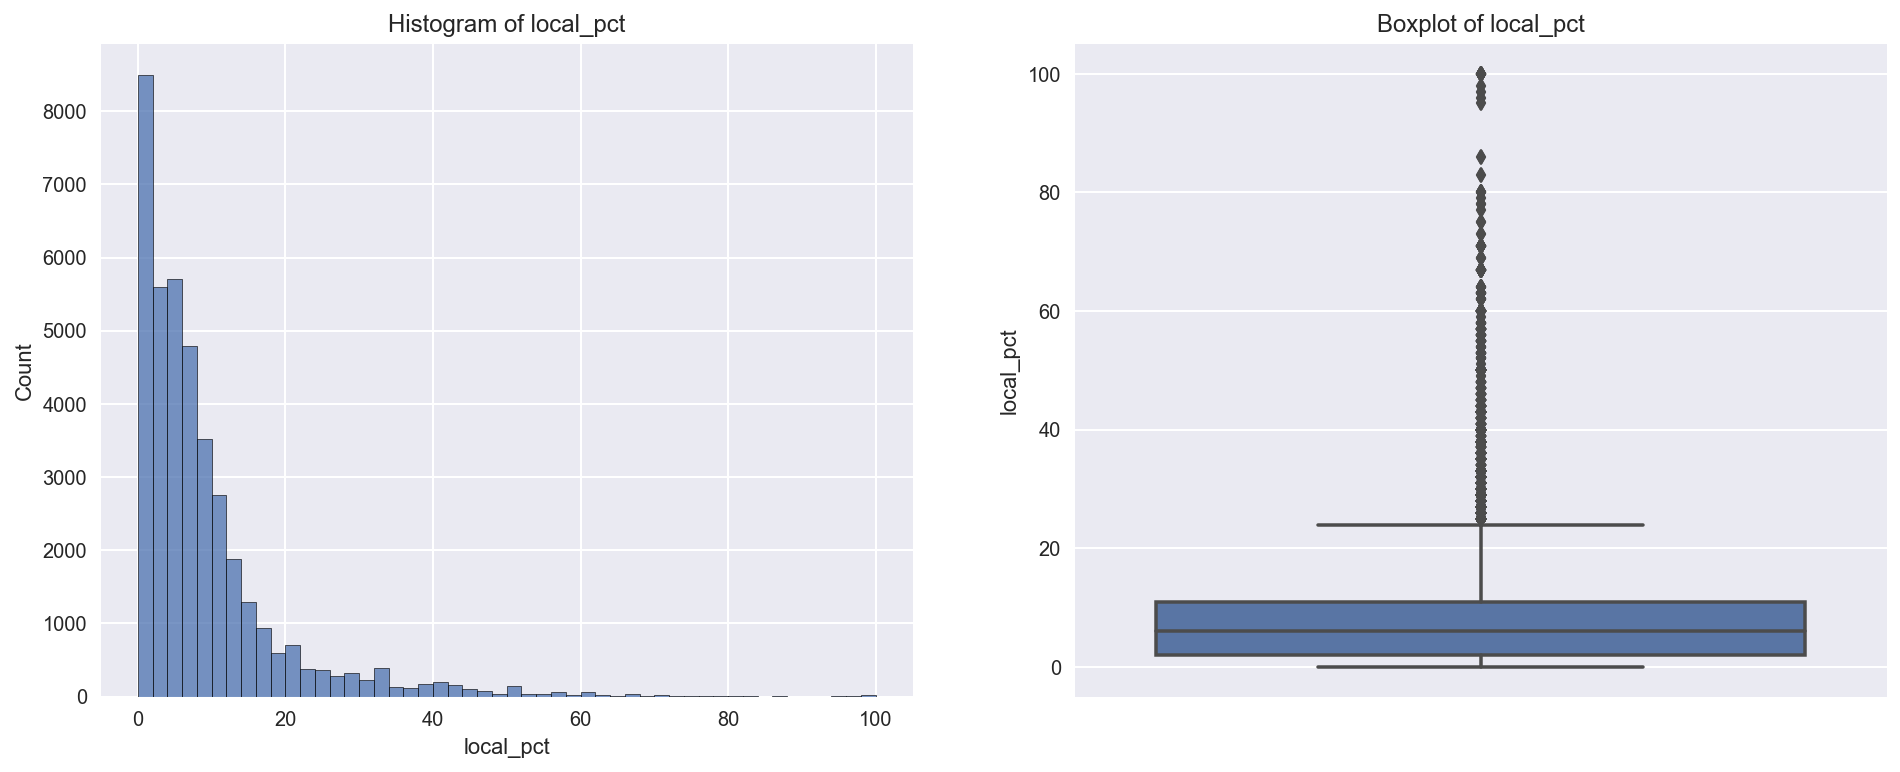

In [22]:
# 16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
hist_box(students_df, 'local_pct')
show_statistic(students_df, 'local_pct')

local_pct shows right skewed distribution and has outliers.

reg_pct : count = 39674, mean = 43.3711, var = 293.2619, std = 17.1249, q1(25%) = 33.0000, q3(75%) = 53.0000, min = 0.0000, max = 100.0000
It has 511 ourliers that larger than (mean + 3*std), account for 0.6985 %


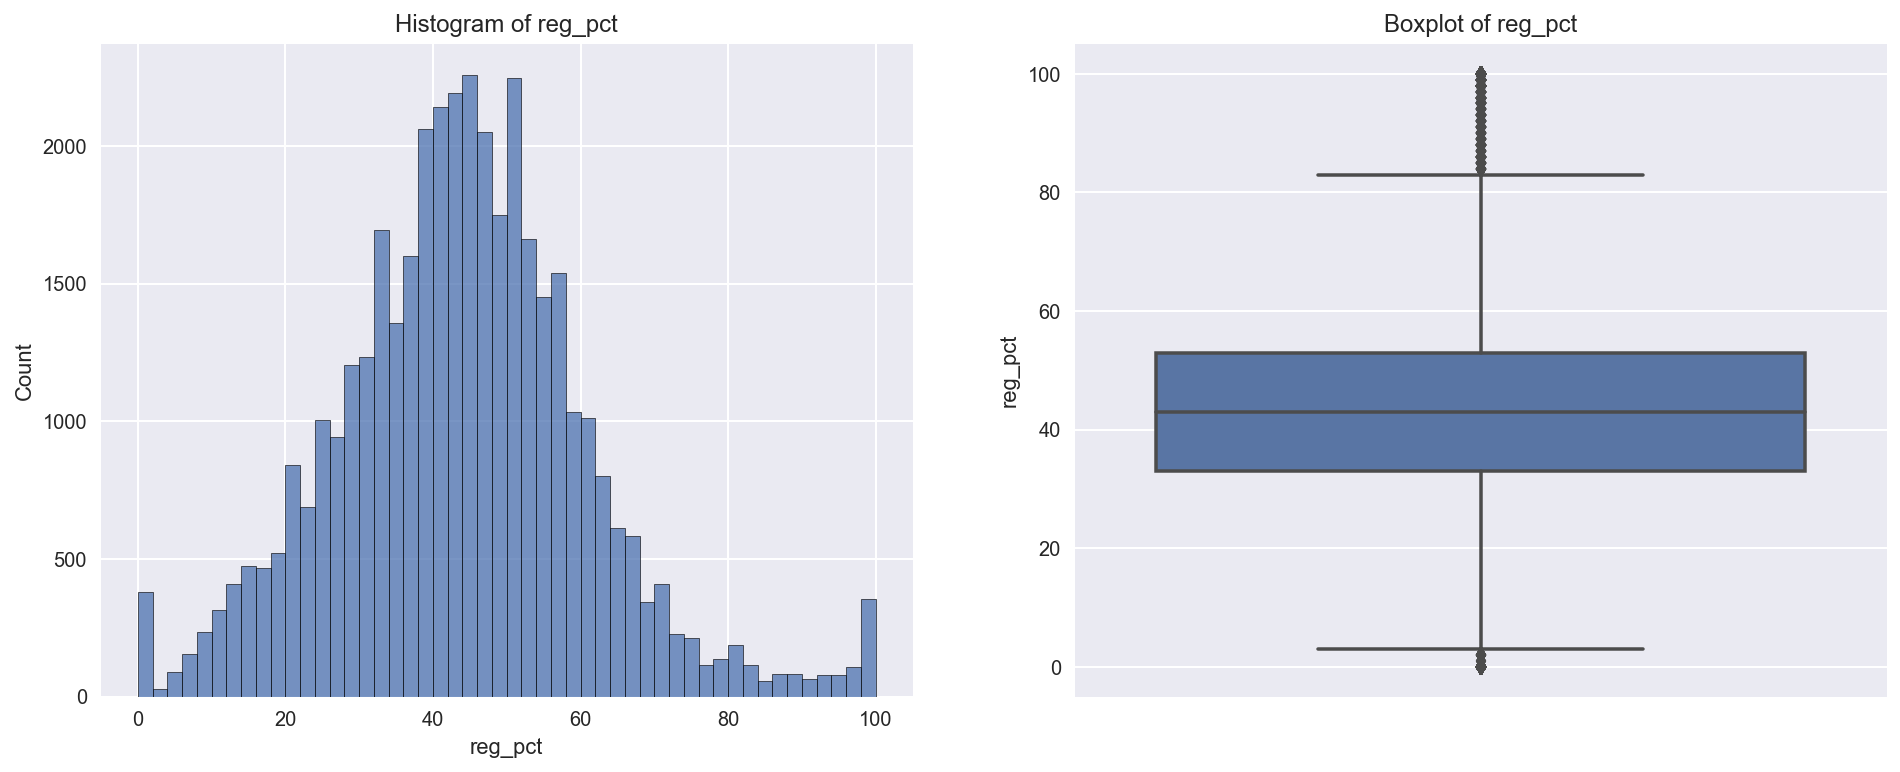

In [23]:
# 18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
hist_box(students_df, 'reg_pct')
show_statistic(students_df, 'reg_pct')

reg_pct shows nearly normal distribution but has outliers on two sides.

reg_adv_pct : count = 39674, mean = 32.5772, var = 529.0551, std = 23.0012, q1(25%) = 14.0000, q3(75%) = 49.0000, min = 0.0000, max = 100.0000


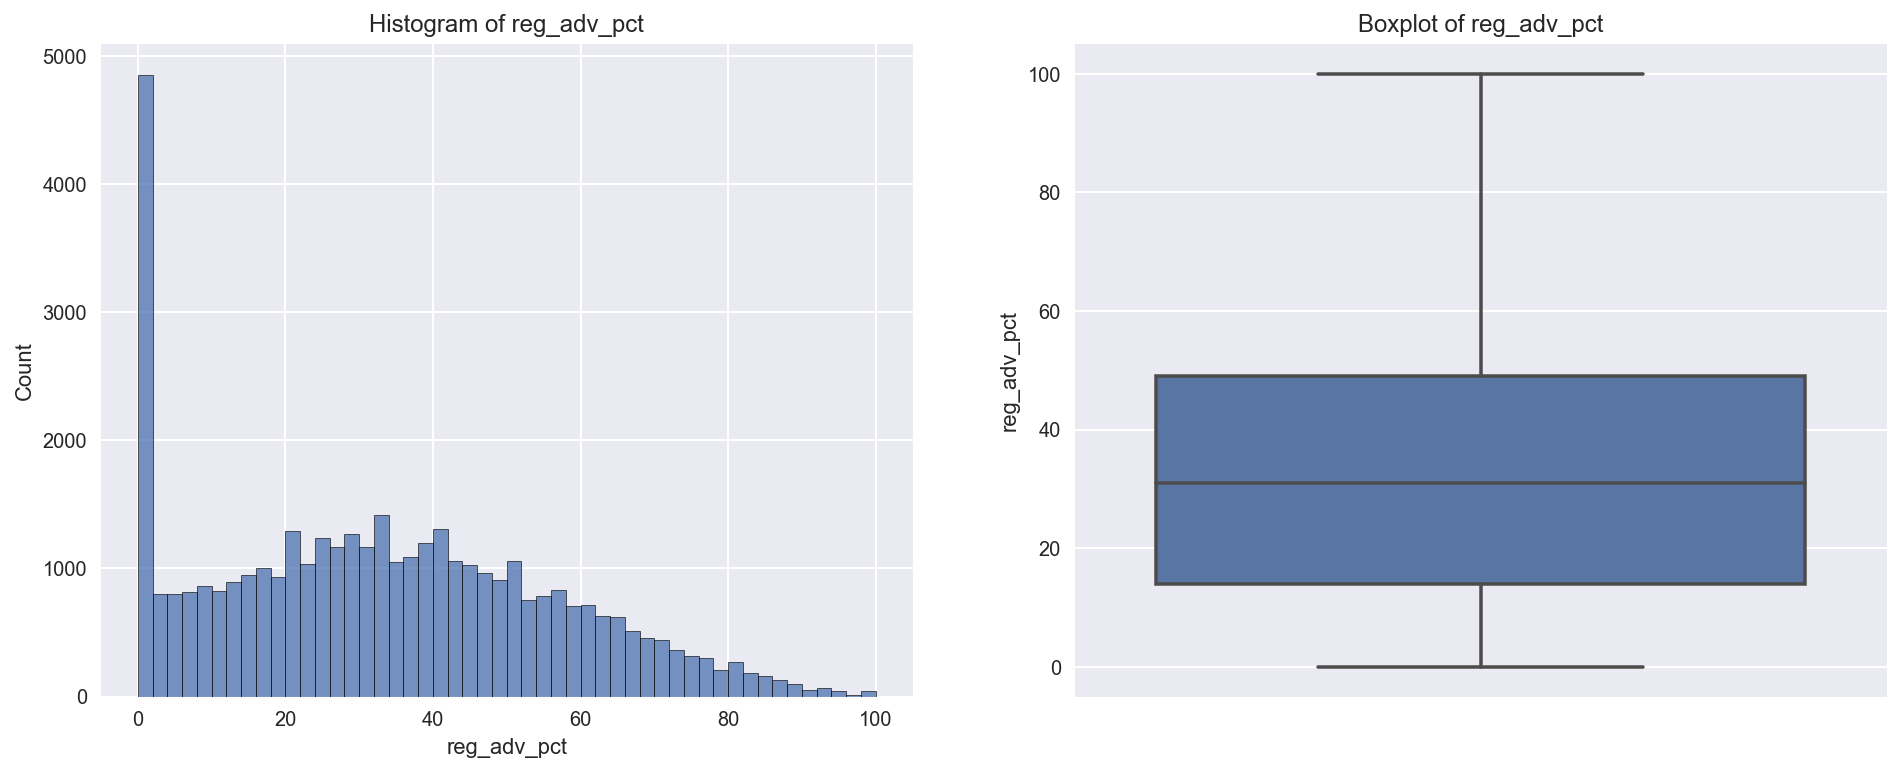

In [24]:
# 20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
hist_box(students_df, 'reg_adv_pct')
show_statistic(students_df, 'reg_adv_pct')

reg_adv_pct shows right skewed distribution. The frequence of 0 is near 5000.

non_diploma_credential_pct : count = 39674, mean = 1.7426, var = 16.5160, std = 4.0640, q1(25%) = 0.0000, q3(75%) = 2.0000, min = 0.0000, max = 67.0000
It has 980 ourliers that larger than (mean + 3*std), account for 1.3397 %


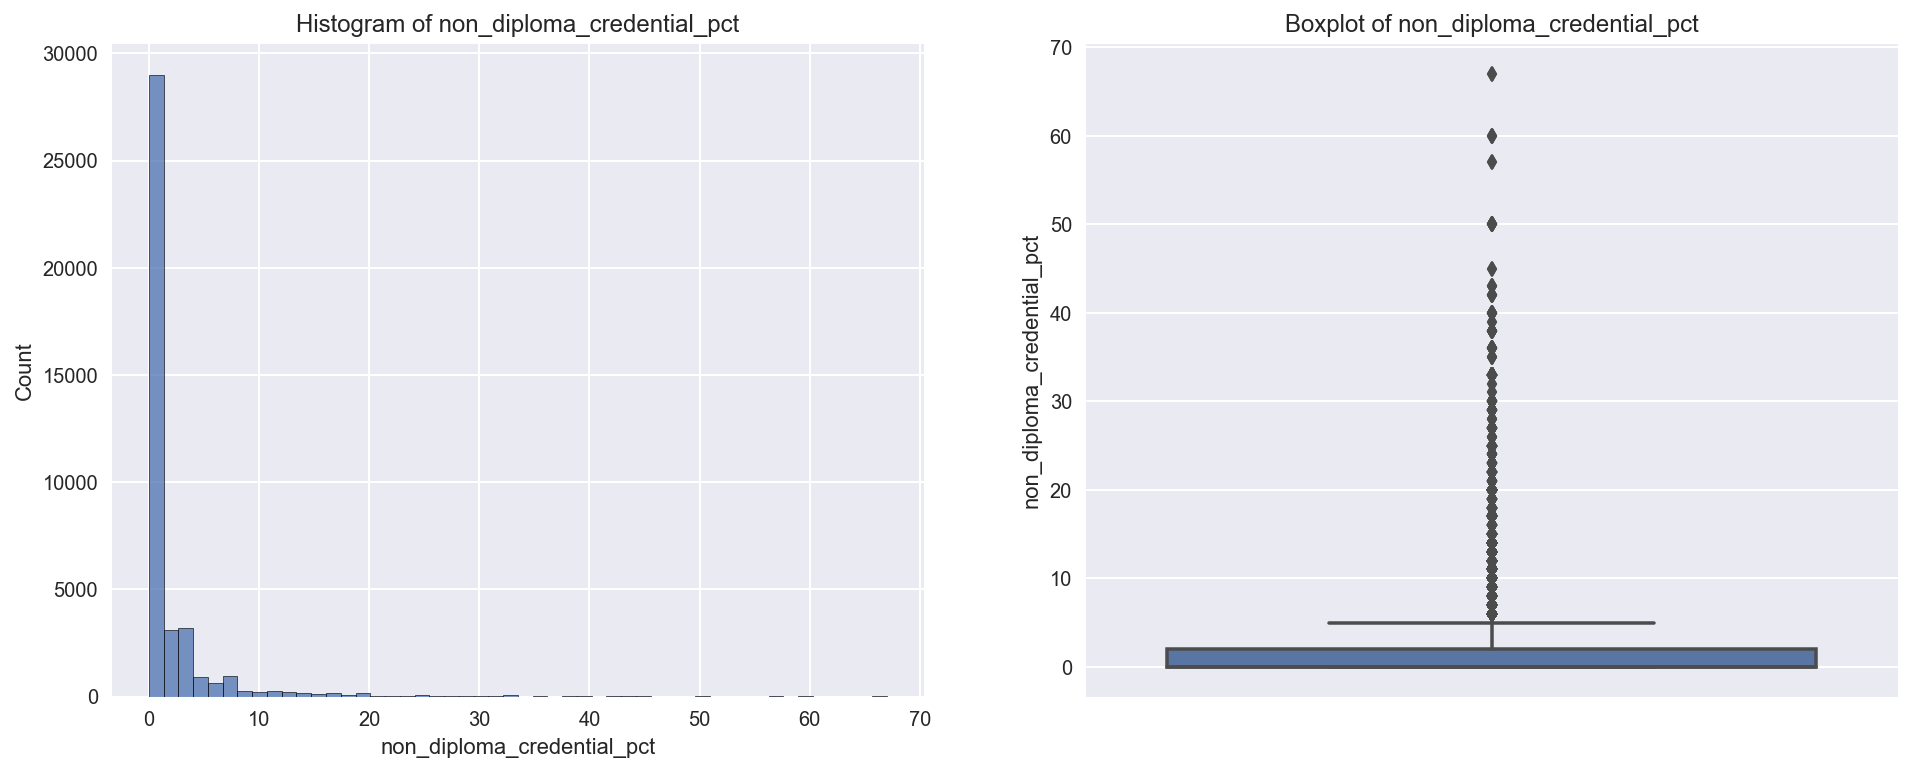

In [25]:
# 22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved 
# a non-diploma credential
hist_box(students_df, 'non_diploma_credential_pct')
show_statistic(students_df, 'non_diploma_credential_pct')

non_diploma_credential_pct shows right skewed distribution and has outliers.

still_enr_pct : count = 39674, mean = 5.1907, var = 78.0168, std = 8.8327, q1(25%) = 0.0000, q3(75%) = 6.0000, min = 0.0000, max = 100.0000
It has 788 ourliers that larger than (mean + 3*std), account for 1.0772 %


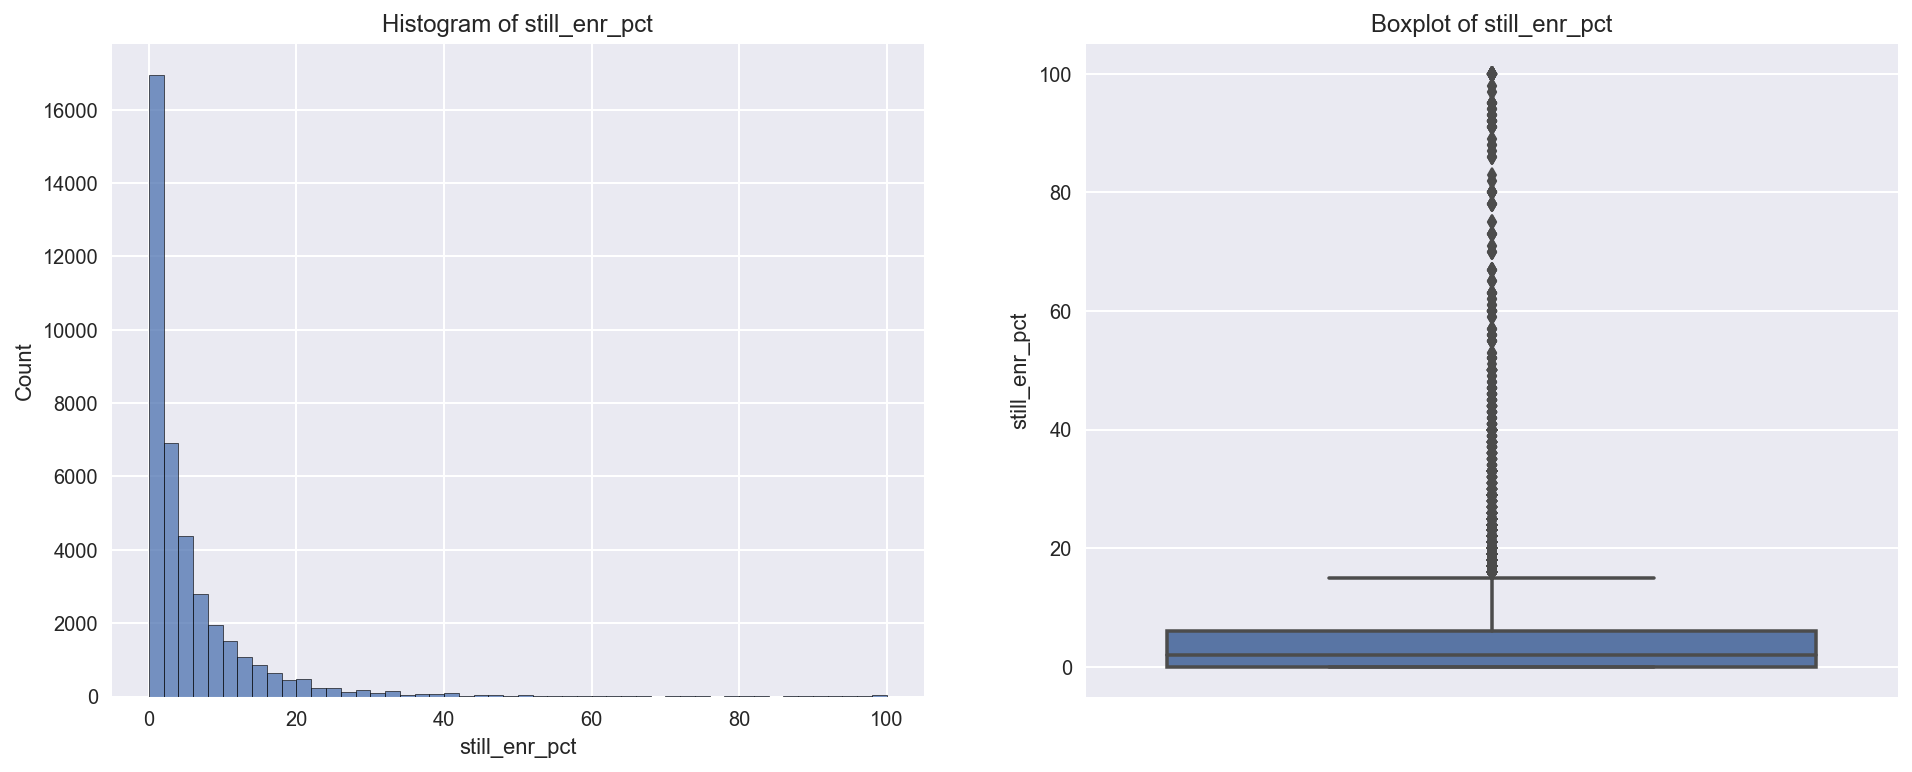

In [26]:
# 24. still_enr_pct: What percentage of enrolled students of the indicated subgrouping did not 
# graduate but were still_enrolled
hist_box(students_df, 'still_enr_pct')
show_statistic(students_df, 'still_enr_pct')

still_enr_pct shows right skewed distribution and has outliers.

dropout_pct : count = 39674, mean = 7.9630, var = 93.2904, std = 9.6587, q1(25%) = 1.0000, q3(75%) = 11.0000, min = 0.0000, max = 100.0000
It has 860 ourliers that larger than (mean + 3*std), account for 1.1756 %


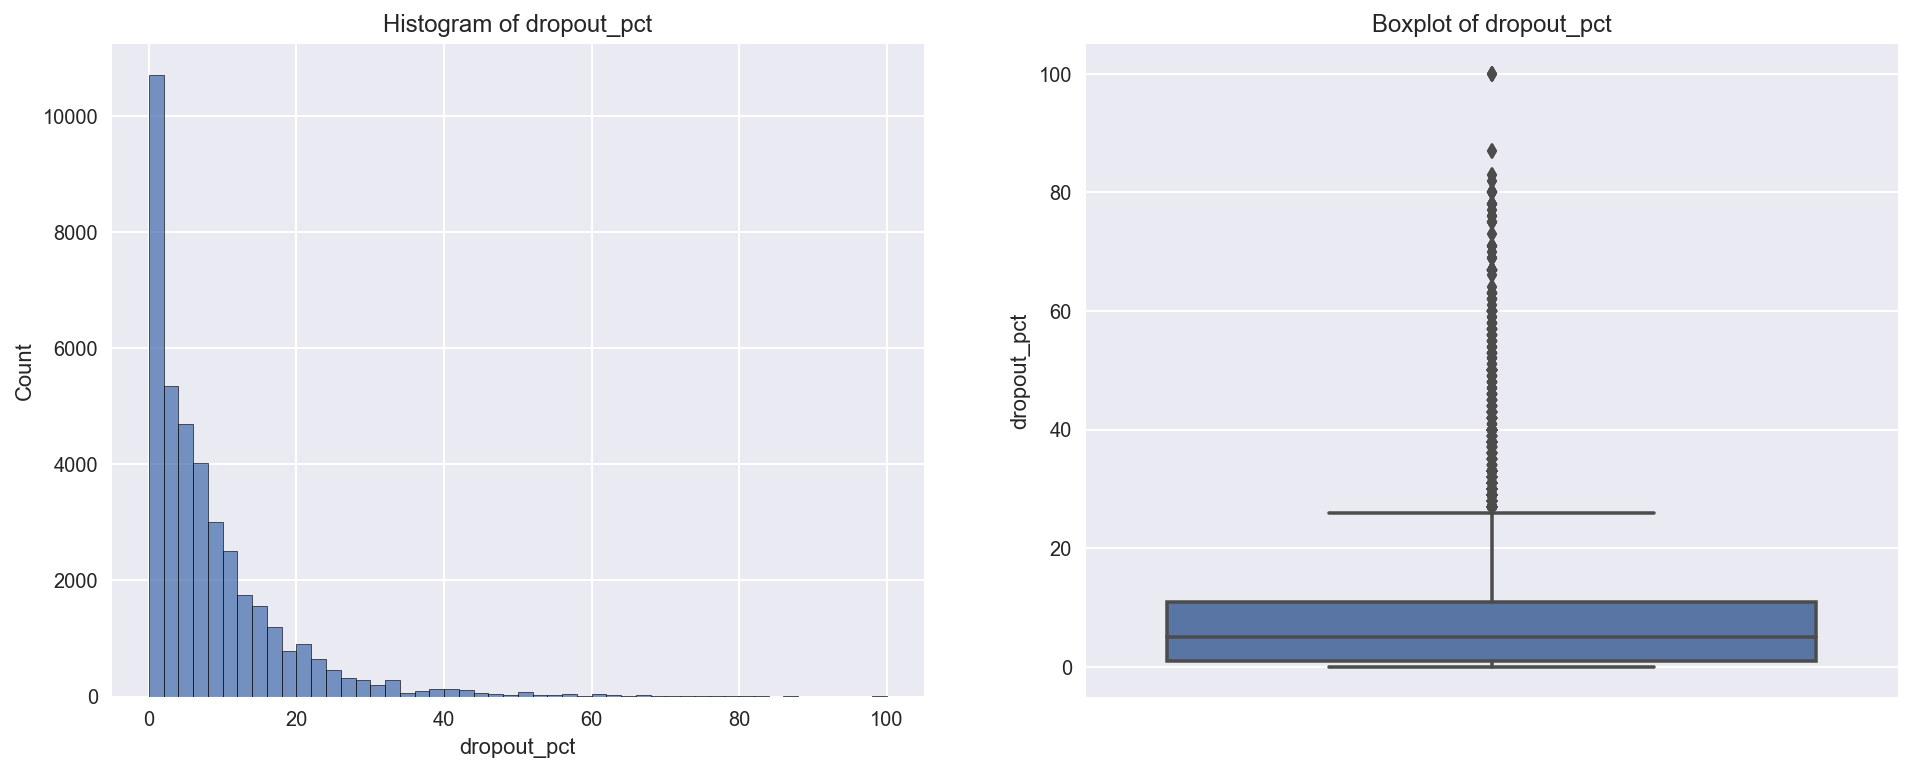

In [27]:
# 28. dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school 
# enrollment during the school year
hist_box(students_df, 'dropout_pct')
show_statistic(students_df, 'dropout_pct')

dropout_pct shows right skewed distribution and has outliers.

ged_pct : count = 39674, mean = 0.6127, var = 3.9420, std = 1.9854, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 67.0000
It has 688 ourliers that larger than (mean + 3*std), account for 0.9405 %


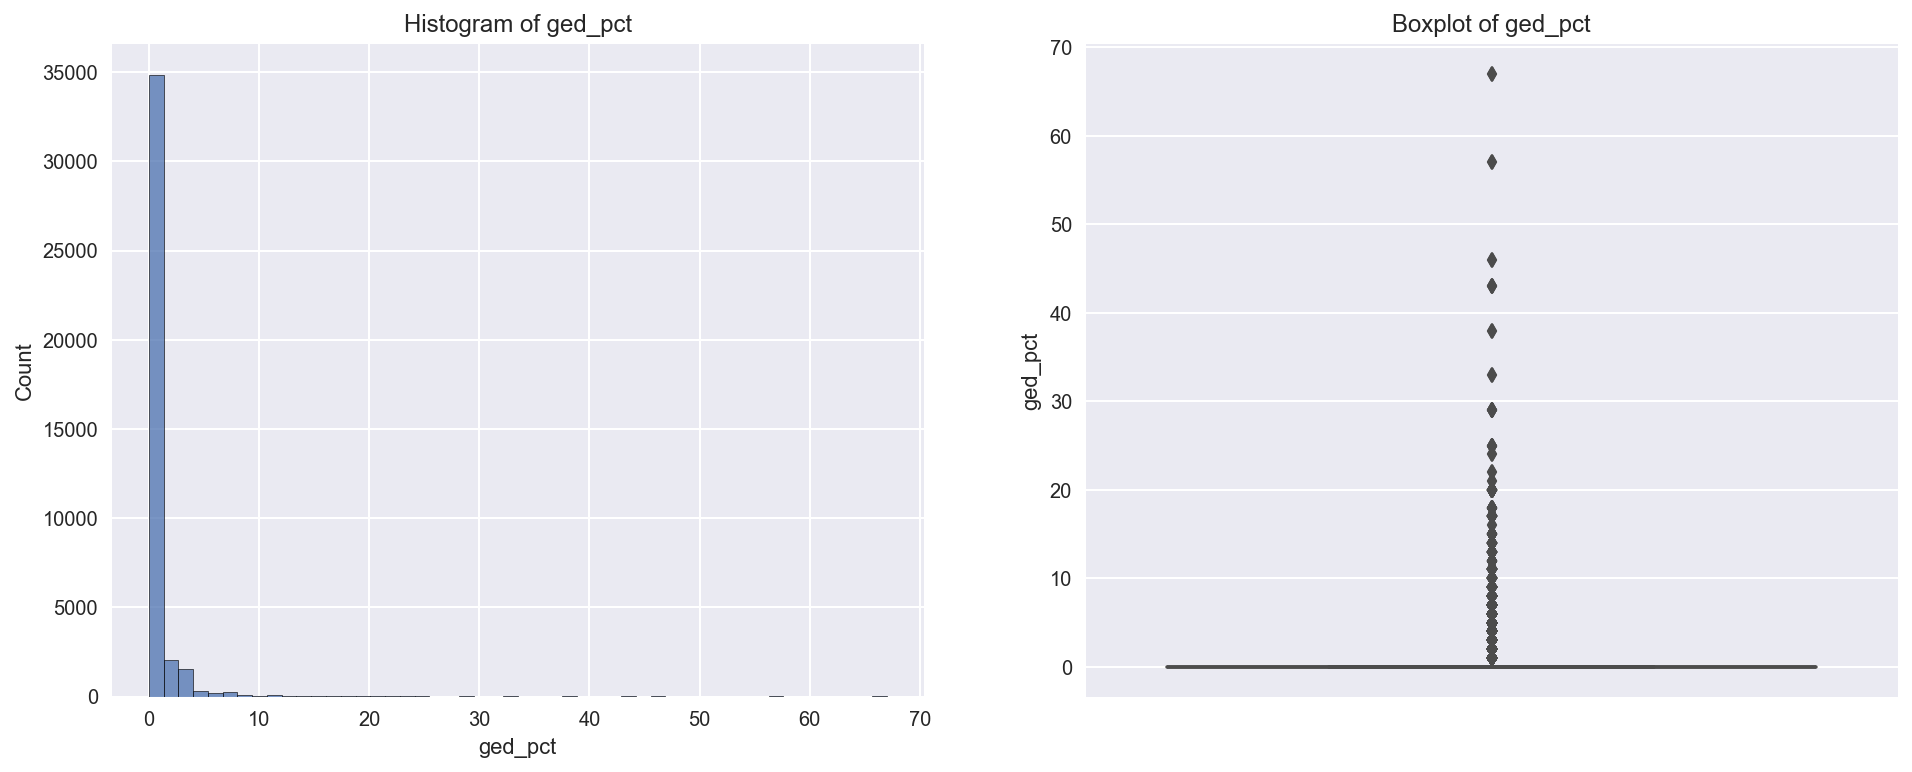

In [28]:
# 26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
hist_box(students_df, 'ged_pct')
show_statistic(students_df, 'ged_pct')

ged_pct concentrates from 0 to 4. It has outliers.

See the correlation values

<AxesSubplot:>

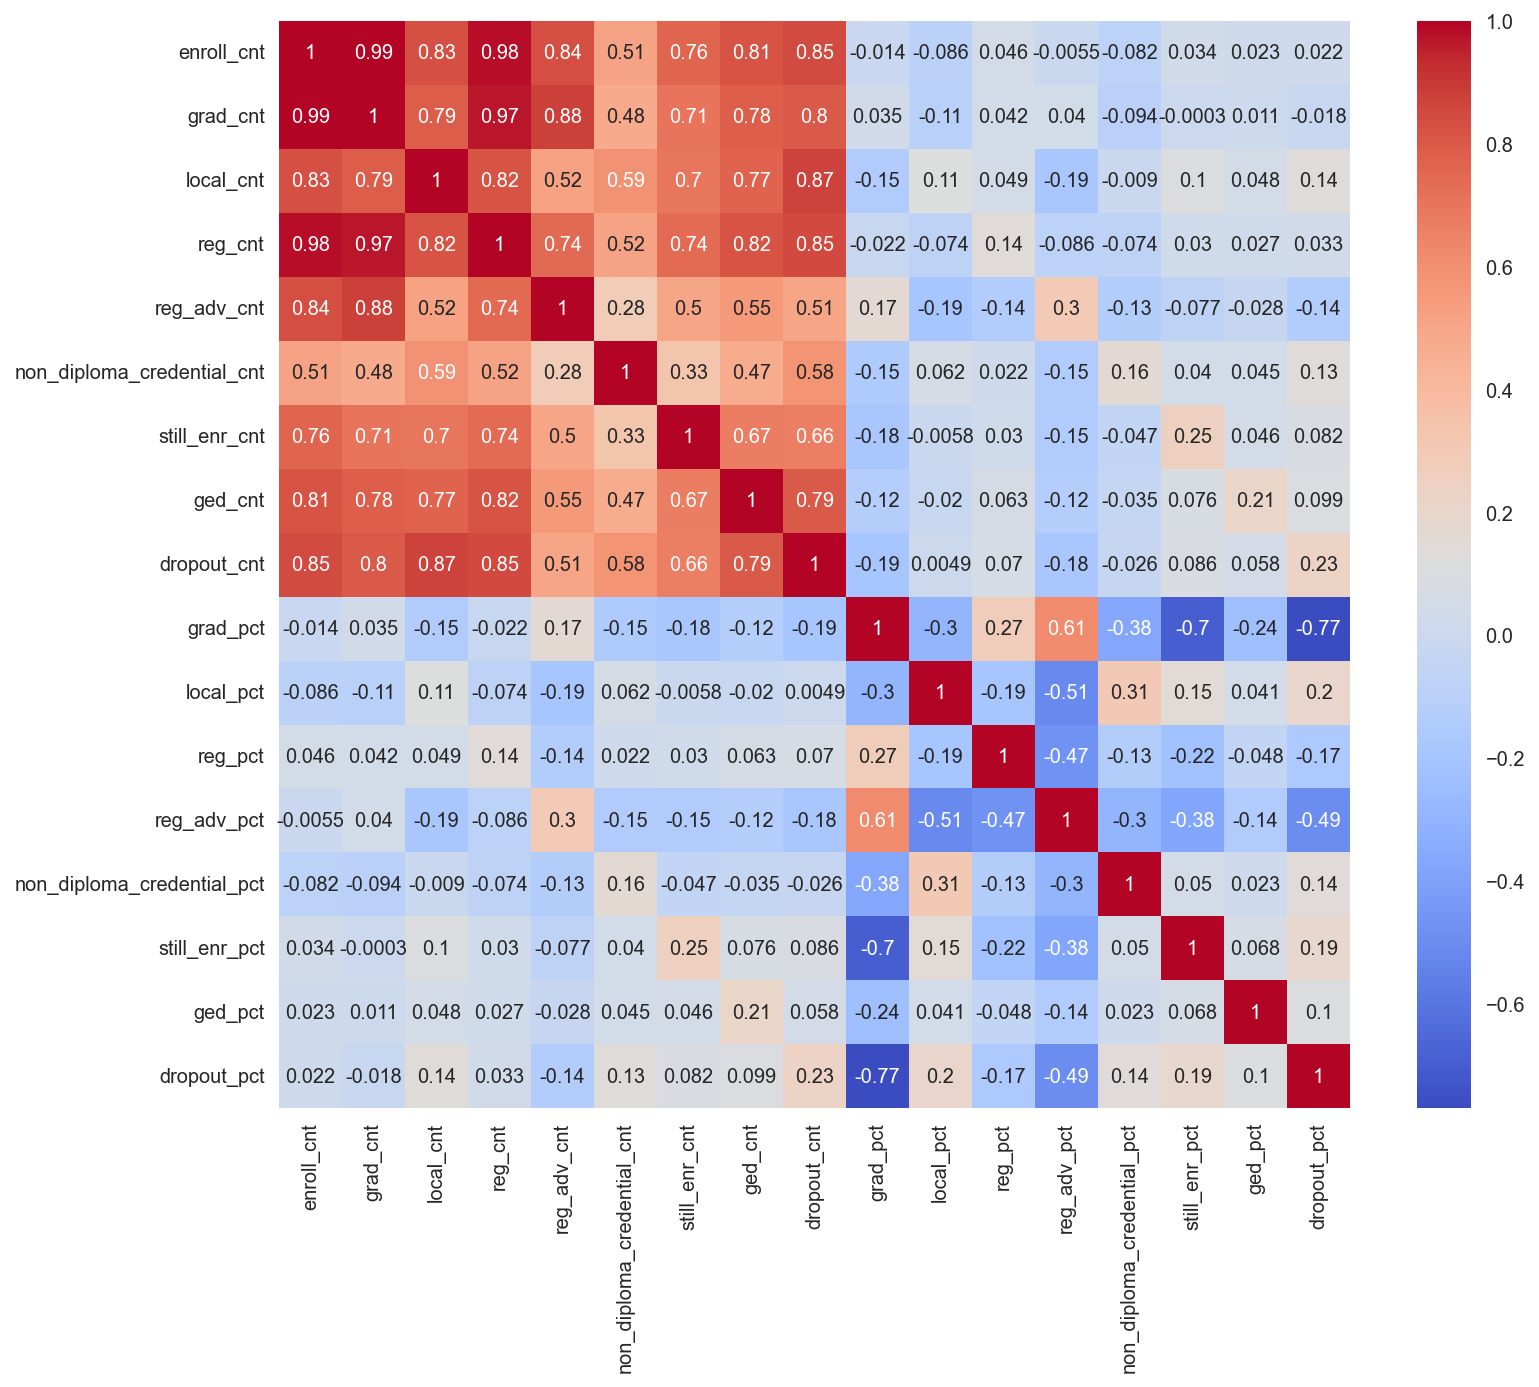

In [29]:
corr_matrix = students_df[cnt_cols + pct_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Among all Count variables have higher correlation value than the correlation among all percentage variables.

### Summary

The original data set contains many subgroupings. These subgroupings are suitable for comparative by groups.

During the Exploratory Data Analysis, I found as followed:

The set has missing values.

I select 'nrc_desc', 'nyc_ind', 'membership_desc' and  'subgroup_name' as the categories, because the code of them are not easy to interpret.

The values of all count variables concentrate near 0. After imputing missing values, we need review them.

The distribution of percentage columns show following:

Left skewed distribution: grad_pct

Right skewed distribution: local_pct， reg_adv_pct， non_diploma_credential_pct， still_enr_pct， dropout_pct, ged_pct

Normal distribution: reg_pct


# 4. Data Preparation

- Process Missing values
- Create the new respone
- Drop outliers

In [31]:
# copy a new data set
student_df_bak = students_df.copy()
students_df = students_df[new_cat_cols + cnt_cols + pct_cols].copy()

In [33]:
students_df.shape

(73152, 23)

In [34]:
students_df.head(3)

aggregation_name  nrc_code  county_code  nyc_ind  \
0  ALBANY CITY SCHOOL DISTRICT         3            1        0   
1  ALBANY CITY SCHOOL DISTRICT         3            1        0   
2  ALBANY CITY SCHOOL DISTRICT         3            1        0   

                      membership_desc  subgroup_code  enroll_cnt  grad_cnt  \
0  2013 Total Cohort - 6 Year Outcome              1         658       464   
1  2013 Total Cohort - 6 Year Outcome              2         324       246   
2  2013 Total Cohort - 6 Year Outcome              3         334       218   

   local_cnt  reg_cnt  reg_adv_cnt  non_diploma_credential_cnt  still_enr_cnt  \
0         63      310           91                          16             30   
1         30      169           47                           2             11   
2         33      141           44                          14             19   

   ged_cnt  dropout_cnt  grad_pct  local_pct  reg_pct  reg_adv_pct  \
0        0          148      71.0       10.0     47.0         14.0   
1        0           65      76.0        9.0     52.0         15.0   
2        0           83      65.0       10.0     42.0         13.0   

   non_diploma_credential_pct  still_enr_pct  ged_pct  dropout_pct  
0                         2.0            5.0      0.0         22.0  
1                         1.0            3.0      0.0         20.0  
2                         4.0            6.0      0.0         25.0

### Process Missing values

Find the missing percentage

In [53]:
missing_values_percent = students_df.isnull().mean()*100
missing_values_percent    # missing_values_percent.plot.bar()

aggregation_name               0.000000
nrc_code                       0.000000
county_code                    0.000000
nyc_ind                        0.000000
membership_desc                0.000000
subgroup_code                  0.000000
enroll_cnt                    45.764983
grad_cnt                      45.764983
local_cnt                     45.764983
reg_cnt                       45.764983
reg_adv_cnt                   45.764983
non_diploma_credential_cnt    45.764983
still_enr_cnt                 45.764983
ged_cnt                       45.764983
dropout_cnt                   45.764983
grad_pct                      45.764983
local_pct                     45.764983
reg_pct                       45.769084
reg_adv_pct                   45.764983
non_diploma_credential_pct    45.764983
still_enr_pct                 45.764983
ged_pct                       45.764983
dropout_pct                   45.764983
dtype: float64

<AxesSubplot:>

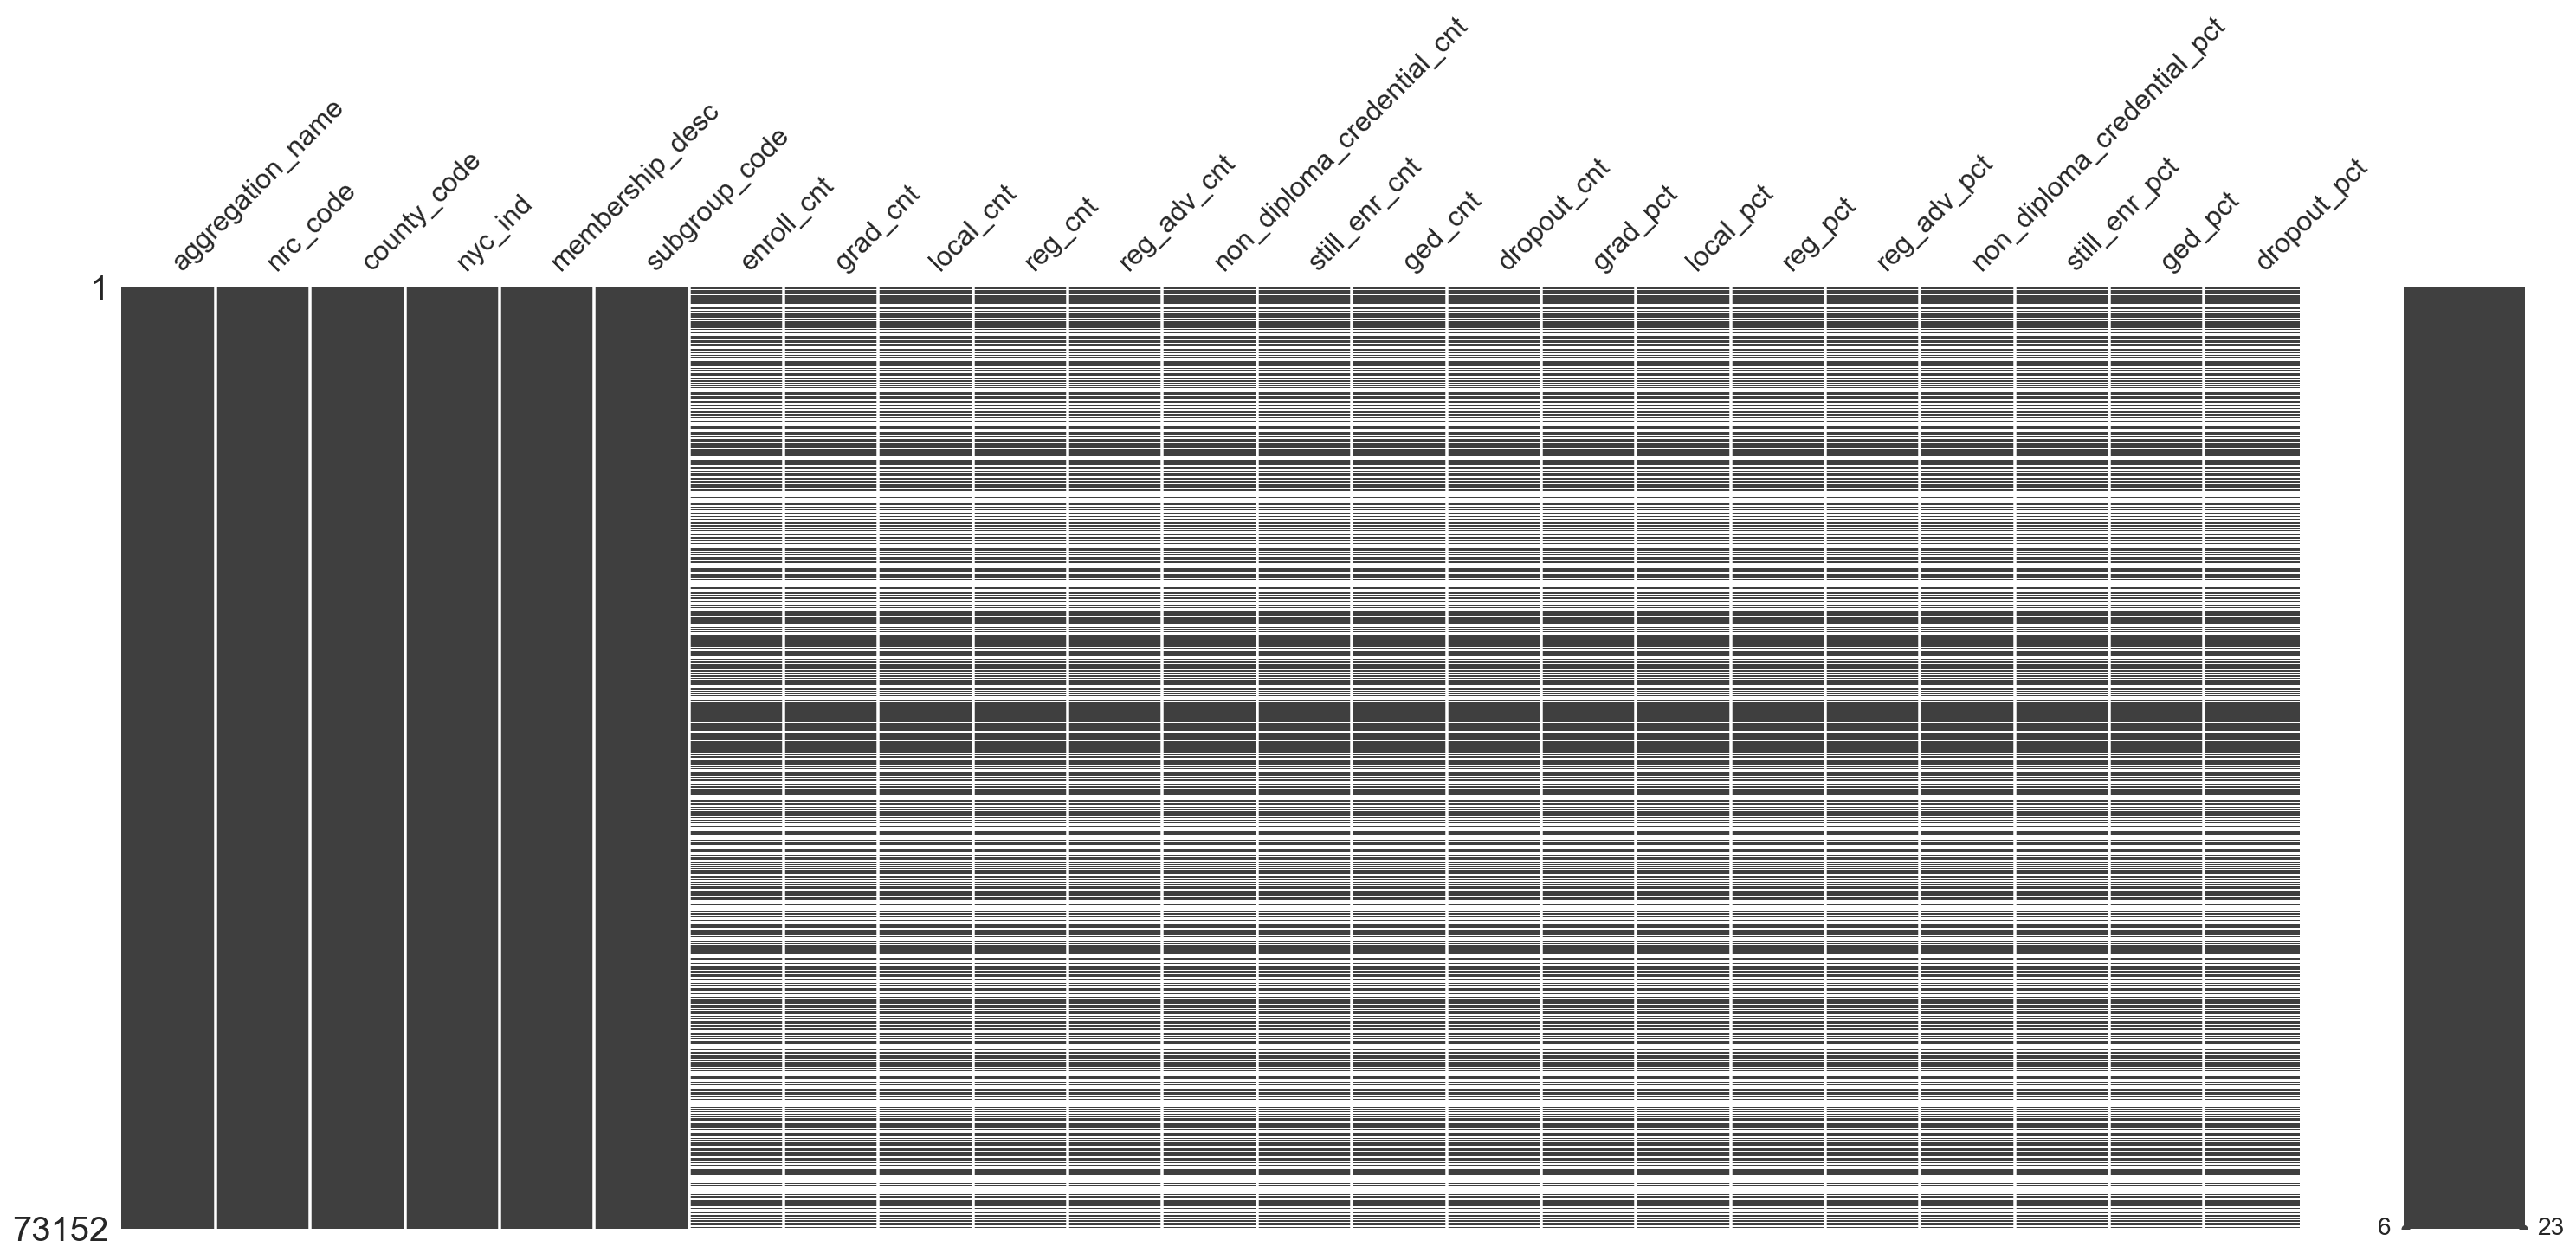

In [54]:
msno.matrix(students_df)

Where data is missing. All count variables and percentage variables are also missing.

### Imputing missing values
- encode all categories
- use KNN to impute missing values

In [60]:
# encode all categories
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


for c in new_cat_cols:
    students_df[c] = le.fit_transform(students_df[c])
students_df

aggregation_name  nrc_code  county_code  nyc_ind  membership_desc  \
0                     4         2            0        0                0   
1                     4         2            0        0                0   
2                     4         2            0        0                0   
3                     4         2            0        0                0   
4                     4         2            0        0                0   
...                 ...       ...          ...      ...              ...   
73147               150         3           61        0                1   
73148               150         3           61        0                1   
73149               150         3           61        0                1   
73150               150         3           61        0                1   
73151               150         3           61        0                1   

       subgroup_code  enroll_cnt  grad_cnt  local_cnt  reg_cnt  reg_adv_cnt  \
0                  0         658       464         63      310           91   
1                  1         324       246         30      169           47   
2                  2         334       218         33      141           44   
3                  3        <NA>      <NA>       <NA>     <NA>         <NA>   
4                  4         367       248         42      183           23   
...              ...         ...       ...        ...      ...          ...   
73147             17        <NA>      <NA>       <NA>     <NA>         <NA>   
73148             18        <NA>      <NA>       <NA>     <NA>         <NA>   
73149             19        <NA>      <NA>       <NA>     <NA>         <NA>   
73150             21        <NA>      <NA>       <NA>     <NA>         <NA>   
73151             23        <NA>      <NA>       <NA>     <NA>         <NA>   

       non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt  \
0                              16             30        0          148   
1                               2             11        0           65   
2                              14             19        0           83   
3                            <NA>           <NA>     <NA>         <NA>   
4                              10             18        0           91   
...                           ...            ...      ...          ...   
73147                        <NA>           <NA>     <NA>         <NA>   
73148                        <NA>           <NA>     <NA>         <NA>   
73149                        <NA>           <NA>     <NA>         <NA>   
73150                        <NA>           <NA>     <NA>         <NA>   
73151                        <NA>           <NA>     <NA>         <NA>   

       grad_pct  local_pct  reg_pct  reg_adv_pct  non_diploma_credential_pct  \
0          71.0       10.0      NaN         14.0                         2.0   
1          76.0        9.0      NaN         15.0                         1.0   
2          65.0       10.0      NaN         13.0                         4.0   
3           NaN        NaN      NaN          NaN                         NaN   
4          68.0       11.0     50.0          6.0                         3.0   
...         ...        ...      ...          ...                         ...   
73147       NaN        NaN      NaN          NaN                         NaN   
73148       NaN        NaN      NaN          NaN                         NaN   
73149       NaN        NaN      NaN          NaN                         NaN   
73150       NaN        NaN      NaN          NaN                         NaN   
73151       NaN        NaN      NaN          NaN                         NaN   

       still_enr_pct  ged_pct  dropout_pct  
0                5.0      0.0         22.0  
1                3.0      0.0         20.0  
2                6.0      0.0         25.0  
3                NaN      NaN          NaN  
4                5.0      0.0         25.0  
...              ...     

In [65]:
last_stu = students_df[-100:]
last_stu

aggregation_name  nrc_code  county_code  nyc_ind  membership_desc  \
73052               480         3           61        0                1   
73053               480         3           61        0                1   
73054               480         3           61        0                1   
73055               480         3           61        0                1   
73056               480         3           61        0                1   
...                 ...       ...          ...      ...              ...   
73147               150         3           61        0                1   
73148               150         3           61        0                1   
73149               150         3           61        0                1   
73150               150         3           61        0                1   
73151               150         3           61        0                1   

       subgroup_code  enroll_cnt  grad_cnt  local_cnt  reg_cnt  reg_adv_cnt  \
73052             16        <NA>      <NA>       <NA>     <NA>         <NA>   
73053             17        <NA>      <NA>       <NA>     <NA>         <NA>   
73054             18           8         3          0        3            0   
73055             19         144       126          4       67           55   
73056             21        <NA>      <NA>       <NA>     <NA>         <NA>   
...              ...         ...       ...        ...      ...          ...   
73147             17        <NA>      <NA>       <NA>     <NA>         <NA>   
73148             18        <NA>      <NA>       <NA>     <NA>         <NA>   
73149             19        <NA>      <NA>       <NA>     <NA>         <NA>   
73150             21        <NA>      <NA>       <NA>     <NA>         <NA>   
73151             23        <NA>      <NA>       <NA>     <NA>         <NA>   

       non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt  \
73052                        <NA>           <NA>     <NA>         <NA>   
73053                        <NA>           <NA>     <NA>         <NA>   
73054                           0              0        0            5   
73055                           1              0        0           17   
73056                        <NA>           <NA>     <NA>         <NA>   
...                           ...            ...      ...          ...   
73147                        <NA>           <NA>     <NA>         <NA>   
73148                        <NA>           <NA>     <NA>         <NA>   
73149                        <NA>           <NA>     <NA>         <NA>   
73150                        <NA>           <NA>     <NA>         <NA>   
73151                        <NA>           <NA>     <NA>         <NA>   

       grad_pct  local_pct  reg_pct  reg_adv_pct  non_diploma_credential_pct  \
73052       NaN        NaN      NaN          NaN                         NaN   
73053       NaN        NaN      NaN          NaN                         NaN   
73054      38.0        0.0     38.0          0.0                         0.0   
73055      88.0        3.0     47.0         38.0                         1.0   
73056       NaN        NaN      NaN          NaN                         NaN   
...         ...        ...      ...          ...                         ...   
73147       NaN        NaN      NaN          NaN                         NaN   
73148       NaN        NaN      NaN          NaN                         NaN   
73149       NaN        NaN      NaN          NaN                         NaN   
73150       NaN        NaN      NaN          NaN                         NaN   
73151       NaN        NaN      NaN          NaN                         NaN   

       still_enr_pct  ged_pct  dropout_pct  
73052            NaN      NaN          NaN  
73053            NaN      NaN          NaN  
73054            0.0      0.0         63.0  
73055            0.0      0.0         12.0  
73056            NaN      NaN          NaN  
...              ...     

In [75]:
# use KNN to impute all missing values
from sklearn.impute import KNNImputer
#last_stu = students_df[-100:]
imputer = KNNImputer(n_neighbors=5)

students_df_im = pd.DataFrame(imputer.fit_transform(students_df),columns = last_stu.columns)
students_df_im

aggregation_name  nrc_code  county_code  nyc_ind  membership_desc  \
0                   4.0       2.0          0.0      0.0              0.0   
1                   4.0       2.0          0.0      0.0              0.0   
2                   4.0       2.0          0.0      0.0              0.0   
3                   4.0       2.0          0.0      0.0              0.0   
4                   4.0       2.0          0.0      0.0              0.0   
...                 ...       ...          ...      ...              ...   
73147             150.0       3.0         61.0      0.0              1.0   
73148             150.0       3.0         61.0      0.0              1.0   
73149             150.0       3.0         61.0      0.0              1.0   
73150             150.0       3.0         61.0      0.0              1.0   
73151             150.0       3.0         61.0      0.0              1.0   

       subgroup_code  enroll_cnt  grad_cnt  local_cnt  reg_cnt  reg_adv_cnt  \
0                0.0       658.0     464.0       63.0    310.0         91.0   
1                1.0       324.0     246.0       30.0    169.0         47.0   
2                2.0       334.0     218.0       33.0    141.0         44.0   
3                3.0       345.2     236.0       36.0    163.8         36.2   
4                4.0       367.0     248.0       42.0    183.0         23.0   
...              ...         ...       ...        ...      ...          ...   
73147           17.0        24.6      19.8        2.4     13.2          4.2   
73148           18.0        24.6      19.8        2.4     13.2          4.2   
73149           19.0        24.6      19.8        2.4     13.2          4.2   
73150           21.0        24.6      21.6        3.0     14.4          4.2   
73151           23.0        45.4      36.8        3.8     20.8         12.2   

       non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt  \
0                            16.0           30.0      0.0        148.0   
1                             2.0           11.0      0.0         65.0   
2                            14.0           19.0      0.0         83.0   
3                            10.0           16.6      0.0         82.6   
4                            10.0           18.0      0.0         91.0   
...                           ...            ...      ...          ...   
73147                         0.6            0.8      0.0          3.4   
73148                         0.6            0.8      0.0          3.4   
73149                         0.6            0.8      0.0          3.4   
73150                         0.0            1.0      0.0          2.0   
73151                         0.6            1.2      1.0          5.6   

       grad_pct  local_pct  reg_pct  reg_adv_pct  non_diploma_credential_pct  \
0          71.0       10.0     47.2         14.0                         2.0   
1          76.0        9.0     52.2         15.0                         1.0   
2          65.0       10.0     42.0         13.0                         4.0   
3          68.4       10.2     47.2         10.6                         3.0   
4          68.0       11.0     50.0          6.0                         3.0   
...         ...        ...      ...          ...                         ...   
73147      83.2       11.6     53.4         18.6                         1.8   
73148      83.2       11.6     53.4         18.6                         1.8   
73149      83.2       11.6     53.4         18.6                         1.8   
73150      88.6       13.4     57.0         18.6                         0.0   
73151      85.0       12.6     49.6         23.0                         0.4   

       still_enr_pct  ged_pct  dropout_pct  
0                5.0      0.0         22.0  
1                3.0      0.0         20.0  
2                6.0      0.0         25.0  
3                4.8      0.0         24.0  
4                5.0      0.0         25.0  
...              ...     

In [76]:
students_df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aggregation_name            73152 non-null  float64
 1   nrc_code                    73152 non-null  float64
 2   county_code                 73152 non-null  float64
 3   nyc_ind                     73152 non-null  float64
 4   membership_desc             73152 non-null  float64
 5   subgroup_code               73152 non-null  float64
 6   enroll_cnt                  73152 non-null  float64
 7   grad_cnt                    73152 non-null  float64
 8   local_cnt                   73152 non-null  float64
 9   reg_cnt                     73152 non-null  float64
 10  reg_adv_cnt                 73152 non-null  float64
 11  non_diploma_credential_cnt  73152 non-null  float64
 12  still_enr_cnt               73152 non-null  float64
 13  ged_cnt                     731

In [77]:
# imputed df description
students_df_im[cnt_cols + pct_cols].describe()

enroll_cnt      grad_cnt     local_cnt       reg_cnt   reg_adv_cnt  \
count  73152.000000  73152.000000  73152.000000  73152.000000  73152.000000   
mean     169.908790    144.439540     10.471725     75.192101     58.775714   
std      381.066477    312.276298     27.731809    193.776210    115.690549   
min        5.000000      0.000000      0.000000      0.000000      0.000000   
25%       29.800000     25.400000      1.400000     12.800000      7.000000   
50%       67.200000     59.000000      3.600000     28.000000     21.800000   
75%      161.000000    143.000000      8.200000     61.800000     61.000000   
max     9176.000000   7540.000000    557.000000   4752.000000   2231.000000   

       non_diploma_credential_cnt  still_enr_cnt       ged_cnt   dropout_cnt  \
count                73152.000000   73152.000000  73152.000000  73152.000000   
mean                     1.660542       9.202258      1.145997     13.360165   
std                      5.371303      34.799485      4.258077     43.346420   
min                      0.000000       0.000000      0.000000      0.000000   
25%                      0.000000       0.400000      0.000000      1.000000   
50%                      0.600000       1.600000      0.000000      3.000000   
75%                      1.600000       4.800000      0.600000      7.800000   
max                    279.000000    1381.000000     97.000000   1091.000000   

           grad_pct     local_pct       reg_pct   reg_adv_pct  \
count  73152.000000  73152.000000  73152.000000  73152.000000   
mean      84.960408      8.425519     43.141921     33.417621   
std       13.815612      9.191158     15.239515     20.799070   
min        0.000000      0.000000      0.000000      0.000000   
25%       80.000000      3.000000     34.000000     17.800000   
50%       89.000000      6.000000     43.000000     32.600000   
75%       94.400000     11.000000     51.600000     47.600000   
max      100.000000    100.000000    100.000000    100.000000   

       non_diploma_credential_pct  still_enr_pct       ged_pct   dropout_pct  
count                73152.000000   73152.000000  73152.000000  73152.000000  
mean                     1.778647       4.905471      0.603923      7.650752  
std                      3.614212       7.729073      1.830361      8.548854  
min                      0.000000       0.000000      0.000000      0.000000  
25%                      0.000000       0.400000      0.000000      2.000000  
50%                      0.400000       2.400000      0.000000      5.000000  
75%                      2.000000       6.000000      0.400000     10.800000  
max                     67.000000     100.000000     67.000000    100.000000

In [78]:
# orinigal df description
students_df[cnt_cols + pct_cols].describe()

enroll_cnt      grad_cnt     local_cnt       reg_cnt   reg_adv_cnt  \
count  39674.000000  39674.000000  39674.000000  39674.000000  39674.000000   
mean     192.120079    161.178354     12.340903     86.804708     62.032742   
std      439.972474    361.294773     32.046302    225.795826    132.777866   
min        5.000000      0.000000      0.000000      0.000000      0.000000   
25%       25.000000     20.000000      1.000000     10.000000      4.000000   
50%       66.000000     57.000000      4.000000     27.000000     18.000000   
75%      179.000000    156.000000     10.000000     69.000000     62.000000   
max     9176.000000   7540.000000    557.000000   4752.000000   2231.000000   

       non_diploma_credential_cnt  still_enr_cnt       ged_cnt   dropout_cnt  \
count                39674.000000   39674.000000  39674.000000  39674.000000   
mean                     1.924485      11.299516      1.377577     16.239225   
std                      6.498913      40.766672      4.949389     50.129834   
min                      0.000000       0.000000      0.000000      0.000000   
25%                      0.000000       0.000000      0.000000      1.000000   
50%                      0.000000       2.000000      0.000000      3.000000   
75%                      2.000000       5.000000      1.000000      9.000000   
max                    279.000000    1381.000000     97.000000   1091.000000   

           grad_pct     local_pct       reg_pct   reg_adv_pct  \
count  39674.000000  39674.000000  39671.000000  39674.000000   
mean      84.406614      8.479936     43.370850     32.577204   
std       15.679500     10.398486     17.125473     23.001197   
min        0.000000      0.000000      0.000000      0.000000   
25%       79.000000      2.000000     33.000000     14.000000   
50%       89.000000      6.000000     43.000000     31.000000   
75%       95.000000     11.000000     53.000000     49.000000   
max      100.000000    100.000000    100.000000    100.000000   

       non_diploma_credential_pct  still_enr_pct       ged_pct   dropout_pct  
count                39674.000000   39674.000000  39674.000000  39674.000000  
mean                     1.742627       5.190704      0.612693      7.963049  
std                      4.063987       8.832710      1.985445      9.658698  
min                      0.000000       0.000000      0.000000      0.000000  
25%                      0.000000       0.000000      0.000000      1.000000  
50%                      0.000000       2.000000      0.000000      5.000000  
75%                      2.000000       6.000000      0.000000     11.000000  
max                     67.000000     100.000000     67.000000    100.000000

All count variables have increased in the mean and std obviously. All percentages have increased slightly. These changes are acceptable because we imputed over 45% data.

In [161]:
# accept the imputed data set
prepared_student_df = students_df_im.copy()

### Create the new respone

A: “low”: indicates that the percentage of regents diplomas awarded for a given school district /student subgrouping is less than ½ of the median percentage of all regent diplomas awarded (i.e.,across all school district / student subgroupings);

B: “medium”: indicates that the percentage of regents diplomas awarded for a given school district /student subgrouping is between 0.5 * the median percentage of all regent diplomas awarded (i.e.,across all school district / student subgroupings) and 1.5 * the median percentage of all regent diplomas awarded (i.e., across all school district / student subgroupings), i.e., (0.5 * median percentage) < percentage of regents diplomas awarded for a given school district <= (1.5 * median percentage)

C: “high”: indicates that the percentage of regents diplomas awarded for a given school district / student subgrouping exceeds 1.5 * the median percentage of all regent diplomas awarded (i.e., across all school district / student subgroupings)

In [162]:
# get the median of reg_pct
all_reg_pct_median = prepared_student_df['reg_pct'].median()
all_reg_pct_median

43.0

In [163]:
def convert_3_levels(c):
    result = 'low'
    if pd.isnull(c):
        result = 'Error'
    elif c < all_reg_pct_median * 0.5:
        result = 'low'
    elif c >= all_reg_pct_median * 0.5 and c < all_reg_pct_median * 1.5:
        result = 'medium'
    elif c >= all_reg_pct_median * 1.5:
        result = 'high'
    return result

In [164]:
# create the new response
prepared_student_df['reg_pct_level'] = prepared_student_df['reg_pct'].apply(convert_3_levels)

In [165]:
# check
prepared_student_df['reg_pct_level'].value_counts()

medium    63278
low        5131
high       4743
Name: reg_pct_level, dtype: int64

It is an imbalance response.

### Drop reg_pct and reg_cnt

In [166]:
prepared_student_df = prepared_student_df.drop(columns=['reg_pct', 'reg_cnt'])

In [167]:
prepared_student_df.head(3)

aggregation_name  nrc_code  county_code  nyc_ind  membership_desc  \
0               4.0       2.0          0.0      0.0              0.0   
1               4.0       2.0          0.0      0.0              0.0   
2               4.0       2.0          0.0      0.0              0.0   

   subgroup_code  enroll_cnt  grad_cnt  local_cnt  reg_adv_cnt  \
0            0.0       658.0     464.0       63.0         91.0   
1            1.0       324.0     246.0       30.0         47.0   
2            2.0       334.0     218.0       33.0         44.0   

   non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt  grad_pct  \
0                        16.0           30.0      0.0        148.0      71.0   
1                         2.0           11.0      0.0         65.0      76.0   
2                        14.0           19.0      0.0         83.0      65.0   

   local_pct  reg_adv_pct  non_diploma_credential_pct  still_enr_pct  ged_pct  \
0       10.0         14.0                         2.0            5.0      0.0   
1        9.0         15.0                         1.0            3.0      0.0   
2       10.0         13.0                         4.0            6.0      0.0   

   dropout_pct reg_pct_level  
0         22.0        medium  
1         20.0        medium  
2         25.0        medium

### Drop outliers

The Decision Tree and Random Forest can work well with outliers. I will keep these outliers.

### Convert data type

In [168]:
# response column
response_col = ['reg_pct_level']

new_cat_cols = ['aggregation_name', 'nrc_code', 'county_code', 'nyc_ind', 'membership_desc',  'subgroup_code']

# all count columns
cnt_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_adv_cnt', 'non_diploma_credential_cnt', 
       'still_enr_cnt', 'ged_cnt',  'dropout_cnt']

# all percentage columns
pct_cols = ['grad_pct', 'local_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct']

In [169]:
prepared_student_df = prepared_student_df[response_col + new_cat_cols + cnt_cols + pct_cols]

In [170]:
# convert to category
for col in new_cat_cols:
    prepared_student_df[col] = prepared_student_df[col].astype("category")

In [171]:
# response variable should be category
prepared_student_df[response_col] = prepared_student_df[response_col].astype("category")

In [172]:
# convert to int
for col in cnt_cols:
    prepared_student_df[col] = prepared_student_df[col].astype("int")

In [173]:
prepared_student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   reg_pct_level               73152 non-null  category
 1   aggregation_name            73152 non-null  category
 2   nrc_code                    73152 non-null  category
 3   county_code                 73152 non-null  category
 4   nyc_ind                     73152 non-null  category
 5   membership_desc             73152 non-null  category
 6   subgroup_code               73152 non-null  category
 7   enroll_cnt                  73152 non-null  int32   
 8   grad_cnt                    73152 non-null  int32   
 9   local_cnt                   73152 non-null  int32   
 10  reg_adv_cnt                 73152 non-null  int32   
 11  non_diploma_credential_cnt  73152 non-null  int32   
 12  still_enr_cnt               73152 non-null  int32   
 13  ged_cnt         

# 5. Prepped Data Review (Re-run Exploratory Data Analysis)

In [174]:
prepared_student_df[response_col].value_counts()

reg_pct_level
medium           63278
low               5131
high              4743
dtype: int64

It is a imbalance response. The response variable is What level of percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma.

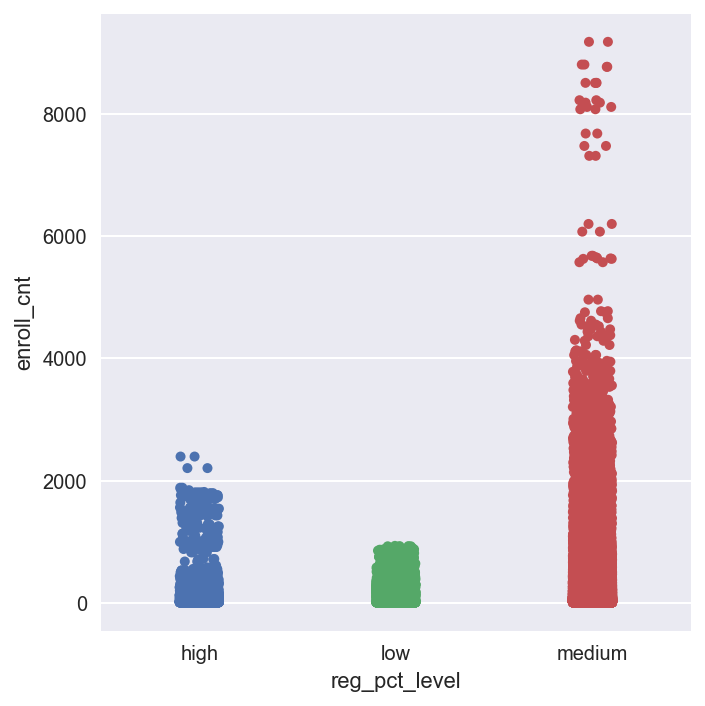

In [175]:
# view the relation between reg_pct_level and enroll_cnt
sns.catplot(x="reg_pct_level", y="enroll_cnt", data=prepared_student_df)

The low level of reg_pct_level account for less enroll count.

In [188]:
def cate_vs_response_bars(ori_df, col1, col2):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(10, 6)
    axes[0].set_title("%s vs Response " %col1)
    sns.stripplot(x="reg_pct_level", y=col1, data=ori_df, ax=axes[0])
    
    axes[1].set_title("%s vs Response " %col2)
    #sns.stripplot(x="reg_pct_level", y=col2, data=ori_df, ax=axes[1])
    sns.violinplot(x="reg_pct_level", y=col2, data=ori_df, ax=axes[1])

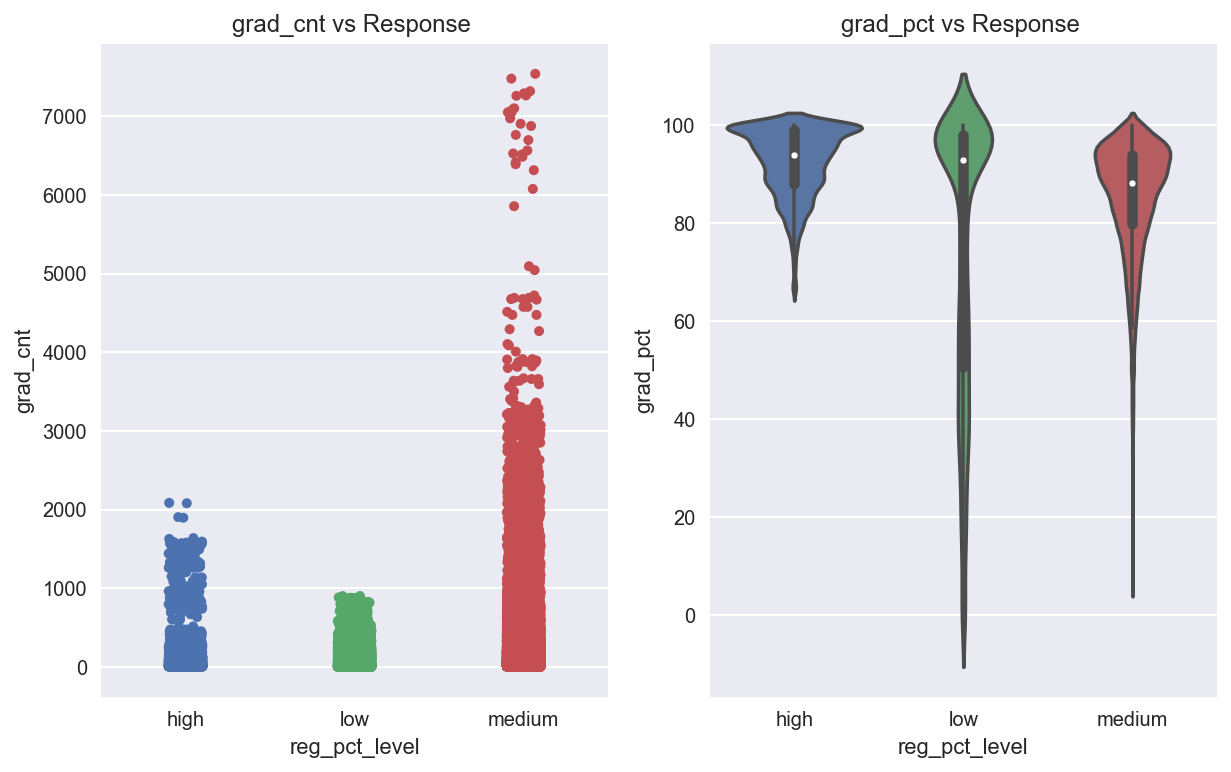

In [189]:
cate_vs_response_bars(prepared_student_df, "grad_cnt", "grad_pct")

The grad_pct violin plot shows the grad_pct has a clear distinction between the three levels of reg_pct_level. The grad_pct can be used to predict outcomes.

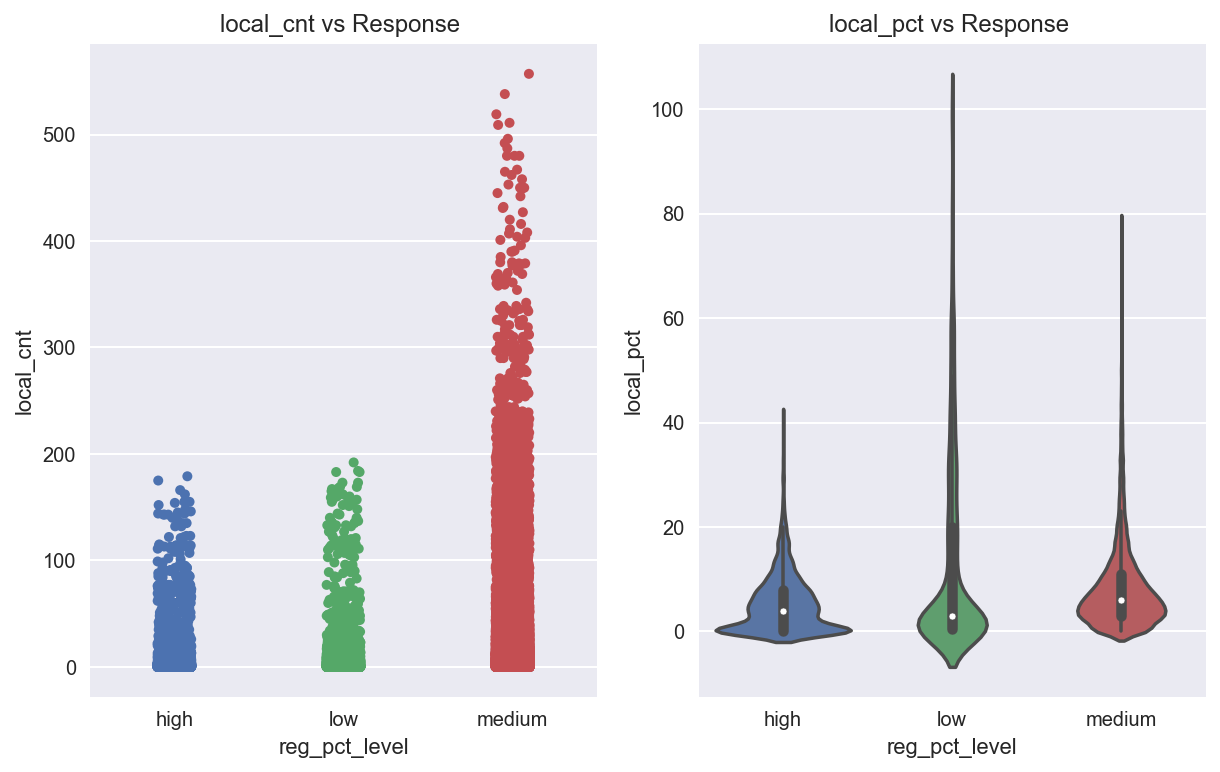

In [180]:
cate_vs_response_bars(prepared_student_df, "local_cnt", "local_pct")

Students have "Local" diploma.

The local_pct violin plot shows it has not a clear distinction between the three levels of reg_pct_level. The grad_pct can not be used to predict outcomes.

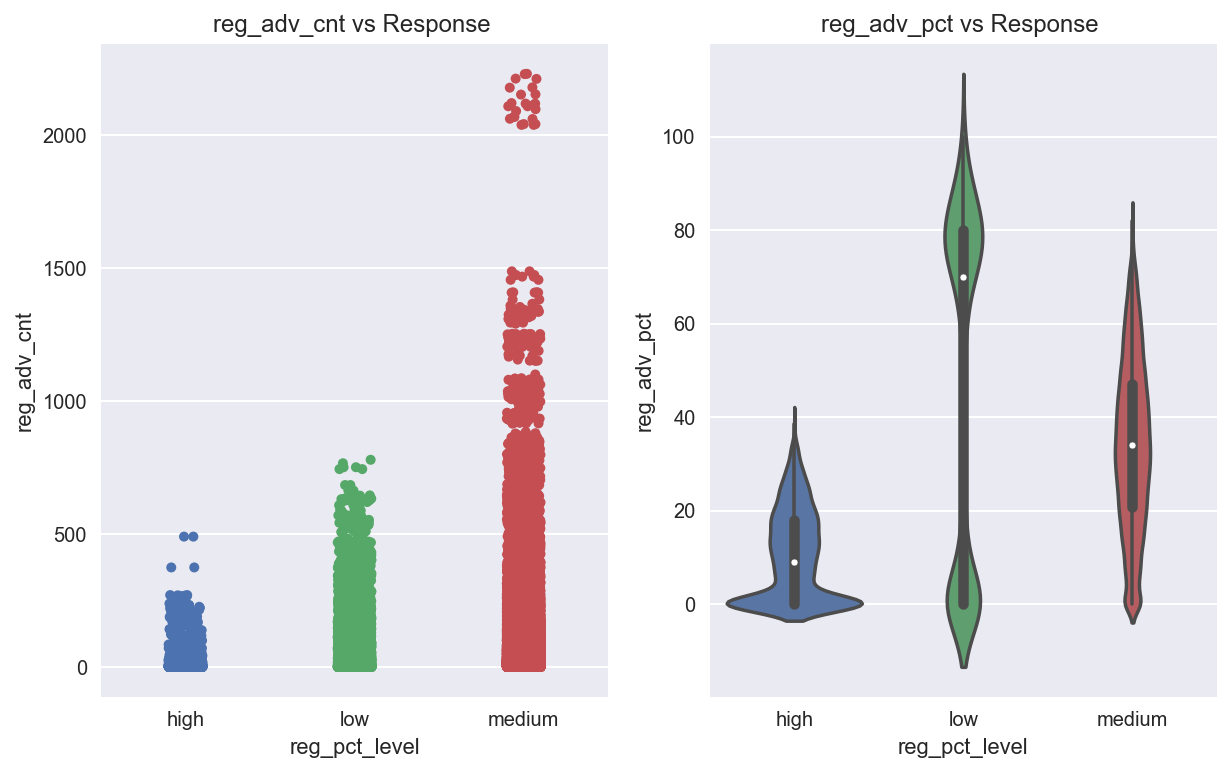

In [181]:
cate_vs_response_bars(prepared_student_df, "reg_adv_cnt", "reg_adv_pct")

Students have "Regents Advanced" diploma

The reg_adv_pct violin plot shows it has a clear distinction between the three levels of reg_pct_level. The reg_adv_pct can be used to predict outcomes.

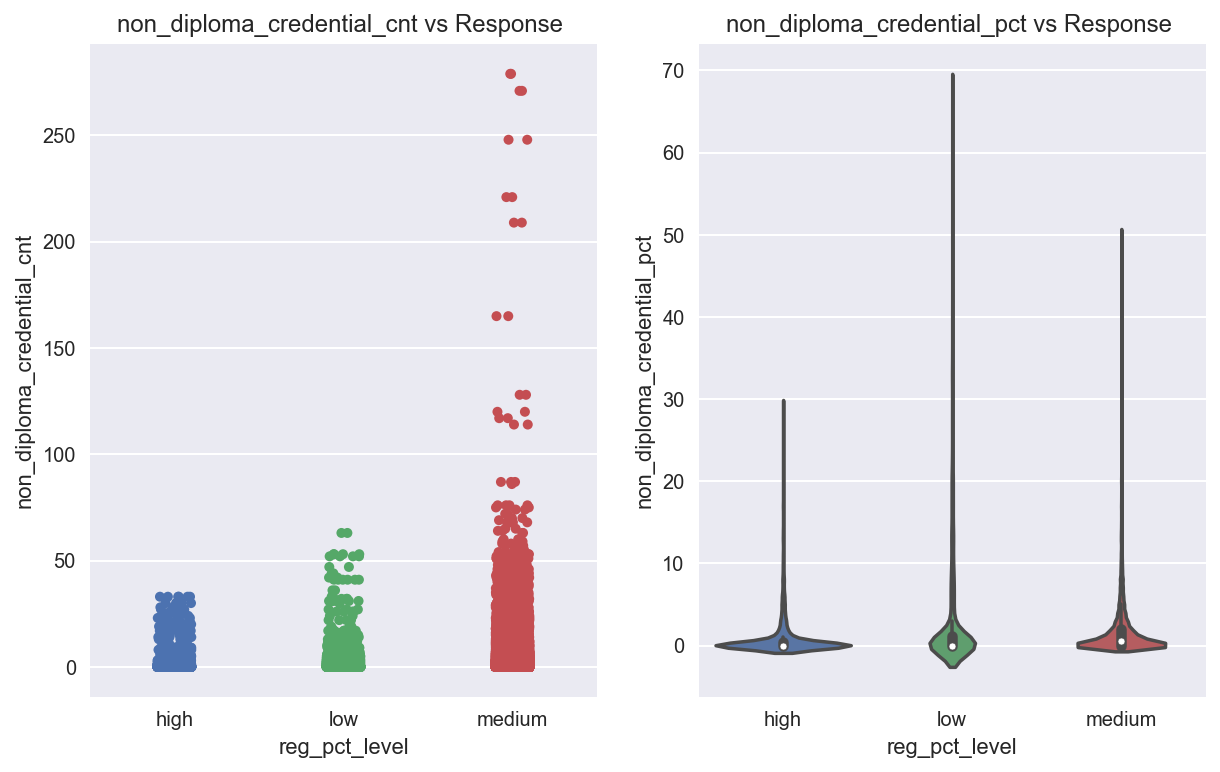

In [182]:
cate_vs_response_bars(prepared_student_df, "non_diploma_credential_cnt", "non_diploma_credential_pct")

Stuends have nondiploma credential

The non_diploma_credential_pct violin plot shows it has not a clear distinction between the three levels of reg_pct_level. The non_diploma_credential_pct can not be used to predict outcomes.

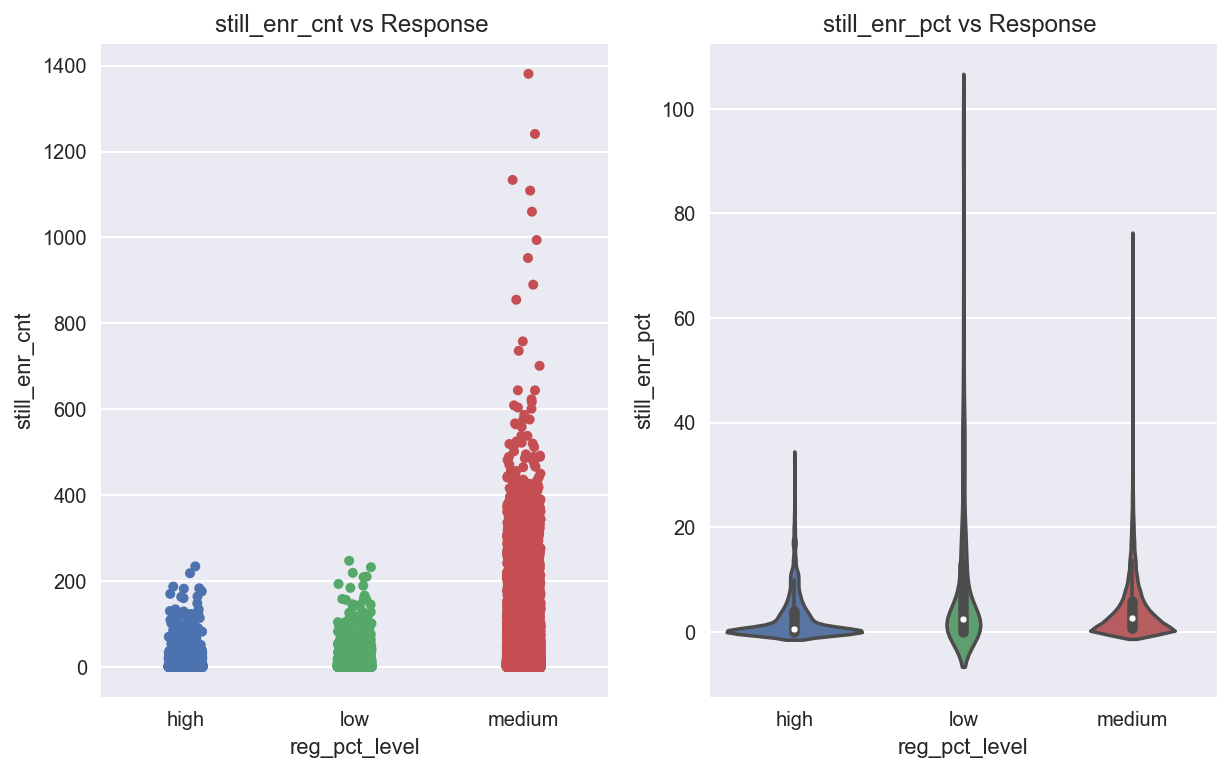

In [183]:
cate_vs_response_bars(prepared_student_df, "still_enr_cnt", "still_enr_pct")

Stuends did not graduate but were still_enrolled

The still_enr_pct violin plot shows it has not a clear distinction between the three levels of reg_pct_level. The still_enr_pct can not be used to predict outcomes.

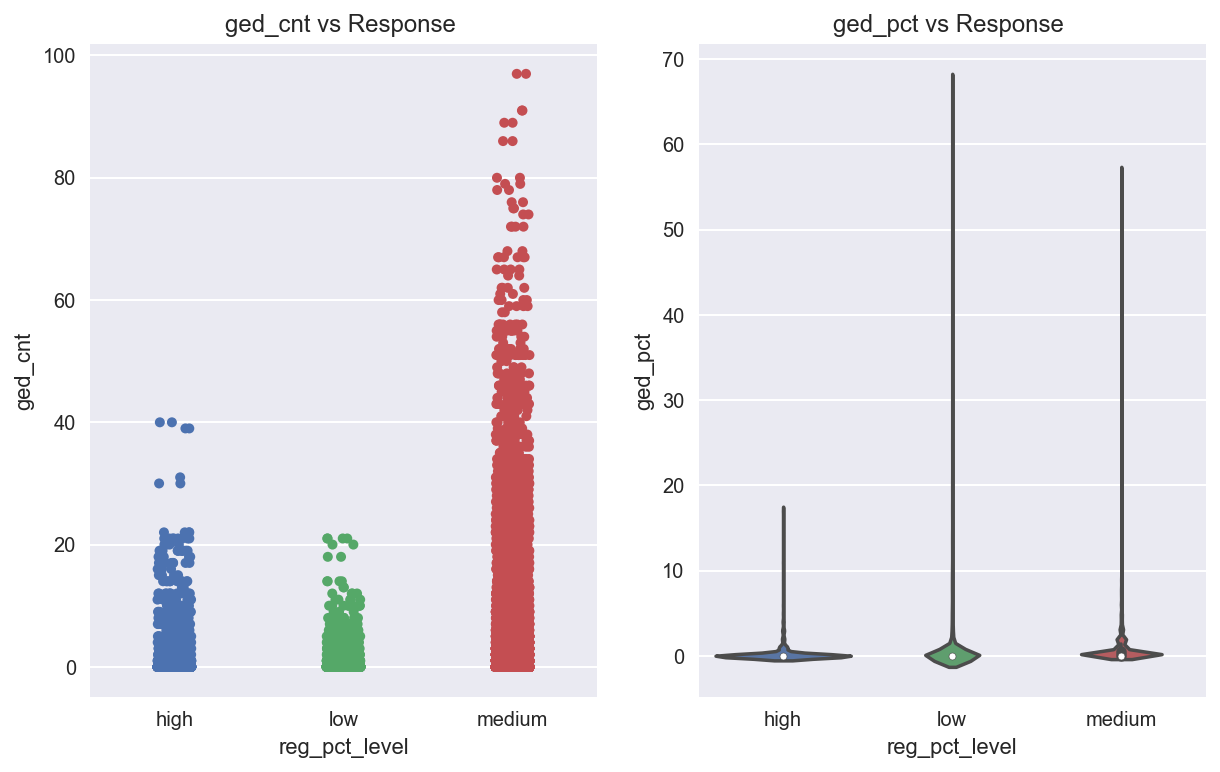

In [184]:
cate_vs_response_bars(prepared_student_df, "ged_cnt", "ged_pct")

Stuends were awarded a "GED" diploma

The ged_pct violin plot shows it has not a clear distinction between the three levels of reg_pct_level. The still_enr_pct can not be used to predict outcomes.

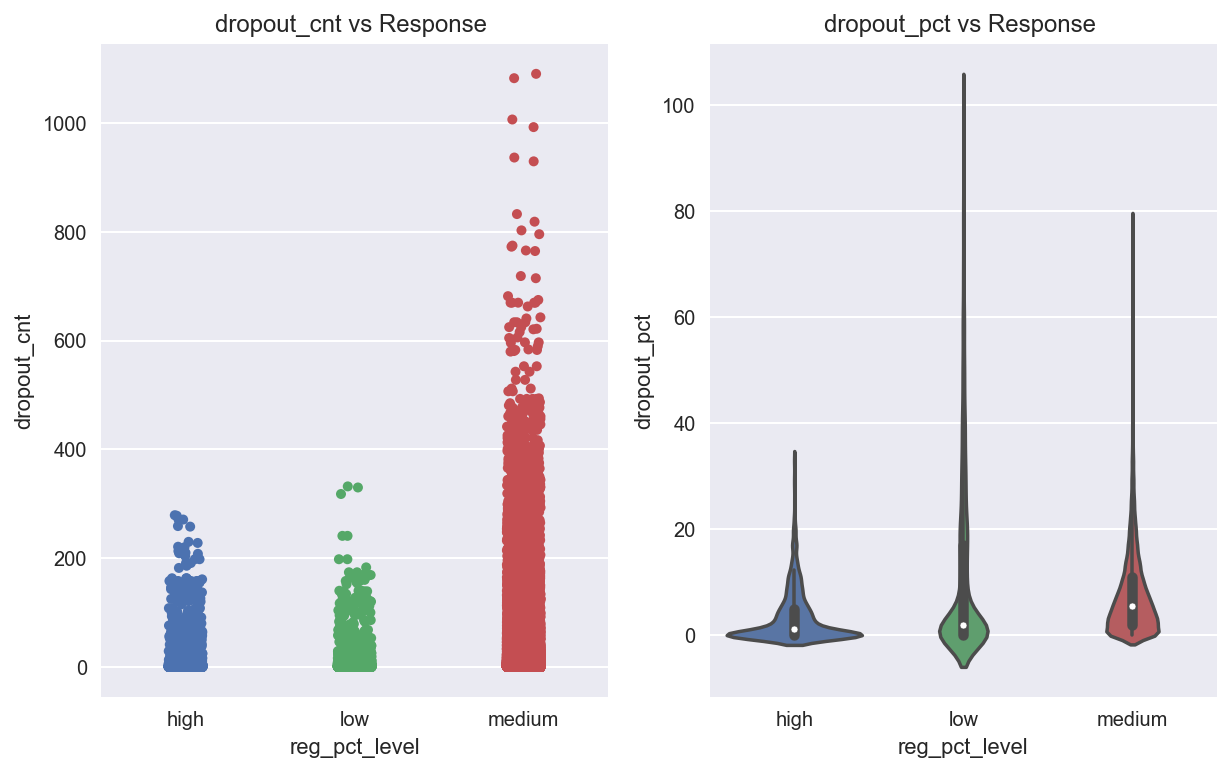

In [185]:
cate_vs_response_bars(prepared_student_df, "dropout_cnt", "dropout_pct")

Stuends discontinued their high school enrollment during the school year

The dropout_pct violin plot shows it has a slight distinction between the three levels of reg_pct_level. The dropout_pct can be used to predict outcomes.

#### Using histogram and box plot to view the count variables

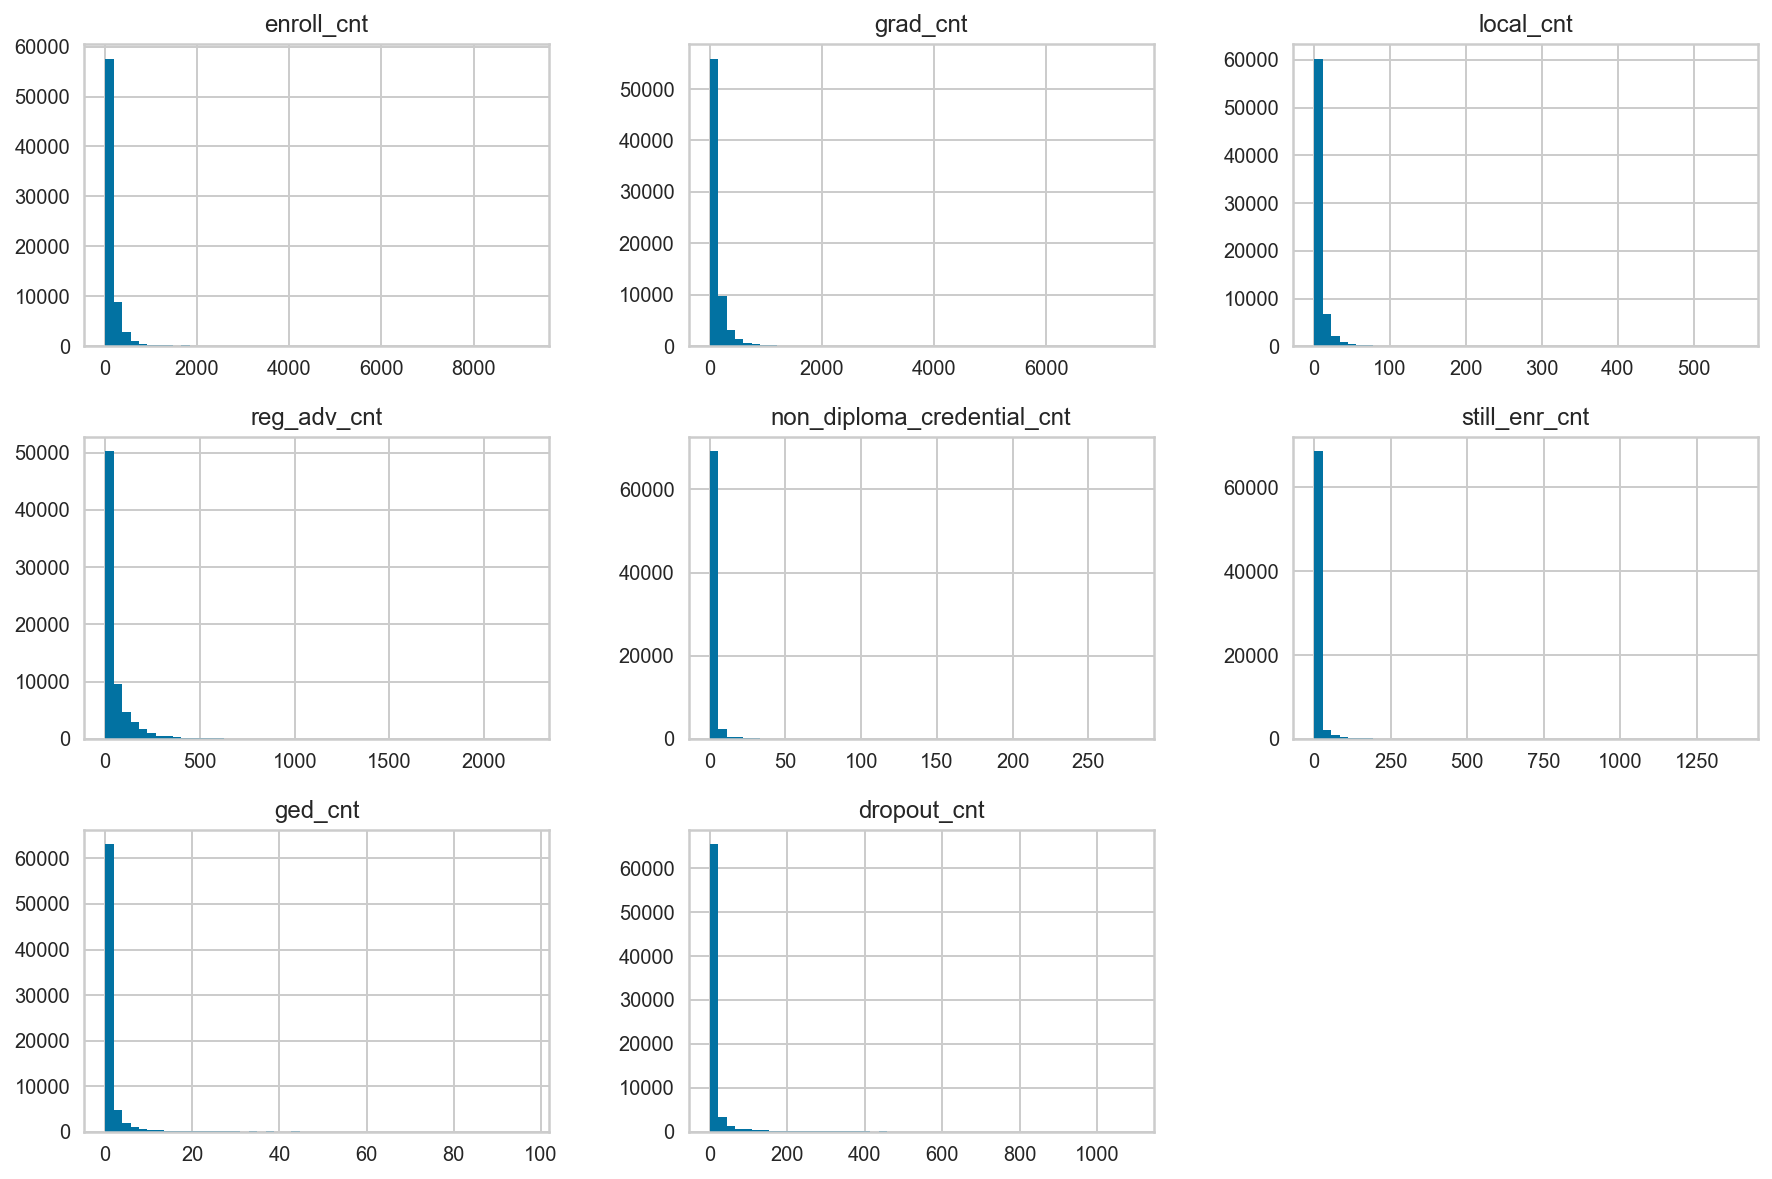

In [280]:
# draw the histogram for count variables
prepared_student_df[cnt_cols].hist(bins=50, figsize=(15,10))
plt.show()

All count variables are near 0. I can not see obvious distinction.

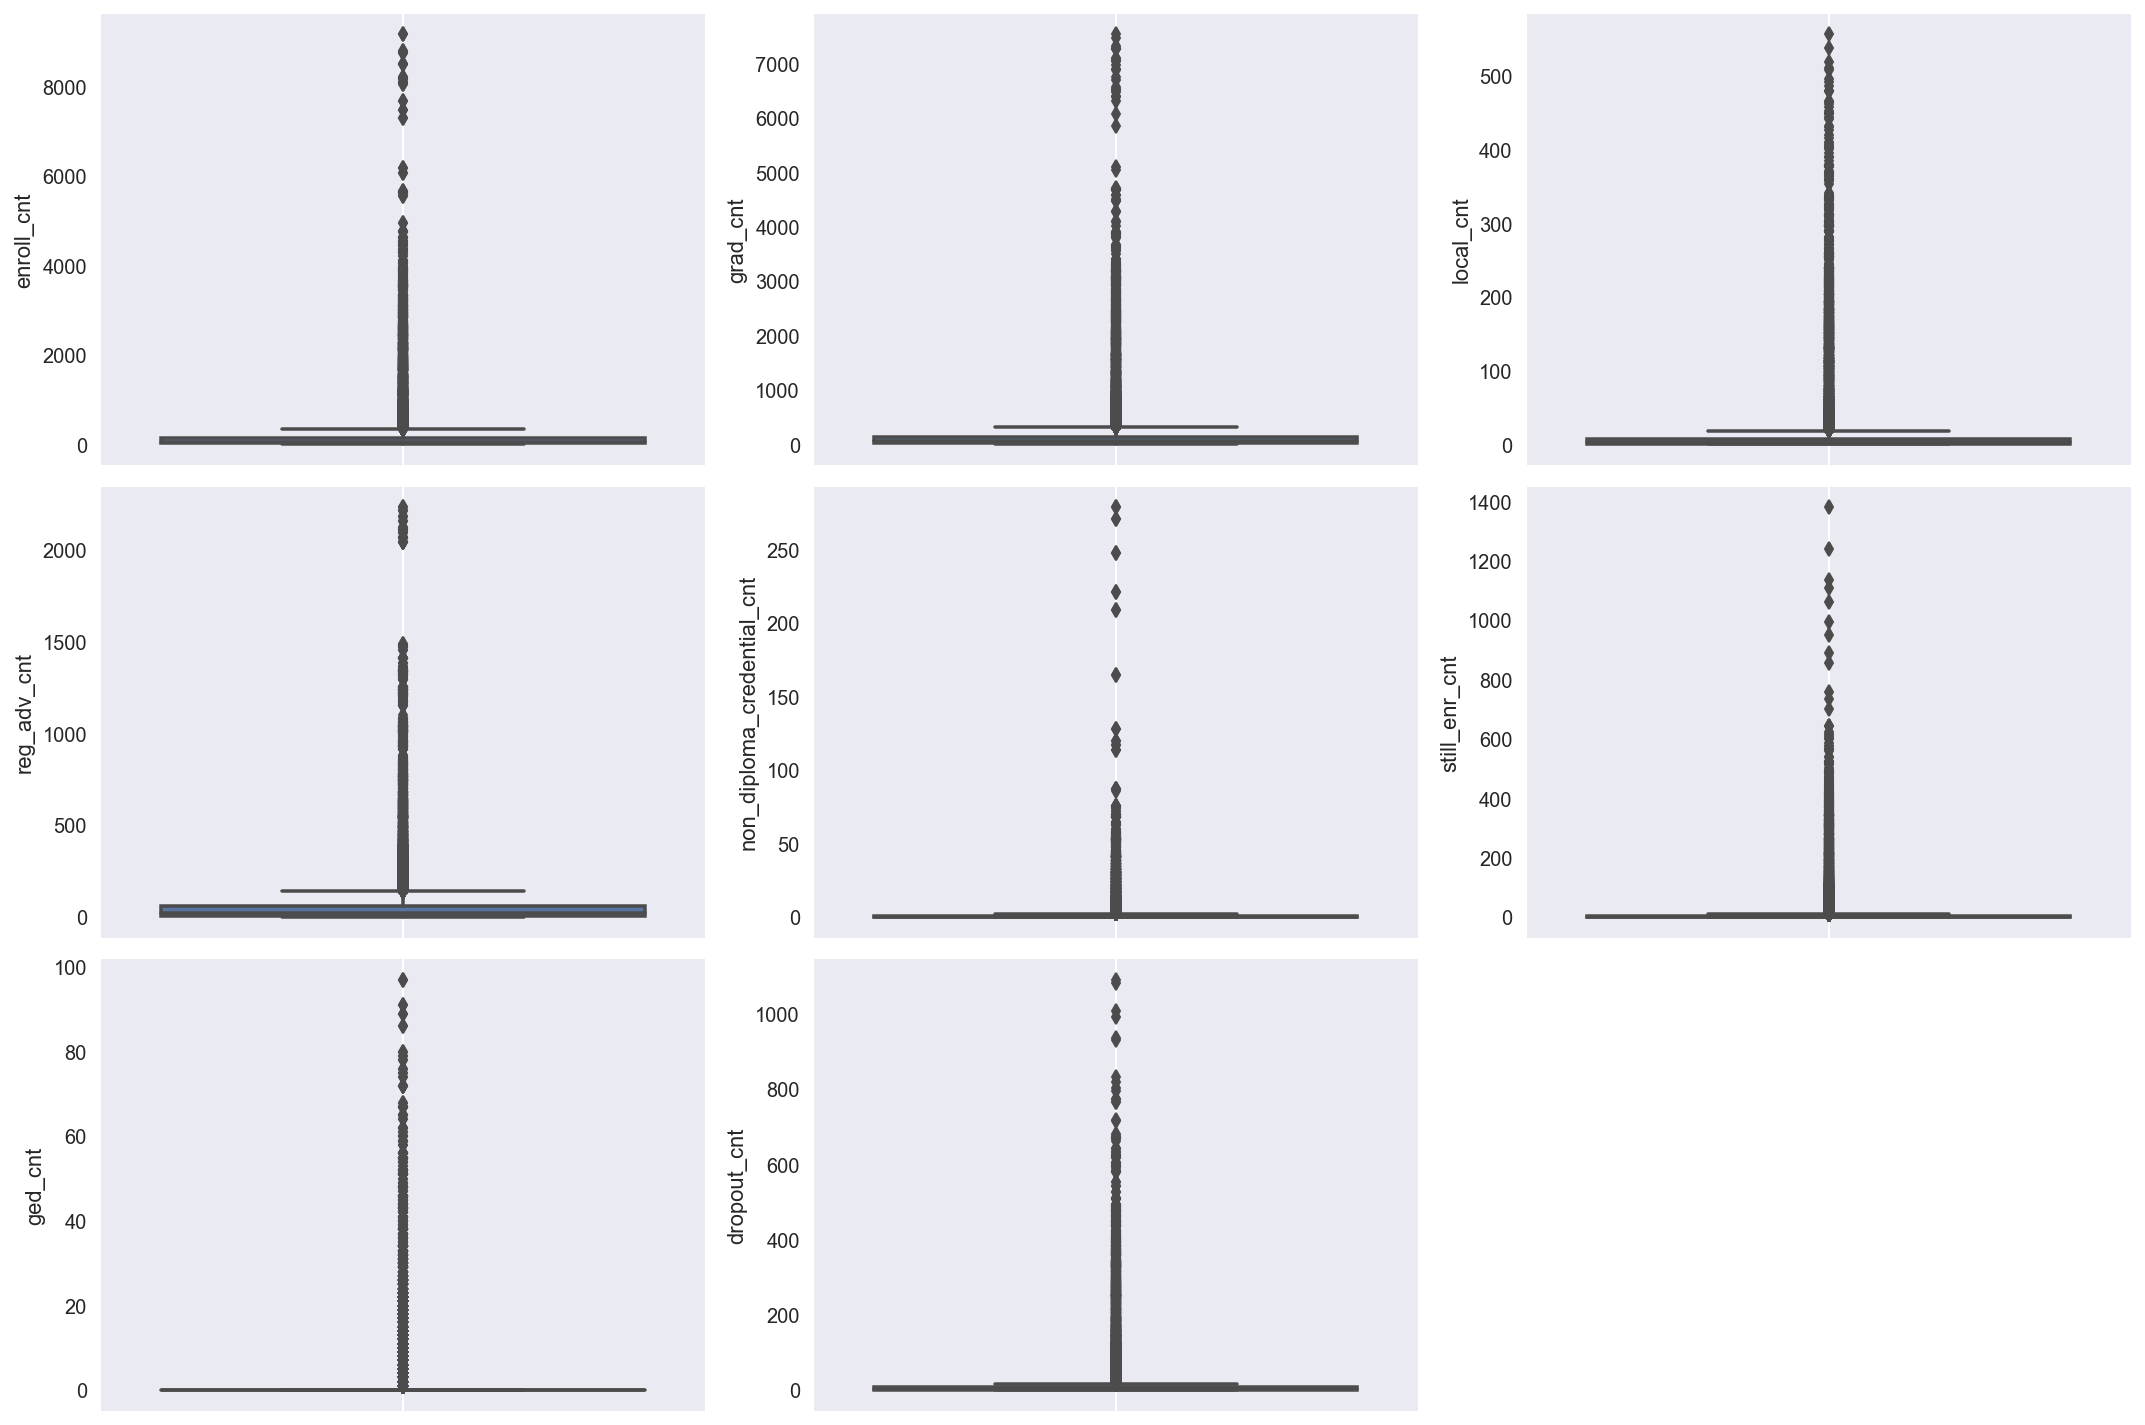

In [104]:
# Draw the box plots for count variables
plt.figure(figsize = (15, 10))
for i, col in enumerate(cnt_cols):
    plt.subplot(3,3, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=prepared_student_df,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

#### Using histogram and box plot to view the percentage variables

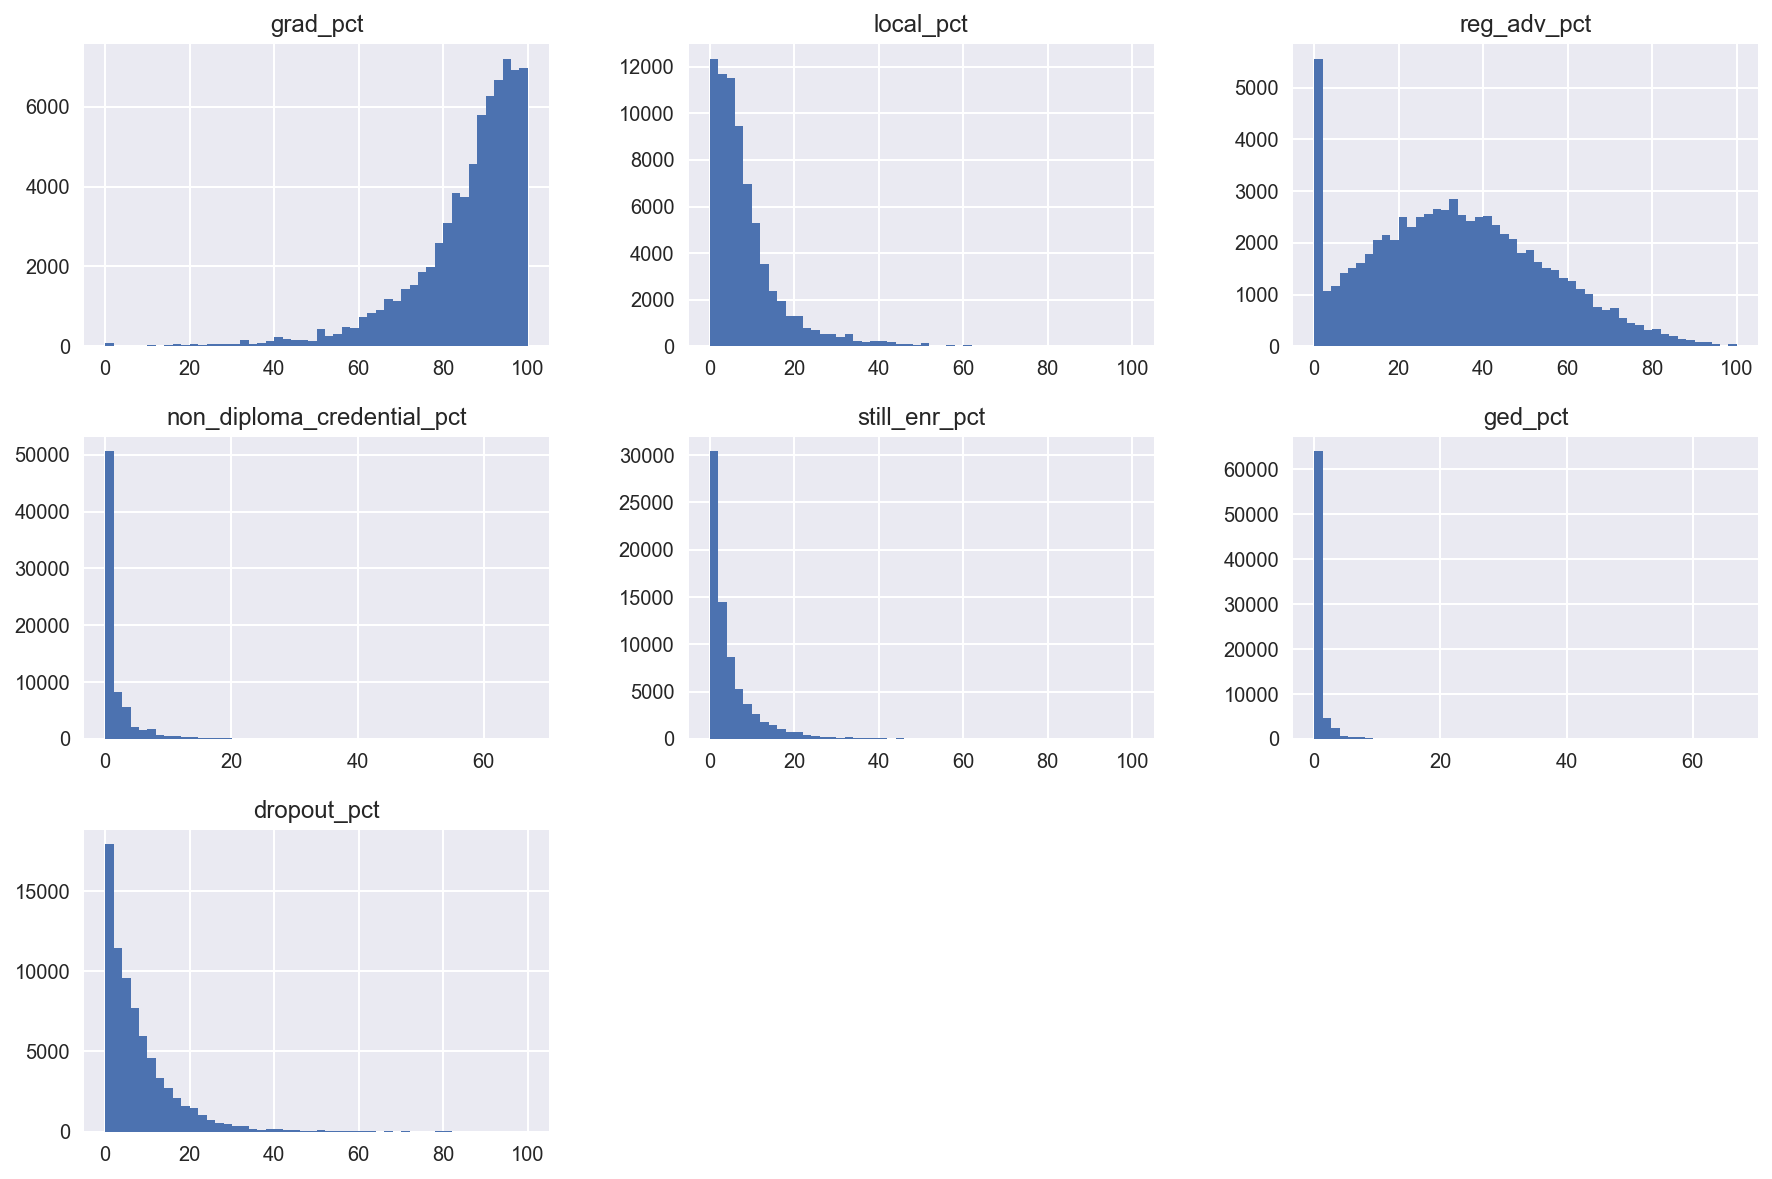

In [105]:
# draw the histogram for percentage variables
prepared_student_df[pct_cols].hist(bins=50, figsize=(15,10))
plt.show()

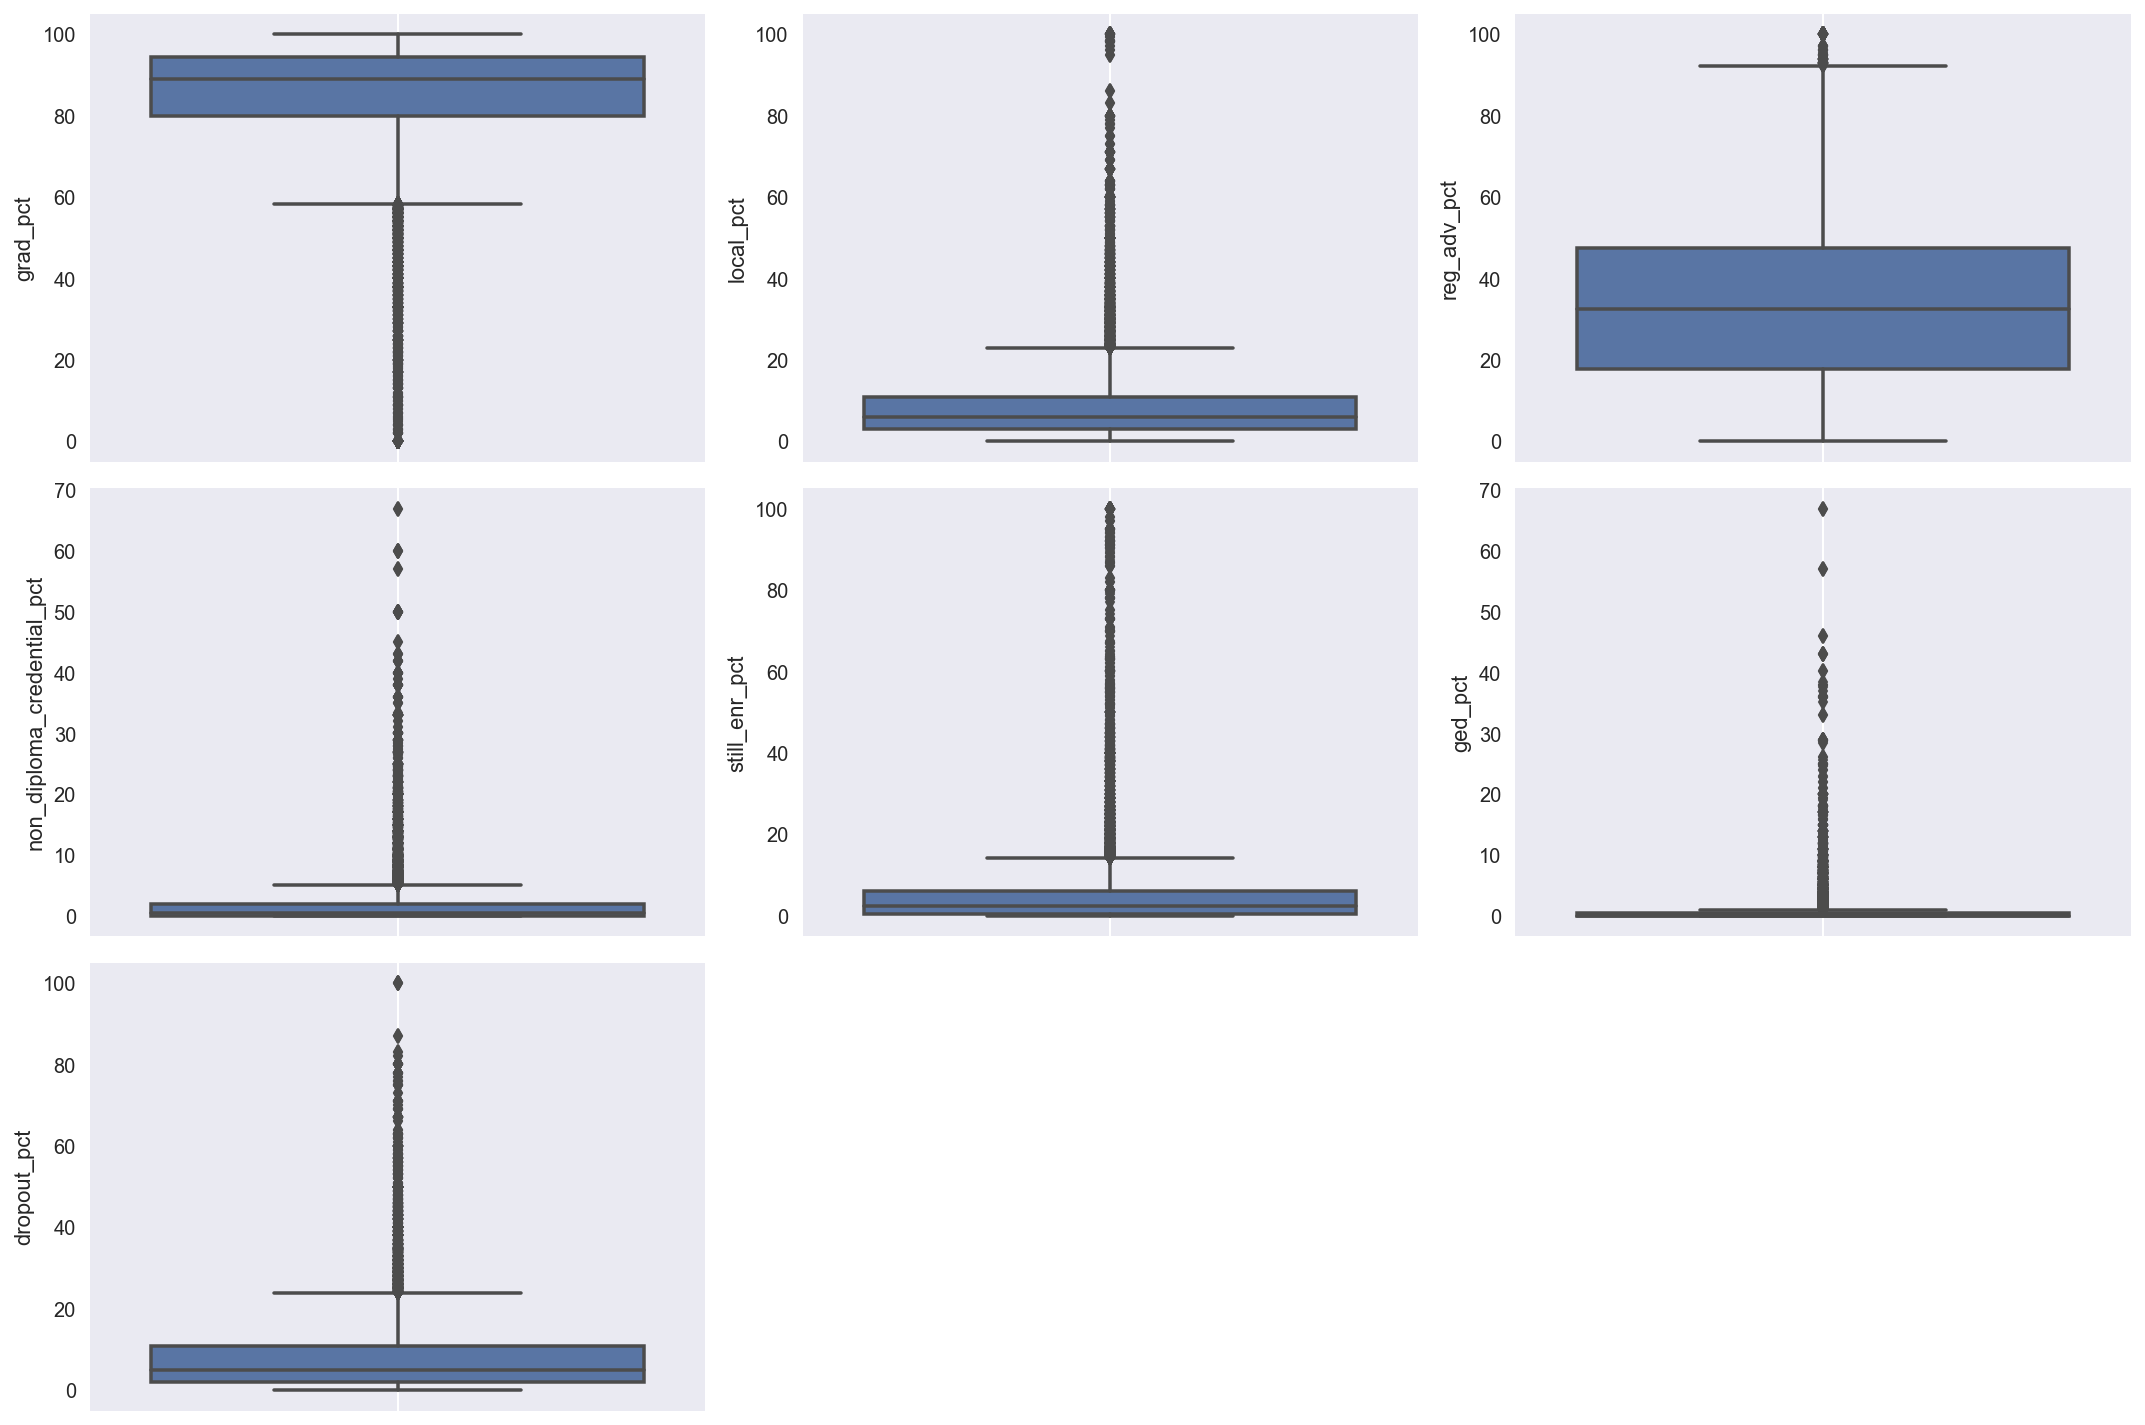

In [106]:
# Draw the box plots for count variables
plt.figure(figsize = (15, 10))
for i, col in enumerate(pct_cols):
    plt.subplot(3,3, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=prepared_student_df,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

<AxesSubplot:>

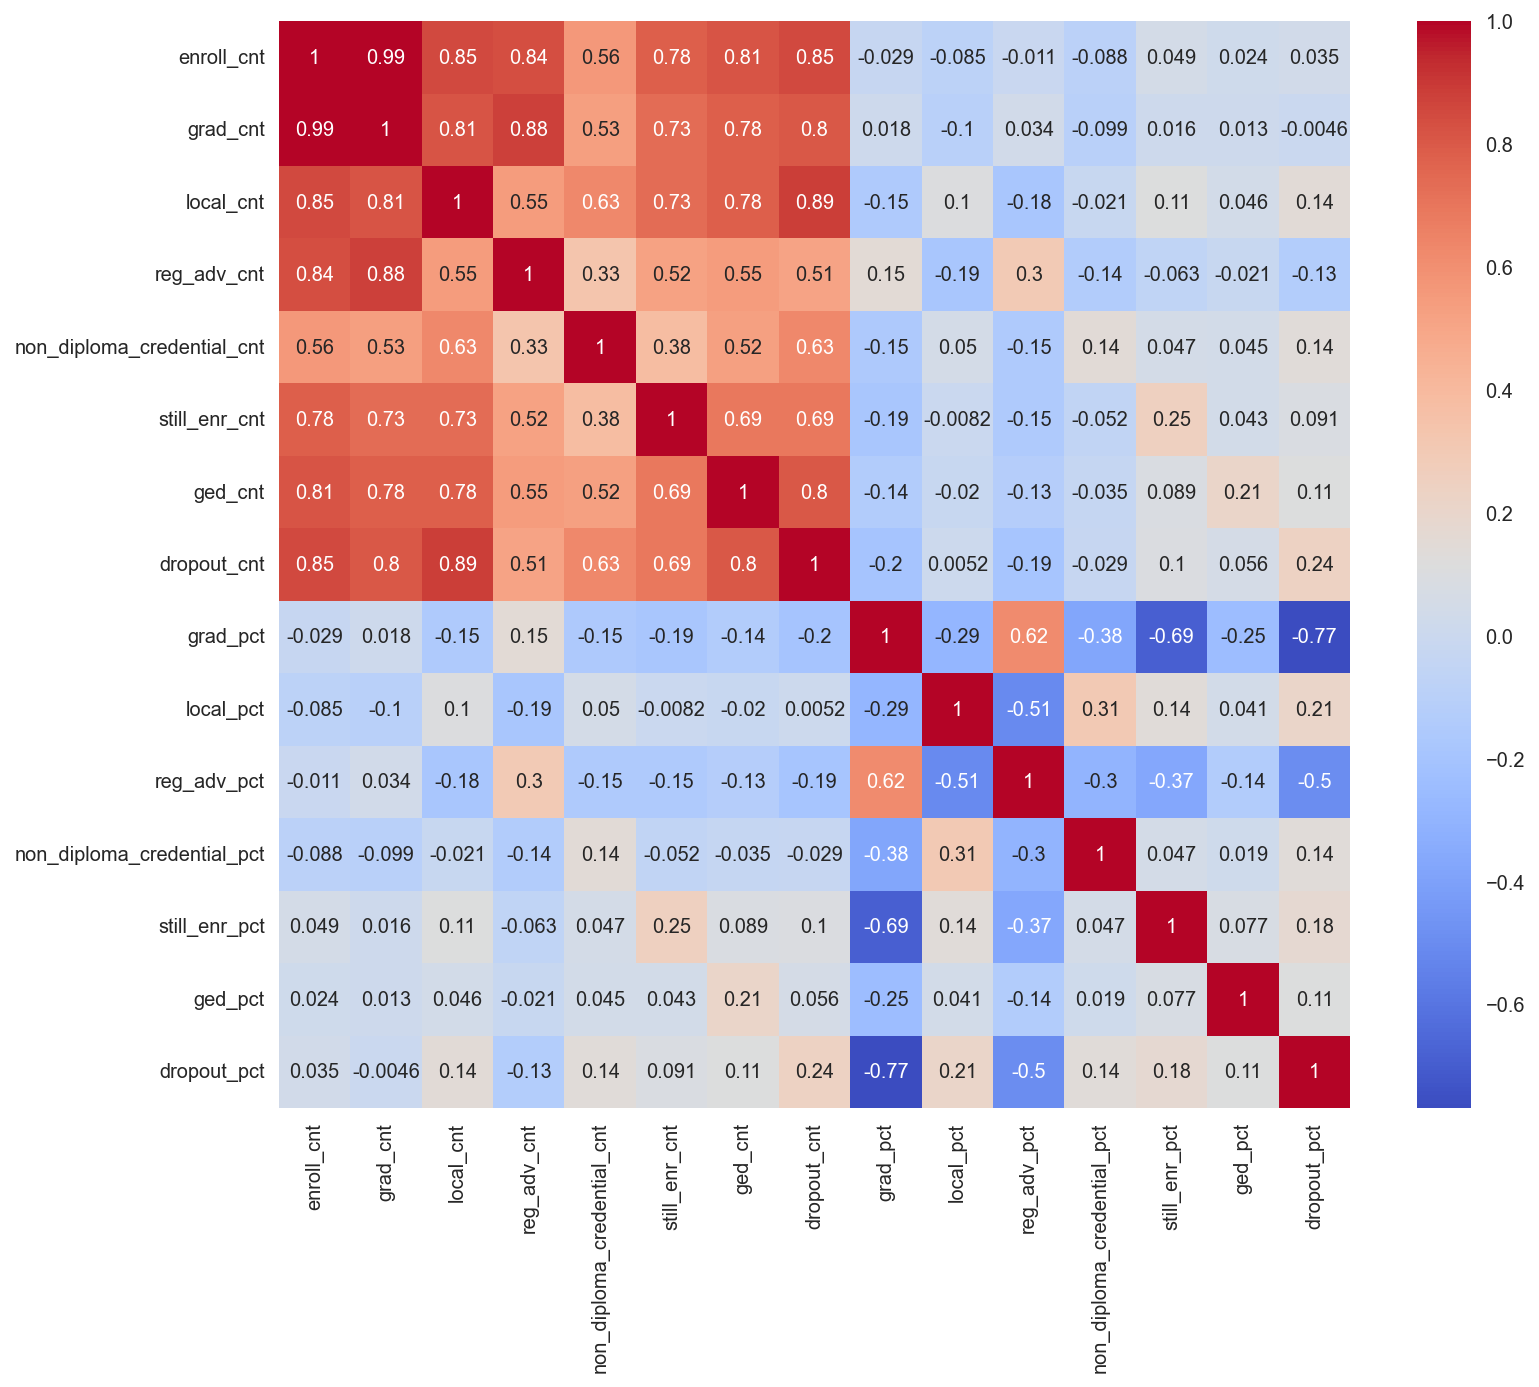

In [107]:
corr_matrix = prepared_student_df[response_col + cnt_cols + pct_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### Summary

The above charts and statistic description shows as followed:

The grad_pct violin plot shows the grad_pct has a clear distinction between the three levels of reg_pct_level. The grad_pct can be used to predict outcomes.

The reg_adv_pct violin plot shows the reg_adv_pct has a clear distinction between the three levels of reg_pct_level. The reg_adv_pct can be used to predict outcomes.

The dropout_pct violin plot shows it has a slight distinction between the three levels of reg_pct_level. The dropout_pct can be used to predict outcomes.

The count variabels show that most students graduated successfully. 

The percentage show that variables, most students graduated successfully. 

The boxplots show all percentage variables have outliers, but the Decision Tree and Random Forest can hand with these outliers.

The correlation values between count variableshave increased. These variables might be multicollinearity. We should not use all of them.

# 6. Feature selecting

https://scikit-learn.org/stable/modules/multiclass.html

- Split data set
- Normalization & standardization

- Select features for Desision Tree

- Select features for Random Forest

### Split data set & Normalization & Standardization

Usually, I use StandardScaler to convert data from different scales to the same scales. Variables with same scales can get a good accurate when training a model.

If variables of data have many outliers, RobustScaler can solve outliers better than StandardScaler.

In [131]:
def get_train_test_X_y(data_df, y_col, size=0.3, std_cols=None):
    y = data_df[y_col]
    X = data_df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    cols = X.columns
    
    if std_cols:
        std = preprocessing.StandardScaler()
        
        # RobustScaler can solve outliers better than StandardScaler
        # std = preprocessing.RobustScaler()
        
        fitted = std.fit_transform(X_train[std_cols])
        
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        
        test_fit = std.transform(X_test[std_cols])
        
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

In [132]:
# response column
response_col = ['reg_pct_level']

new_cat_cols = ['aggregation_name', 'nrc_code', 'county_code', 'nyc_ind', 'membership_desc',  'subgroup_code']

# all count columns
cnt_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_adv_cnt', 'non_diploma_credential_cnt', 
       'still_enr_cnt', 'ged_cnt',  'dropout_cnt']

# all percentage columns
pct_cols = ['grad_pct', 'local_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct']

In [144]:
# convert low, medium, high to 0, 1, 2
prepared_student_df['reg_pct_level'] = prepared_student_df['reg_pct_level'].map({'low':0, 'medium':1, 'high':2})

In [145]:
# check
prepared_student_df['reg_pct_level'].value_counts()

1    63278
0     5131
2     4743
Name: reg_pct_level, dtype: int64

In [146]:
prepared_student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   reg_pct_level               73152 non-null  category
 1   aggregation_name            73152 non-null  category
 2   nrc_code                    73152 non-null  category
 3   county_code                 73152 non-null  category
 4   nyc_ind                     73152 non-null  category
 5   membership_desc             73152 non-null  category
 6   subgroup_code               73152 non-null  category
 7   enroll_cnt                  73152 non-null  int32   
 8   grad_cnt                    73152 non-null  int32   
 9   local_cnt                   73152 non-null  int32   
 10  reg_adv_cnt                 73152 non-null  int32   
 11  non_diploma_credential_cnt  73152 non-null  int32   
 12  still_enr_cnt               73152 non-null  int32   
 13  ged_cnt         

I do not standardize the numerical variables, because Decision Tree and Random Forest can work well with original values.

In [147]:
# Create train and test set
X_train, X_test, y_train, y_test = get_train_test_X_y(prepared_student_df, "reg_pct_level", std_cols=None)

# check X_train
X_train.shape

(51206, 21)

Dummy the X_train

In [148]:
X_train_dummy = pd.get_dummies(X_train)

In [149]:
X_train_dummy.head(3)

enroll_cnt  grad_cnt  local_cnt  reg_adv_cnt  \
40179         153       145          3          112   
9877           83        76          6           32   
68034           5         5          0            0   

       non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt  \
40179                           0              3        1            3   
9877                            0              3        0            4   
68034                           0              0        0            0   

       grad_pct  local_pct  reg_adv_pct  non_diploma_credential_pct  \
40179      82.4        9.8         39.8                         2.6   
9877       92.0        7.0         39.0                         0.0   
68034     100.0        0.0          0.0                         0.0   

       still_enr_pct  ged_pct  dropout_pct  aggregation_name_0.0  \
40179            9.8      1.6          3.4                     0   
9877             4.0      0.0          5.0                     0   
68034            0.0      0.0          0.0                     0   

       aggregation_name_1.0  aggregation_name_2.0  aggregation_name_3.0  \
40179                     0                     0                     0   
9877                      0                     0                     0   
68034                     0                     0                     0   

       aggregation_name_4.0  aggregation_name_5.0  aggregation_name_6.0  \
40179                     0                     0                     0   
9877                      0                     0                     0   
68034                     0                     0                     0   

       aggregation_name_7.0  aggregation_name_8.0  aggregation_name_9.0  \
40179                     0                     0                     0   
9877                      0                     0                     0   
68034                     0                     0                     0   

       aggregation_name_10.0  aggregation_name_11.0  aggregation_name_12.0  \
40179                      0                      0                      0   
9877                       0                      0                      0   
68034                      0                      0                      0   

       aggregation_name_13.0  aggregation_name_14.0  aggregation_name_15.0  \
40179                      0                      0                      0   
9877                       0                      0                      0   
68034                      0                      0                      0   

       aggregation_name_16.0  aggregation_name_17.0  aggregation_name_18.0  \
40179                      0                      0                      0   
9877                       0                      0                      0   
68034                      0                      0                      0   

       aggregation_name_19.0  aggregation_name_20.0  aggregation_name_21.0  \
40179                      0                      0                      0   
9877                       0                      0                      0   
68034                      0                      0                      0   

       aggregation_name_22.0  aggregation_name_23.0  aggregation_name_24.0  \
40179                      0                      0                      0   
9877                       0                      0                      0   
68034                      0                      0                      0   

       aggregation_name_25.0  aggregation_name_26.0  aggregation_name_27.0  \
40179                      0                      0                      0   
9877                       0                      0                      0   
68034                      0                      0                      0   

       aggregation_name_28.0  aggregation_name_29.0  aggregation_name_30.0  \
40179                      0                      0                     

In [150]:
X_train_dummy.shape

(51206, 795)

In [151]:
y_train.value_counts()

1    44385
0     3540
2     3281
Name: reg_pct_level, dtype: int64

The dummied data have 795 features. The response is an imbalance.

### select features for Decision Tree Model 1

Using RidgeClassifier to select the best features for Decision Tree Model 1.

RidgeClassifier can solve the multi-class response.

In [152]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
ridge_mult = linear_model.RidgeClassifier().fit(X_train_dummy, y_train)

model_ridge_mult = SelectFromModel(ridge_mult, prefit=True)
model_ridge_mult.transform(X_train_dummy)

mask = model_ridge_mult.get_support()
new_features_decision_tree_1 = X_train_dummy.columns[mask] #Output Index(['name1', 'name2'],dtype='object')

print(new_features_decision_tree_1)

Index(['aggregation_name_3.0', 'aggregation_name_5.0', 'aggregation_name_8.0',
       'aggregation_name_17.0', 'aggregation_name_18.0',
       'aggregation_name_25.0', 'aggregation_name_27.0',
       'aggregation_name_28.0', 'aggregation_name_29.0',
       'aggregation_name_30.0',
       ...
       'aggregation_name_678.0', 'aggregation_name_679.0', 'nrc_code_1.0',
       'nrc_code_5.0', 'county_code_41.0', 'county_code_43.0',
       'county_code_48.0', 'county_code_59.0', 'subgroup_code_6.0',
       'subgroup_code_13.0'],
      dtype='object', length=246)


### select features for Decision Tree Model 2
Using RandomForestClassifier to select the best features for Decision Tree Model 2.

RandomForestClassifier can solve the multi-class response.

In [154]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, n_jobs=8, max_depth=5, random_state=11)

model_rfr = SelectFromModel(clf).fit(X_train_dummy, y_train)

mask = model_rfr.get_support()
new_features_decision_tree_2 = X_train_dummy.columns[mask]

print(new_features_decision_tree_2)

print(new_features_decision_tree_2.shape)

Index(['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_adv_cnt',
       'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt',
       'grad_pct', 'local_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct', 'aggregation_name_3.0',
       'aggregation_name_17.0', 'aggregation_name_51.0',
       'aggregation_name_71.0', 'aggregation_name_97.0',
       'aggregation_name_122.0', 'aggregation_name_134.0',
       'aggregation_name_163.0', 'aggregation_name_167.0',
       'aggregation_name_205.0', 'aggregation_name_228.0',
       'aggregation_name_248.0', 'aggregation_name_258.0',
       'aggregation_name_295.0', 'aggregation_name_300.0',
       'aggregation_name_313.0', 'aggregation_name_347.0',
       'aggregation_name_384.0', 'aggregation_name_438.0',
       'aggregation_name_439.0', 'aggregation_name_446.0',
       'aggregation_name_463.0', 'aggregation_name_490.0',
       'aggregation_name_517.0', 'aggregation_name_529.0',
    

### select features for RandomForestClassifier model 1

Use ExtraTreesClassifier to select features

In [156]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=11, n_jobs=8)

model_rfr = SelectFromModel(clf).fit(X_train_dummy, y_train)

mask = model_rfr.get_support()

new_features_random_forest_1 = X_train_dummy.columns[mask]

print(new_features_random_forest_1)
print(new_features_random_forest_1.shape)

Index(['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_adv_cnt',
       'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt',
       'grad_pct', 'local_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct', 'aggregation_name_3.0',
       'aggregation_name_17.0', 'aggregation_name_51.0',
       'aggregation_name_52.0', 'aggregation_name_64.0',
       'aggregation_name_71.0', 'aggregation_name_97.0',
       'aggregation_name_122.0', 'aggregation_name_134.0',
       'aggregation_name_163.0', 'aggregation_name_167.0',
       'aggregation_name_178.0', 'aggregation_name_205.0',
       'aggregation_name_228.0', 'aggregation_name_243.0',
       'aggregation_name_248.0', 'aggregation_name_258.0',
       'aggregation_name_295.0', 'aggregation_name_300.0',
       'aggregation_name_313.0', 'aggregation_name_347.0',
       'aggregation_name_381.0', 'aggregation_name_384.0',
       'aggregation_name_438.0', 'aggregation_name_439.0',
      

### select features for RandomForestClassifier model 2

Based the EDA, I will keep all subgroup_name, grad_pct, reg_adv_pct and dropout_pct. I ignore all count variables because they are multicollinearity with each others and the percentage variables can help identify the response that is created from the percentage of regents diploma.

In [192]:
original_cols = ['subgroup_code', 'grad_pct', 'reg_adv_pct', 'dropout_pct']

# using original X_train to get sub set and dummy it.

rf_2_original_X_train = X_train[original_cols]

rf_2_original_X_train_dummy = pd.get_dummies(rf_2_original_X_train)

# get all dummied columns created from 'subgroup_code'
new_features_random_forest_2 = rf_2_original_X_train_dummy.columns

new_features_random_forest_2

Index(['grad_pct', 'reg_adv_pct', 'dropout_pct', 'subgroup_code_0.0',
       'subgroup_code_1.0', 'subgroup_code_2.0', 'subgroup_code_3.0',
       'subgroup_code_4.0', 'subgroup_code_5.0', 'subgroup_code_6.0',
       'subgroup_code_7.0', 'subgroup_code_8.0', 'subgroup_code_9.0',
       'subgroup_code_10.0', 'subgroup_code_11.0', 'subgroup_code_12.0',
       'subgroup_code_13.0', 'subgroup_code_14.0', 'subgroup_code_15.0',
       'subgroup_code_16.0', 'subgroup_code_17.0', 'subgroup_code_18.0',
       'subgroup_code_19.0', 'subgroup_code_20.0', 'subgroup_code_21.0',
       'subgroup_code_22.0', 'subgroup_code_23.0'],
      dtype='object')

# 7. Decision Tree & Random Forest Models
  - 2 Decision Tree
  - 2 Random Forest

In [210]:
from sklearn import metrics

def my_confusion_matrix(actuals, predicts):
    
    actuals_category = pd.Categorical(actuals, categories=[0, 1])
    
    predicts_category = pd.Categorical(predicts, categories=[0, 1])
    
    
    cor = pd.crosstab(actuals_category, predicts_category, dropna=False, 
                     rownames = ['actual'], 
                     colnames = ['predict'])
    
    #print(cor)
    tp = cor.loc[1, 1]
    fp = cor.loc[0, 1]
    tn = cor.loc[0, 0]
    fn = cor.loc[1, 0]
    #print("tp = %d, fp = %d, tn = %d, fn = %d" %(tp,fp,tn,fn))
    
    result_map = {"tp":tp, "fp":fp, "tn":tn, "fn":fn}
    
    # print(result_map)
    return result_map

# specificity = tn / (tn + fp)
def my_specificity(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    result = (cor_map['tn']) / (cor_map['tn'] + cor_map['fp'])
    
    #print("specificity = %.4f" %result)
    
    return result

# https://machinelearningmastery.com/probabilistic-model-selection-measures/
from math import log
from sklearn.metrics import mean_squared_error
 
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

# use cross validation to fit train set
def my_cls_cv(model_name, model_, X_df, y_df, cv = 5, len_num_params = 0):
    
    dic_arr = []
    auc_arr = []
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    f1_arr = []
    specificity_arr = []
    classErrR_arr = [] # classfication error rate = 1 - accuracy
    aic_arr = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    for train_idx, test_idx in kf.split(X_df):

        X_train_, X_test_ = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_, y_test_ = y_df.iloc[train_idx], y_df.iloc[test_idx]

        #Train the model
        model_.fit(X_train_, y_train_) #Training the model
        
        d = metrics.classification_report(y_test_, model_.predict(X_test_), output_dict=True)
        
        dic_arr.append(d)
        
    #print(f"On the KFold = %d test set: Avg. accuracy = %.4f, Avg. precision = %.4f, Avg. auc = %.4f" %(cv, np.mean(accuracy_arr), np.mean(precision_arr), np.mean(roc_arr)))
    
    return dic_arr

def cal_mult_class_evaluations(classification_report_dic_arr, len_num_params):
    
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    f1_arr = []
    
    for d in classification_report_dic_arr:
        accuracy_arr.append(d['accuracy'])
        precision_arr.append(d['weighted avg']['precision'])
        recall_arr.append(d['weighted avg']['recall'])
        f1_arr.append(d['weighted avg']['f1-score'])
    
    re_dic = {"Features":len_num_params, "Avg_weighted_avg_accuracy":np.mean(accuracy_arr), 
              "Avg_weighted_avg_precision": np.mean(precision_arr), 
              "Avg_weighted_avg_recall": np.mean(recall_arr), "Avg_weighted_avg_f1": np.mean(f1_arr)
             }
    
    return re_dic

### Base Line

The null error rate

In [205]:
base_line_count = y_train.value_counts()
base_line_count

1    44385
0     3540
2     3281
Name: reg_pct_level, dtype: int64

In [207]:
# one vs. others
base_line_count[0] / np.sum(base_line_count)

0.8667929539507089

The Base Line (null error rate) shows that if we predict all observations as Medium (Medium is 1), we can get accurate with 0.8668.

### Decision Tree model 1

In [211]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree_model1 = DecisionTreeClassifier(max_depth = 3, random_state=11)

tree_model1_vc_res = my_cls_cv("tree_model1", tree_model1, X_train_dummy[new_features_decision_tree_1], y_train, cv = 5, 
                           len_num_params = len(new_features_decision_tree_1))

result_tree_model1 = cal_mult_class_evaluations(tree_model1_vc_res, len(new_features_decision_tree_1))

In [212]:
result_tree_model1

{'Features': 246,
 'Avg_weighted_avg_accuracy': 0.8704839305180228,
 'Avg_weighted_avg_precision': 0.8566182635918947,
 'Avg_weighted_avg_recall': 0.8704839305180228,
 'Avg_weighted_avg_f1': 0.8313931799426861}

The Avg_weighted_avg_accuracy is higher than Base Line slightly.

### Decision Tree model 2

In [217]:
tree_model2 = DecisionTreeClassifier(max_depth = 3, random_state=11)

tree_model2_vc_res = my_cls_cv("tree_model2", tree_model2, X_train_dummy[new_features_decision_tree_2], y_train, cv = 5, 
                           len_num_params = len(new_features_decision_tree_2))

result_tree_model2 = cal_mult_class_evaluations(tree_model2_vc_res, len(new_features_decision_tree_2))
result_tree_model2

{'Features': 57,
 'Avg_weighted_avg_accuracy': 0.9129203668641015,
 'Avg_weighted_avg_precision': 0.9096996597769191,
 'Avg_weighted_avg_recall': 0.9129203668641015,
 'Avg_weighted_avg_f1': 0.8999657588460556}

The Avg_weighted_avg_accuracy is higher than Base Line near 5%.

### Random Forest model 1

In [215]:
# use random serarch cv to find out the best parameters
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 11)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'precision', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=11)

# Fit 
rs.fit(X_train_dummy[new_features_random_forest_1], y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\dev\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=11),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [216]:
rs.best_params_

{'n_estimators': 153,
 'min_samples_split': 2,
 'max_leaf_nodes': 40,
 'max_features': 0.8999999999999999,
 'max_depth': 5,
 'bootstrap': False}

In [224]:
# use the best model
best_rf_model = RandomForestClassifier(n_estimators = 153,
 min_samples_split = 2,
 max_leaf_nodes = 40,
 max_features = 0.8999999999999999,
 max_depth = 5
 bootstrap = False, random_state = 11, n_jobs = -1)

# use cross validation to compute the evaluations
rf_model1_vc_res = my_cls_cv("random_forest1", best_rf_model, X_train_dummy[new_features_random_forest_1], y_train, cv = 5, 
                           len_num_params = len(new_features_random_forest_1))

result_rf_model1 = cal_mult_class_evaluations(rf_model1_vc_res, len(new_features_random_forest_1))
result_rf_model1

{'Features': 96,
 'Avg_weighted_avg_accuracy': 0.9365504274155516,
 'Avg_weighted_avg_precision': 0.9347604108182072,
 'Avg_weighted_avg_recall': 0.9365504274155516,
 'Avg_weighted_avg_f1': 0.9310906257616807}

The Avg_weighted_avg_accuracy is higher than Base Line near 7%.

### Random Forest 2

In [264]:
# use the best model

best_rf_model2 = RandomForestClassifier(n_estimators = 153,
 min_samples_split = 2,
 max_leaf_nodes = 40,
 max_features = 0.8999999999999999,
 max_depth = 5, criterion = "gini",
 bootstrap = False, random_state = 11, n_jobs = -1)

# use cross validation to compute the evaluations
rf_model2_vc_res = my_cls_cv("random_forest1", best_rf_model2, X_train_dummy[new_features_random_forest_2], y_train, cv = 5, 
                           len_num_params = len(new_features_random_forest_2))

result_rf_model2 = cal_mult_class_evaluations(rf_model2_vc_res, len(new_features_random_forest_2))
result_rf_model2

{'Features': 27,
 'Avg_weighted_avg_accuracy': 0.9282895878532598,
 'Avg_weighted_avg_precision': 0.9241028413759486,
 'Avg_weighted_avg_recall': 0.9282895878532598,
 'Avg_weighted_avg_f1': 0.920883078706171}

The Avg_weighted_avg_accuracy is higher than Base Line near 7%. It is lower than Random Forest Model 1 slightly.

# Select Models

Let's see metrics of all models

In [229]:
result_tree_model1['name'] = 'tree_model1'
result_tree_model2['name'] = 'tree_model2'
result_rf_model1['name'] = 'rf_model1'
result_rf_model2['name'] = 'rf_model2'

In [230]:
model_results = pd.DataFrame([result_tree_model1, result_tree_model2, result_rf_model1, result_rf_model2])
model_results

Features  Avg_weighted_avg_accuracy  Avg_weighted_avg_precision  \
0       246                   0.870484                    0.856618   
1        57                   0.912920                    0.909700   
2        96                   0.936550                    0.934760   
3        27                   0.935418                    0.932076   

   Avg_weighted_avg_recall  Avg_weighted_avg_f1         name  
0                 0.870484             0.831393  tree_model1  
1                 0.912920             0.899966  tree_model2  
2                 0.936550             0.931091    rf_model1  
3                 0.935418             0.930910    rf_model2

### I select Random Forest Model 2 to continue my research because it has the least features and the second high precision in all models. Also, the max depth is 5. It is easily to interpertate.

Next, I will evaluate the model with train set and test set.

In [253]:
# see the features
new_features_random_forest_2

Index(['grad_pct', 'reg_adv_pct', 'dropout_pct', 'subgroup_code_0.0',
       'subgroup_code_1.0', 'subgroup_code_2.0', 'subgroup_code_3.0',
       'subgroup_code_4.0', 'subgroup_code_5.0', 'subgroup_code_6.0',
       'subgroup_code_7.0', 'subgroup_code_8.0', 'subgroup_code_9.0',
       'subgroup_code_10.0', 'subgroup_code_11.0', 'subgroup_code_12.0',
       'subgroup_code_13.0', 'subgroup_code_14.0', 'subgroup_code_15.0',
       'subgroup_code_16.0', 'subgroup_code_17.0', 'subgroup_code_18.0',
       'subgroup_code_19.0', 'subgroup_code_20.0', 'subgroup_code_21.0',
       'subgroup_code_22.0', 'subgroup_code_23.0'],
      dtype='object')

### Use all train data for Random Forest Model 2

In [272]:
# use all train data for Random Forest Model 2
X_train_predictions = best_rf_model2.predict(X_train_dummy[new_features_random_forest_2])

In [273]:
# get the report of train set.
print(metrics.classification_report(y_train, X_train_predictions))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74      3540
           1       0.94      0.99      0.96     44385
           2       0.83      0.46      0.60      3281

    accuracy                           0.93     51206
   macro avg       0.88      0.70      0.77     51206
weighted avg       0.93      0.93      0.92     51206



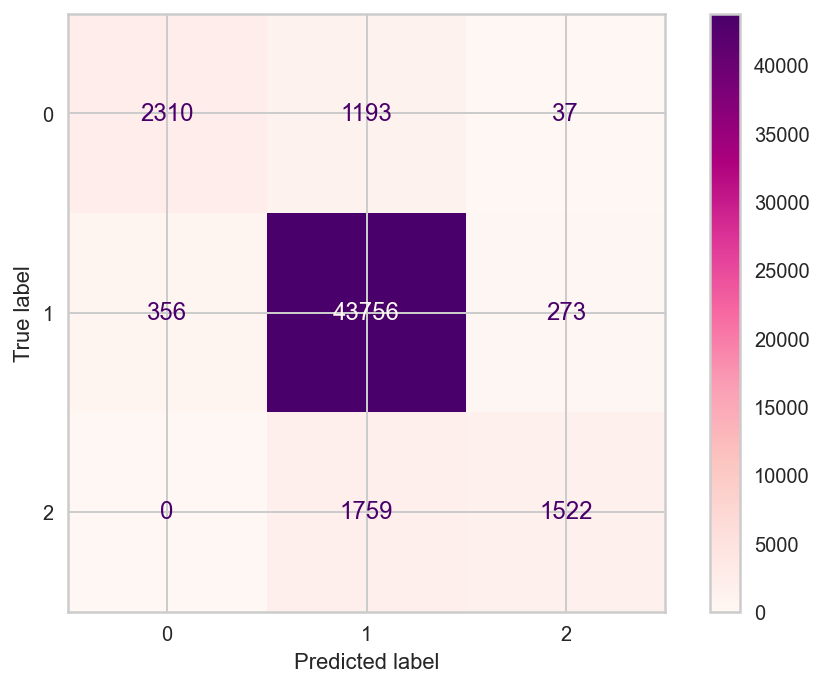

In [274]:
# show the confusion matrix
metrics.plot_confusion_matrix(best_rf_model2, X_train_dummy[new_features_random_forest_2], y_train, cmap=plt.cm.RdPu)

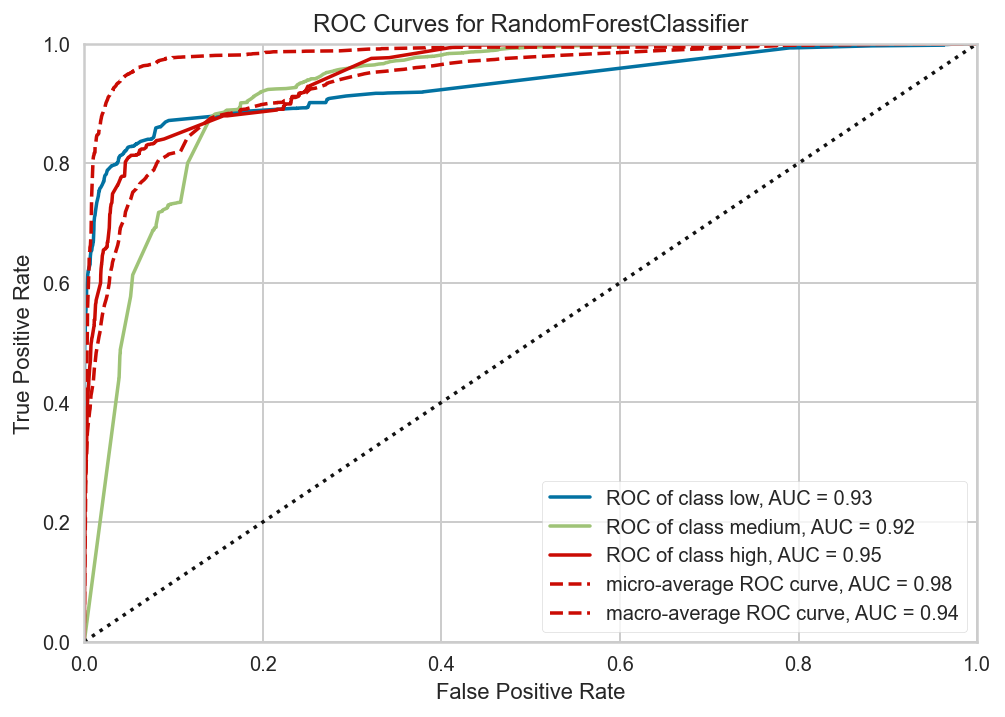

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [275]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(best_rf_model2, classes=["low", "medium", "high"])

visualizer.fit(X_train_dummy[new_features_random_forest_2], y_train)        # Fit the training data to the visualizer
visualizer.score(X_train_dummy[new_features_random_forest_2], y_train)        # Evaluate the model on the train data
visualizer.show()                       # Finalize and render the figure

### Use all test data for Random Forest Model 2

In [276]:
# Let’s make some predictions on the test data set.
X_test_dummy =  pd.get_dummies(X_test)

X_test_predictions = best_rf_model2.predict(X_test_dummy[new_features_random_forest_2])

# get the report of test set.
print(metrics.classification_report(y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1591
           1       0.93      0.99      0.96     18893
           2       0.84      0.47      0.60      1462

    accuracy                           0.93     21946
   macro avg       0.88      0.71      0.77     21946
weighted avg       0.92      0.93      0.92     21946



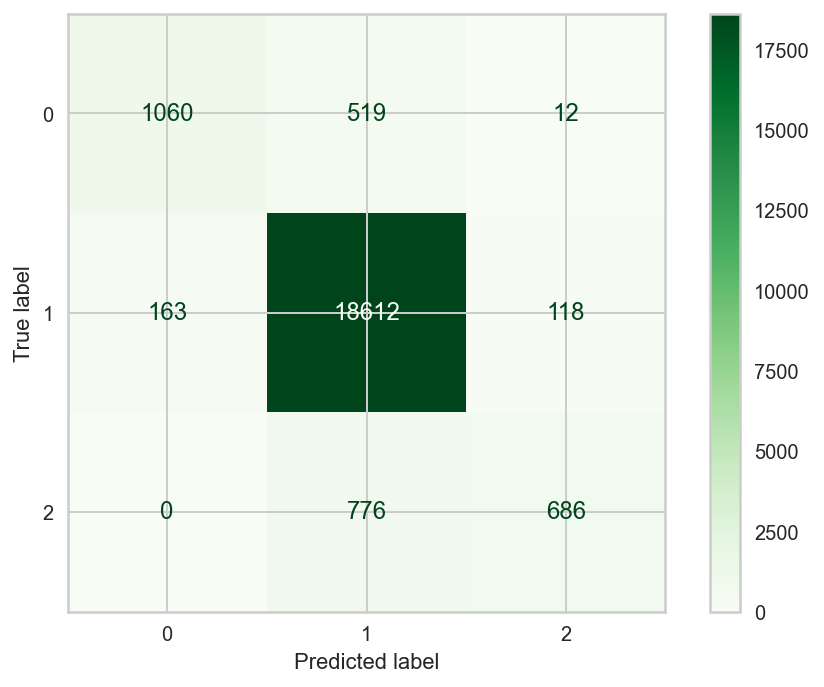

In [277]:
# show the confusion matrix
metrics.plot_confusion_matrix(best_rf_model2, X_test_dummy[new_features_random_forest_2], y_test, cmap=plt.cm.Greens)

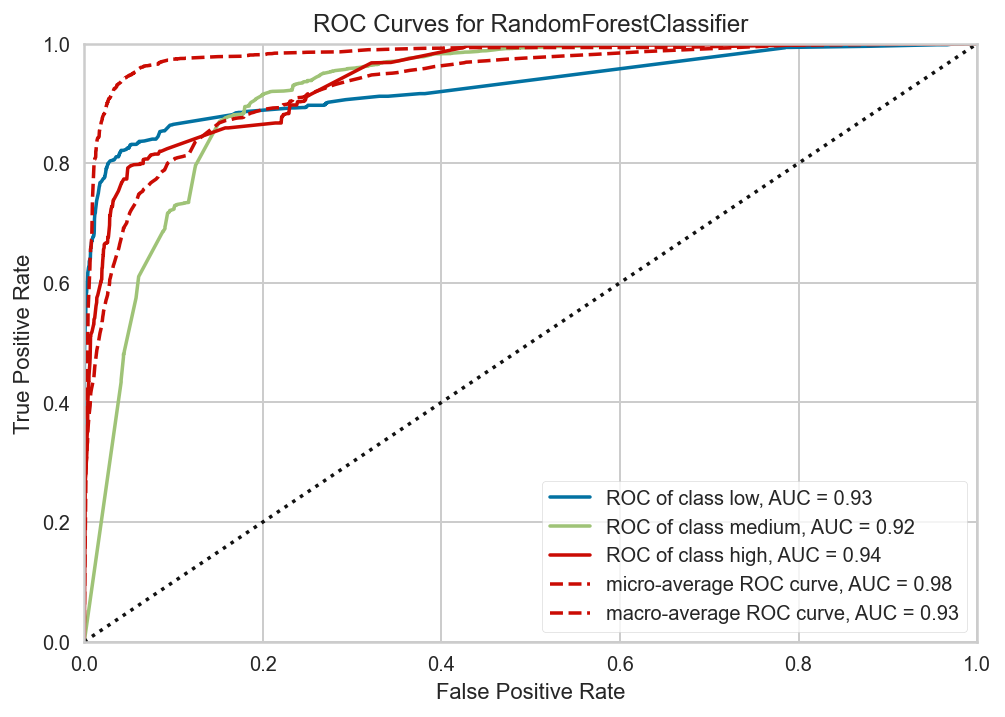

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [278]:
visualizer = ROCAUC(best_rf_model2, classes=["low", "medium", "high"])

visualizer.fit(X_test_dummy[new_features_random_forest_2], y_test)        # Fit the training data to the visualizer
visualizer.score(X_test_dummy[new_features_random_forest_2], y_test)        # Evaluate the model on the train data
visualizer.show()                       # Finalize and render the figure

In [279]:
# show the important features
fi = pd.DataFrame({'feature': new_features_random_forest_2,
                   'importance': best_rf_model2.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

feature  importance
1          reg_adv_pct    0.632217
0             grad_pct    0.333145
2          dropout_pct    0.021456
13  subgroup_code_10.0    0.011624
12   subgroup_code_9.0    0.000836

The important features show that reg_adv_pct and grad_pct account for over 0.965. We could drop all subgroup codes because the Gini importance of them are very low.

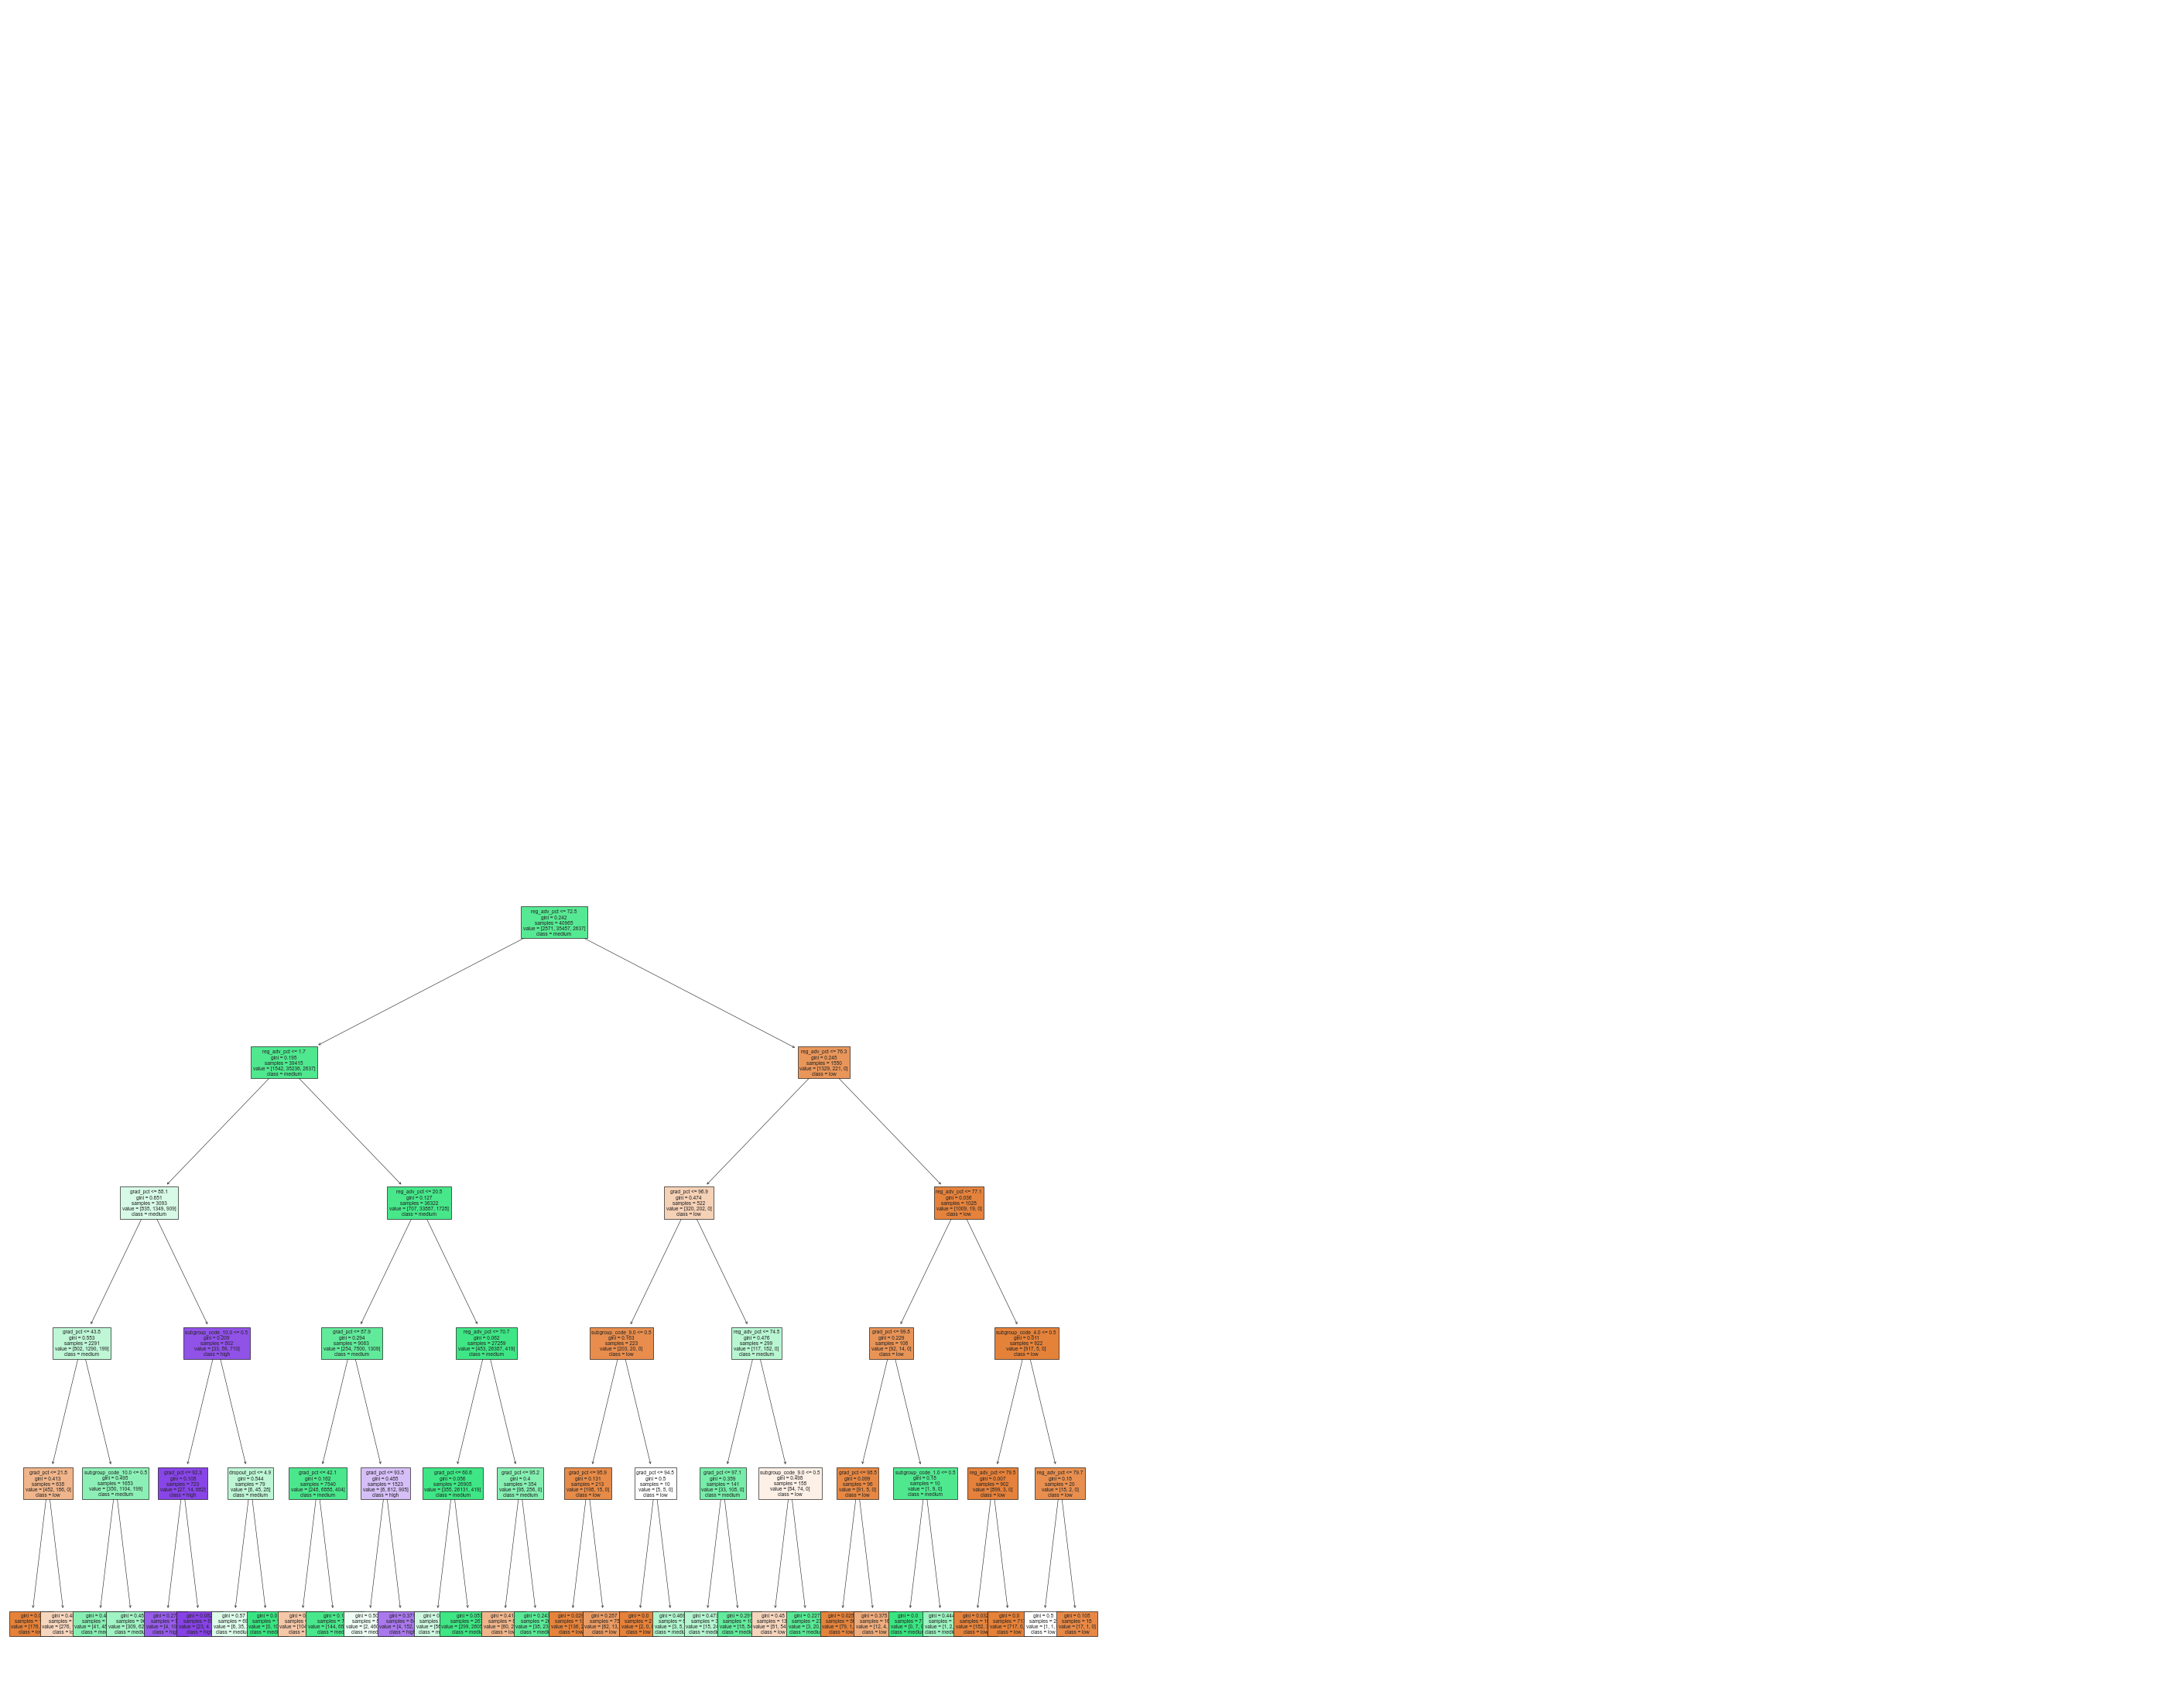

In [260]:
# View one tree of Random Forest model 2
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_rf_model2.estimators_[1], 
                   feature_names=new_features_random_forest_2,  
                   class_names=['low', 'medium', 'high'],
                   filled=True)

### Evaluate the model for preditions of test set

__Base Line__

The Base Line (null error rate) shows that if we predict all observations as Medium (Medium is 1), we can get accurate with 0.8668.

__Train Set__

Using all train data for Random Forest Model 2 got metrics as followed

| accuracy | precision of low  | precision of medium | precision of high |  AUC of low |  AUC of medium |  AUC of high |
| -- | -- | -- | -- | -- | -- | -- |
| 0.93 | 0.87 | 0.94 | 0.83 | 0.93 | 0.92 | 0.95 |

__Test Set__

Using all test data for Random Forest Model 2 got metrics as followed

| accuracy | precision of low  | precision of medium | precision of high |  AUC of low |  AUC of medium |  AUC of high |
| -- | -- | -- | -- | -- | -- | -- |
| 0.93 | 0.87 | 0.93 | 0.84 | 0.93 | 0.92 | 0.94 |

The results of train set and test set show that the model does not overfit in test set.

__Feature Gini importance__

The reg_adv_pct is	0.632217 and the grad_pct is 0.333145. They account for over 0.96 in all features.

Although the precision and recall of high level is 0.87 and 0.84 respectively for test set, the model only used 27 features (27 out of 795) and max depth = 5. It is a easy interpertation model.

# 9. Conclusion

Compare 4 models (2 are Decision Tree models and 2 are Random Forest models)

- Decision Tree can get a slightly high accuracy than the Base line that is the null error rate.

- Random Forest have more better performance than Decision Tree.


Compare the metrics

- The Avg. weighted accuracy, precision, recall and f1 can be used to evaluate the multi-class response.

- In general, the multi-class response is imbalance. We can not only compare the Avg. weighted accuracy. We should contact with the real world requirement selecting differnt metrics.

Compare Decision Tree and Random Forest

- Decision Tree might overfit, if we do not limit the depth or prune branchs.
- Random Forest uses Bagging to correct the tendency of Decision Tree to overfit.
  - By creating many trees trained on random subsamples of the samples and random features of the data, the variance is lowered. 


# 10. Reference

https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

https://www.datascienceblog.net/post/machine-learning/performance-measures-multi-class-problems/

https://scikit-learn.org/stable/modules/multiclass.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

https://medium.com/apprentice-journal/evaluating-multi-class-classifiers-12b2946e755b